# Projet de Machine Learning

# Jeu de données

Les données proviennent du concours KAGGLE et font partie du jeu de données intitulé "Gym Members Exercise Dataset", accessible ici : [Gym Members Exercise Dataset](https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset).

Ce jeu de données offre un aperçu détaillé des habitudes d'exercice, des caractéristiques physiques et des indicateurs de condition physique des membres d’une salle de sport. Il comprend 15 variables observées chez 973 individus fréquentant une salle de sport :

- **Age** : Âge du membre.
- **Gender** : Sexe du membre (variable qualitative avec deux catégories : homme ou femme).
- **Weight_kg** : Poids en kilogrammes.
- **Height_m** : Taille en mètres.
- **Max_BPM** : Fréquence cardiaque maximale (en battements par minute) atteinte pendant les séances d’entraînement.
- **Avg_BPM** : Fréquence cardiaque moyenne durant les séances d’entraînement.
- **Resting_BPM** : Fréquence cardiaque au repos avant l’entraînement.
- **Session_Duration_hours** : Durée de chaque séance d’entraînement en heures.
- **Calories_Burned** : Nombre total de calories brûlées lors de chaque séance.
- **Workout_Type** : Type d’entraînement pratiqué (variable qualitative avec 4 catégories : cardio, musculation, yoga, HIIT).
- **Fat_Percentage** : Pourcentage de masse grasse du membre.
- **Water_Intake_liters** : Quantité d’eau consommée quotidiennement pendant les séances d’entraînement.
- **Workout_Frequency_days_week** : Nombre de séances d’entraînement hebdomadaires (variable qualitative avec 4 catégories : de 2 à 5 séances).
- **Experience_Level** : Niveau d’expérience (variable qualitative avec 3 niveaux : 1 pour débutant, 3 pour expert).
- **BMI** : Indice de masse corporelle (IMC), calculé à partir du poids et de la taille.

L'objectif de ce projet est d'abord de prédire la variable **Calories_Burned** en fonction des autres variables, puis d'estimer la variable **Experience_Level** en utilisant toutes les autres variables disponibles, y compris **Calories_Burned**.


# I. Analyse exploratoire des données
L’objectif dans un premier temps est d’explorer les différentes variables, étape préliminaire indispensable à
l’analyse. Ci-dessous sont précisées quelques questions basiques. Vous pouvez compléter l’analyse selon vos
propres idées.
* Commencez par vérifier la nature des différentes variables et leur encodage. N’oubliez pas de convertir
toutes les variables qualitatives.
* Commencez l’exploration par une analyse descriptive unidimensionnelle des données. Des transformations
des variables quantitatives vous semblent-t-elles pertinentes ?
* Poursuivez avec une analyse descriptive bidimensionnelle. Utilisez des techniques de visualisation: par
exemple les nuages de points (scatterplot), des graphes des correlations, des boîtes à moustaches parallèles,
mosaicplot... Quelles variables semblent liées ?
* Réalisez une analyse en composantes principales des variables explicatives quantitatives et interprétez les
résultats. Visualisez les dépendances éventuelles entre les variables à prédire et les variables explicatives.

Cette analyse a été réalisée en R.

# II. Preprocessing

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt, log
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import label_binarize

In [26]:
path=""
data_init=pd.read_csv(path+"gym_members_exercise_tracking.csv",sep=",",header=0)
# Vérification du contenu
data_init.head()

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                    3.5                              4                 3   
1                    2.1                              4                 2   
2                    2.3                              4                 2   
3                    2.1                              3                 1   
4                    2.8                              3                 1   

     BMI  
0  30.20  
1  32.00  
2  24.71  
3  18.41  
4  14.39

In [28]:
data_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [30]:
data_init.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [32]:
data_init['Gender'] = data_init['Gender'].astype('category')
data_init['Workout_Type'] = data_init['Workout_Type'].astype('category')
data_init['Workout_Frequency (days/week)'] = data_init['Workout_Frequency (days/week)'].astype('category')
data_init['Experience_Level'] = data_init['Experience_Level'].astype('category')

In [34]:
data_init.describe()

Age  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
count  973.000000   973.000000   973.00000  973.000000  973.000000   
mean    38.683453    73.854676     1.72258  179.883864  143.766701   
std     12.180928    21.207500     0.12772   11.525686   14.345101   
min     18.000000    40.000000     1.50000  160.000000  120.000000   
25%     28.000000    58.100000     1.62000  170.000000  131.000000   
50%     40.000000    70.000000     1.71000  180.000000  143.000000   
75%     49.000000    86.000000     1.80000  190.000000  156.000000   
max     59.000000   129.900000     2.00000  199.000000  169.000000   

       Resting_BPM  Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
count   973.000000                973.000000       973.000000      973.000000   
mean     62.223022                  1.256423       905.422405       24.976773   
std       7.327060                  0.343033       272.641516        6.259419   
min      50.000000                  0.500000       303.000000       10.000000   
25%      56.000000                  1.040000       720.000000       21.300000   
50%      62.000000                  1.260000       893.000000       26.200000   
75%      68.000000                  1.460000      1076.000000       29.300000   
max      74.000000                  2.000000      1783.000000       35.000000   

       Water_Intake (liters)         BMI  
count             973.000000  973.000000  
mean                2.626619   24.912127  
std                 0.600172    6.660879  
min                 1.500000   12.320000  
25%                 2.200000   20.110000  
50%                 2.600000   24.160000  
75%                 3.100000   28.560000  
max                 3.700000   49.840000

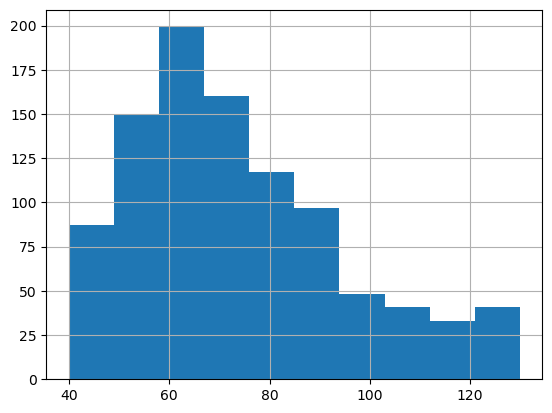

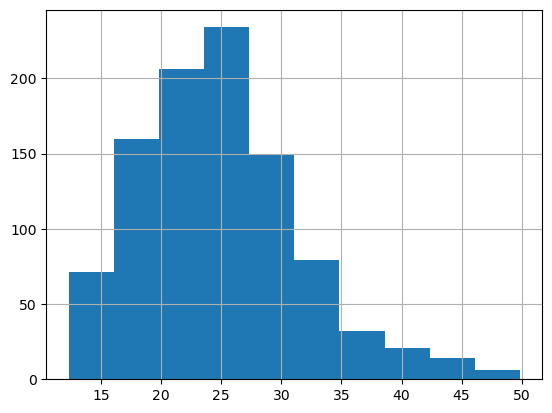

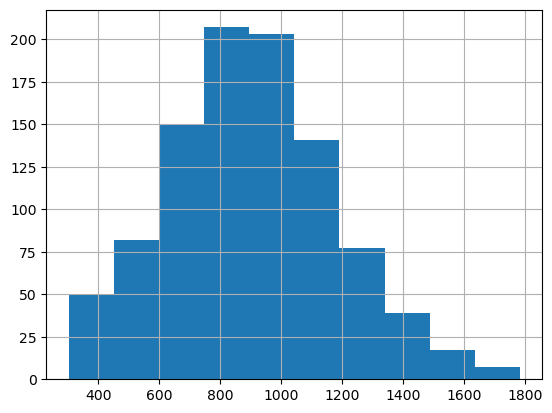

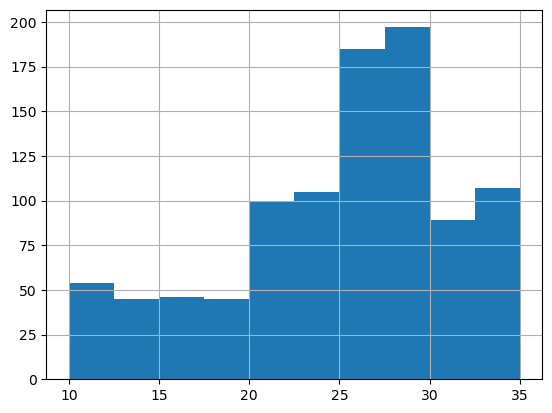

In [36]:
data_init["Weight (kg)"].hist()
plt.show()
data_init["BMI"].hist()
plt.show()
data_init["Calories_Burned"].hist()
plt.show()
data_init["Fat_Percentage"].hist()
plt.show()

Transformation des variables

In [39]:
data_init["Weight (kg)"]=data_init["Weight (kg)"].map(lambda x: log(x))
data_init["BMI"]=data_init["BMI"].map(lambda x: log(x))
data_init["Calories_Burned"]=data_init["Calories_Burned"].map(lambda x: sqrt(x))
data_init["Fat_Percentage"]=data_init["Fat_Percentage"].map(lambda x: x**2)

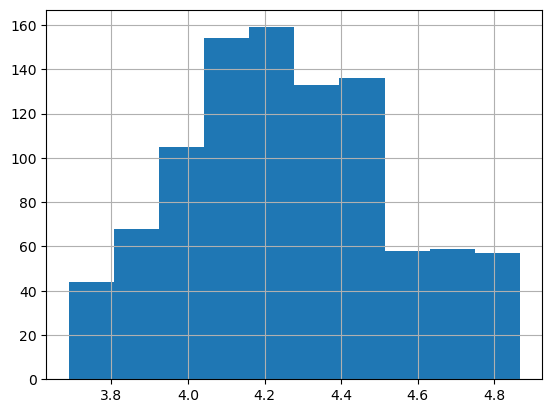

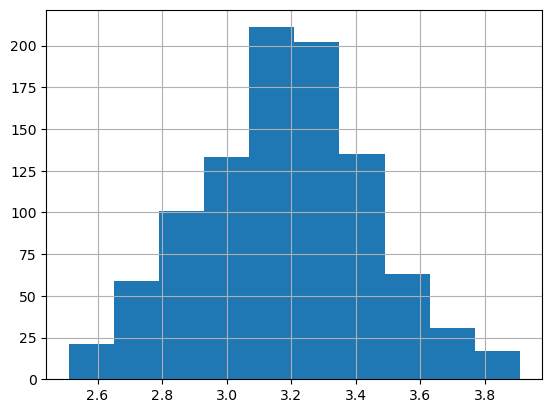

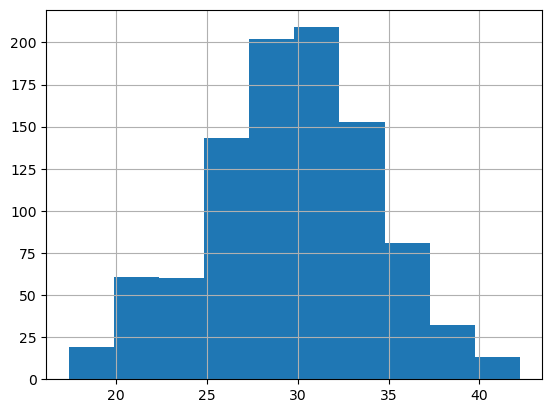

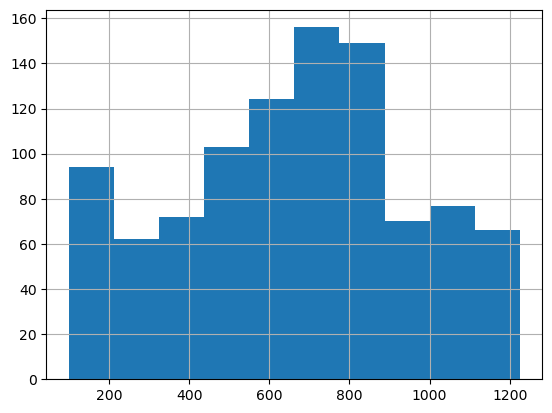

In [41]:
data_init["Weight (kg)"].hist()
plt.show()
data_init["BMI"].hist()
plt.show()
data_init["Calories_Burned"].hist()
plt.show()
data_init["Fat_Percentage"].hist()
plt.show()

# III. Régression  

In [267]:
df = data_init

In [17]:
categoriques = ['Experience_Level', 'Workout_Frequency (days/week)','Gender','Workout_Type'] 
df[categoriques] = df[categoriques].astype("category")
df.head()

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male     4.480740        1.71      180      157           60   
1   46  Female     4.316154        1.53      179      151           66   
2   32  Female     4.220977        1.66      167      122           54   
3   25    Male     3.974058        1.70      190      164           56   
4   38    Male     3.830813        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69        36.235342         Yoga          158.76   
1                      1.30        29.715316         HIIT         1149.21   
2                      1.11        26.019224       Cardio         1115.56   
3                      0.59        23.065125     Strength          829.44   
4                      0.64        23.579652     Strength          852.64   

   Water_Intake (liters) Workout_Frequency (days/week) Experience_Level  \
0                    3.5                             4                3   
1                    2.1                             4                2   
2                    2.3                             4                2   
3                    2.1                             3                1   
4                    2.8                             3                1   

        BMI  
0  3.407842  
1  3.465736  
2  3.207208  
3  2.912894  
4  2.666534

On utilise le one-hot encoding pour les variables catégoriques afin de les utiliser dans l'entraînement des modèles:

In [19]:
data = pd.get_dummies(df, columns=categoriques)  # Etape de one-hot encoding pour les variables catégoriques
boolean_col = data.select_dtypes(include = 'bool').columns
data[boolean_col] = data[boolean_col].astype(int)
data.head()

Age  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56     4.480740        1.71      180      157           60   
1   46     4.316154        1.53      179      151           66   
2   32     4.220977        1.66      167      122           54   
3   25     3.974058        1.70      190      164           56   
4   38     3.830813        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
0                      1.69        36.235342          158.76   
1                      1.30        29.715316         1149.21   
2                      1.11        26.019224         1115.56   
3                      0.59        23.065125          829.44   
4                      0.64        23.579652          852.64   

   Water_Intake (liters)  ...  Workout_Frequency (days/week)_2  \
0                    3.5  ...                                0   
1                    2.1  ...                                0   
2                    2.3  ...                                0   
3                    2.1  ...                                0   
4                    2.8  ...                                0   

   Workout_Frequency (days/week)_3  Workout_Frequency (days/week)_4  \
0                                0                                1   
1                                0                                1   
2                                0                                1   
3                                1                                0   
4                                1                                0   

   Workout_Frequency (days/week)_5  Gender_Female  Gender_Male  \
0                                0              0            1   
1                                0              1            0   
2                                0              1            0   
3                                0              0            1   
4                                0              0            1   

   Workout_Type_Cardio  Workout_Type_HIIT  Workout_Type_Strength  \
0                    0                  0                      0   
1                    0                  1                      0   
2                    1                  0                      0   
3                    0                  0                      1   
4                    0                  0                      1   

   Workout_Type_Yoga  
0                  1  
1                  0  
2                  0  
3                  0  
4                  0  

[5 rows x 24 columns]

## A. Séparation des données pour l'apprentissage des modèles :

Afin d'entraîner correctement les différents modèles et de décider de la manière la plus rigoureuse possible quel modèle peut être considéré 
comme le plus performant pour prédire la valeur de la variable 'Calories_Burned', on divise le jeu de données en un jeu d'entraînement et un jeu de test (à l'aide de la fonction 'train_test_split'). On ajoute un 'random_state' pour que le découpage des données soit identique pour chaque modèle.
On commence par standardiser les données d'entraînement d'un côté et de test de l'autre (étape avec StandardScaler()), afin que le modèle n'ait aucune connaissance des caractéristiques des données de test.
Afin de conserver suffisamment de données pour l'évaluation des modèles, on considère un ratio 80/20 pour les données d'entraînement et les données de test.
Le but est d'entraîner chacun des modèles sur le jeu d'entraînement en utilisant une méthode de validation croisée (utilisation des fonctions KFold() et GridSearchCV()). On utilise (dans un premier temps) une validation croisée à 10 modalités.
Enfin, on évalue les modèles sur 3 métriques différentes: le $R^2$, le RMSE (root mean squared error) et le MAE (mean absolute error).

In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as MSE, r2_score, mean_absolute_error as MAE

scaler = StandardScaler() # Pour normaliser les données 

X = data.drop("Calories_Burned", axis=1).values 
y = data["Calories_Burned"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train_scaled = scaler.fit_transform(X_train)  # Normalisation des données d'apprentissage
X_test_scaled = scaler.transform(X_test) # Normalisation des données test
kf = KFold(n_splits = 10, shuffle = True, random_state = 42) # Pour la validation croisée (à 10 modalités ici)

## B. Entraînement de modèles linéaires classiques (régression linéaire simple, Ridge, Lasso) : 

In [203]:
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge

### 1. Régression linéaire simple : 

Dans le cas de la régression linéaire simple, on n'a aucun hyperparamètre à calibrer. On peut donc entraîner simplement le modèle (sans faire intervenir la validation croisée).

In [185]:
Lin = LinearRegression()
Lin.fit(X_train_scaled, y_train)
y_pred_lin = Lin.predict(X_test_scaled)

In [187]:
r2_lin = r2_score(y_pred_lin, y_test)
rmse_lin = np.sqrt(MSE(y_pred_lin, y_test))
mae_lin = MAE(y_pred_lin, y_test)
print(f"Scores de la régression linéaire simple: R2 : {r2_lin:.4f} | RMSE : {rmse_lin:.4f} | MAE : {mae_lin:.4f}")

Scores de la régression linéaire simple: R2 : 0.9864 | RMSE : 0.5670 | MAE : 0.4316


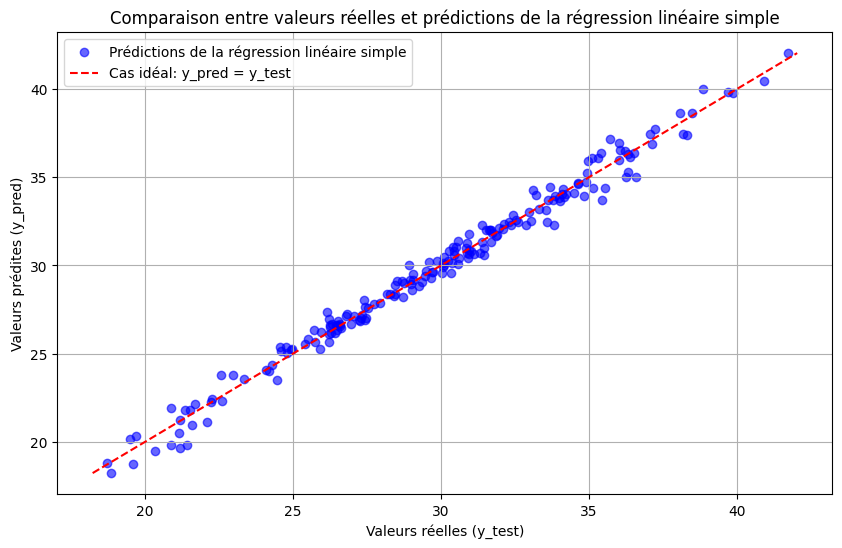

In [189]:
plt.figure(figsize = (10,6))
plt.scatter(y_pred_lin, y_test, color = 'blue', alpha = 0.6, label = 'Prédictions de la régression linéaire simple')  # le alpha règle l'opacité
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label = 'Cas idéal: y_pred = y_test')  
plt.xlabel('Valeurs réelles (y_test)')
plt.ylabel('Valeurs prédites (y_pred)')
plt.title('Comparaison entre valeurs réelles et prédictions de la régression linéaire simple')
plt.legend()
plt.grid(True)
plt.show()

On observe que les valeurs prédites par le modèle collent assez fidèlement aux valeurs réelles (représentées par la droite rouge sur la 
figure précédente). Néanmoins, les valeurs extrêmes de la droite semblent moins bien prédites. On peut supposer que ceci provient du fait que le nombre d'observations associé à ces valeurs extrêmes est bien plus faible que pour les valeurs moyennes, ce qui nuit à l'entraînement du modèle.
On peut facilement le vérifier :

In [191]:
data_cb = data["Calories_Burned"]
print(data_cb[data_cb > sqrt(1000)].count() / len(data_cb))
print(data_cb[data_cb > sqrt(1200)].count() / len(data_cb))
print(data_cb[data_cb < sqrt(600)].count() / len(data_cb))

0.34224049331963
0.13566289825282632
0.13566289825282632


On observe qu'il y a le même nombre d'observations qui prennent des valeurs inférieures à 600 et supérieures à 1200 (valeurs extrêmes) pour la variable 'Calories_Burned'. Ces deux 
catégories représentent chacune à peu près 13,6% des données, ce qui pourrait effectivement être insuffisant pour entraîner correctement la régression linéaire sur ces plages de valeurs, et donc expliquer en partie les faiblesses des prédictions de ce modèle dans ces zones.
A titre de comparaison avec les autres modèles, on peut calculer les erreurs du modèle seulement sur les valeurs extrêmes:

In [193]:
mask_1 = y_test > sqrt(1200)
mask_2 = y_test < sqrt(600)
y_test_1 = y_test[mask_1]
y_pred_lin_1 = y_pred_lin[mask_1] # On récupère les prédictions correspondantes 
y_test_2 = y_test[mask_2]
y_pred_lin_2 = y_pred_lin[mask_2]
r2_lin_1 = r2_score(y_pred_lin_1, y_test_1)
r2_lin_2 = r2_score(y_pred_lin_2, y_test_2)

print(f"R2 pour les variables à valeurs > 1200 : {r2_lin_1:.4f}")
print(f"R2 pour les variables à valeurs < 600 : {r2_lin_2:.4f}")

R2 pour les variables à valeurs > 1200 : 0.8390
R2 pour les variables à valeurs < 600 : 0.7727


On observe effectivement que les valeurs de $R^2$ sont moins bonnes que pour le jeu de données global. Il faut donc surveiller particulièrement
l'efficacité des différents modèles sur ce point.

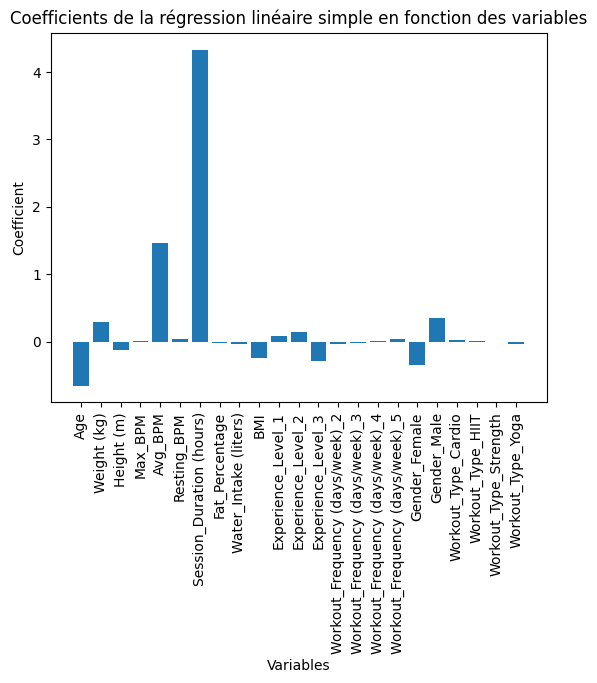

In [195]:
columns = data.drop("Calories_Burned", axis=1).columns
coefficients_lin = Lin.coef_

plt.bar(columns, coefficients_lin)
plt.xlabel('Variables')
plt.ylabel('Coefficient')
plt.title('Coefficients de la régression linéaire simple en fonction des variables')
plt.xticks(rotation=90)
plt.show()

D'après le diagramme en barres ci-dessus, les principales variables explicatives de la variable 'Calories_Burned' sont les variables 'Session_Duration (hours)' (en tout premier lieu) et 'Avg_BPM'. Dans une plus faible mesure, on retrouve aussi les variables 'Age', 'Weight (kg)', 'BPI' ainsi que le sexe du pratiquant ('Gender_Male ou 'Gender_Female'). Les autres variables interviennent très peu.
Ceci est cohérent avec l'analyse exploratoire des données (menée en R) et les résultats de la PCA, qui montre la forte corrélation entre 'Calories_Burned' et 'Session_Duration (hours)' et avec 'Avg_BPM'.
Les variables 'BMI' et 'Weight (kg)' sont également modéremment corrélées à la variable d'intérêt, ce qui se retrouve aussi au niveau des coefficients (dans une moindre mesure que pour les variables déjà citées).
En revanche, la variable 'Fat_Percentage', qui est négativement corrélée à 'Calories_Burned', ne se retrouve quasiment pas dans les variables explicatives du modèle.

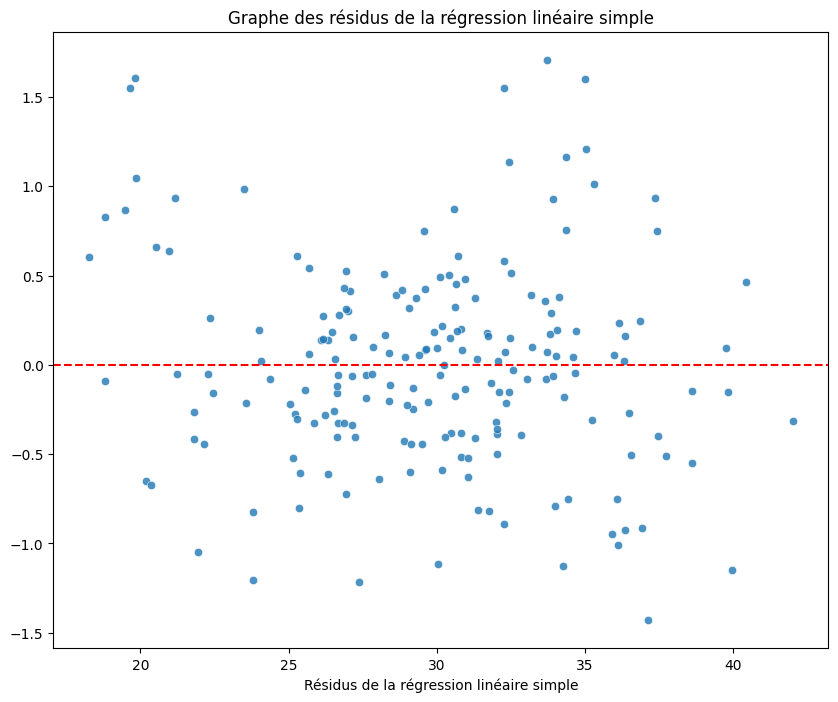

In [140]:
lin_residues = y_pred_lin - y_test
plt.figure(figsize = (10,8))
sns.scatterplot(x = y_test, y = lin_residues, alpha = 0.8)
plt.axhline(0, color = 'red', linestyle = '--')
plt.xlabel('Résidus de la régression linéaire simple')
plt.title('Graphe des résidus de la régression linéaire simple')
plt.show()

On voit là encore, sur le graphe de résidus, que les erreurs ont tendance à être effectivement plus importantes au niveau des valeurs extrêmes de la variable
'Calories_Burned'.

### 2. Régression Ridge :

On entraîne ensuite une régression Ridge, cette fois-ci par validation croisée à cause du coefficient 'alpha' à calibrer. Le paramètre 'alpha'
correspondant permet de moduler un terme de pénalisation qui fait intervenir la norme des coefficients au carré (type norme L2 des coefficients).

In [209]:
Ridge_init = Ridge()
dict_alpha = {"alpha":np.linspace(0.0001,10,4)}
Ridge_cv = GridSearchCV(Ridge_init, dict_alpha, cv=kf)
Ridge_cv.fit(X_train_scaled, y_train)

print("Ridge best alpha parameter: {}".format(Ridge_cv.best_params_))
print("Ridge best performance: {}".format(Ridge_cv.best_score_))

Ridge best alpha parameter: {'alpha': np.float64(3.3334)}
Ridge best performance: 0.9837386458964541


In [211]:
alpha = Ridge_cv.best_params_["alpha"]
Ridge_final = Ridge(alpha = alpha)
Ridge_final.fit(X_train_scaled, y_train)

y_pred_ridge = Ridge_final.predict(X_test_scaled)
r2_ridge = r2_score(y_pred_ridge, y_test)
rmse_ridge = np.sqrt(MSE(y_pred_ridge, y_test))
mae_ridge = MAE(y_pred_ridge, y_test)

print(f"Scores de la régression Ridge: R2 : {r2_ridge:.4f} | RMSE : {rmse_ridge:.4f} | MAE : {mae_ridge:.4f}")

Scores de la régression Ridge: R2 : 0.9860 | RMSE : 0.5711 | MAE : 0.4323


On observe très peu de différences avec les scores obtenus pour la régression linéaire simple, ce qui est cohérent avec le fait
que le coefficient de pénalisation 'alpha' sélectionné par validation croisée est très (très) faible. Autrement dit, c'est comme on appliquait
une seconde fois la régression linéaire simple. On peut aussi vérifier ceci sur les valeurs extrêmes: 

In [213]:
mask_1 = y_test > sqrt(1200)
mask_2 = y_test < sqrt(600)
y_test_1 = y_test[mask_1]
y_pred_ridge_1 = y_pred_ridge[mask_1] # On récupère les prédictions correspondantes 
y_test_2 = y_test[mask_2]
y_pred_ridge_2 = y_pred_ridge[mask_2]
r2_ridge_1 = r2_score(y_pred_ridge_1, y_test_1)
r2_ridge_2 = r2_score(y_pred_ridge_2, y_test_2)

print(f"R2 pour les variables à valeurs > 1200 : {r2_ridge_1:.4f}")
print(f"R2 pour les variables à valeurs < 600 : {r2_ridge_2:.4f}")

R2 pour les variables à valeurs > 1200 : 0.8387
R2 pour les variables à valeurs < 600 : 0.7556


Ceci confirme la première impression. On n'observe pas non plus d'amélioration par rapport aux valeurs problématiques pour la régression 
linéaire simple (voire même une diminution très légère d'efficacité).

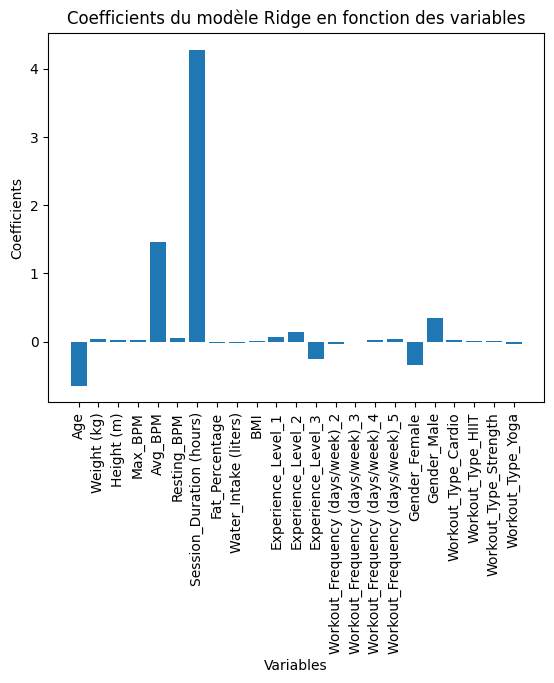

In [151]:
coefficients_Ridge = Ridge_final.coef_

plt.bar(columns, coefficients_Ridge)
plt.xlabel('Variables')
plt.ylabel('Coefficients')
plt.title('Coefficients du modèle Ridge en fonction des variables')
plt.xticks(rotation=90)
plt.show()

On retrouve globalement les mêmes variables explicatives dans le même ordre, ce qui est tout à fait cohérent avec le fait que la régression
linéaire simple semble déjà très bien fonctionner. C'est d'autant plus cohérent avec le fait que le coefficient 'alpha' sélectionné par validation
croisée est très faible (autrement dit, on n'applique quasiment aucune pénalisation).

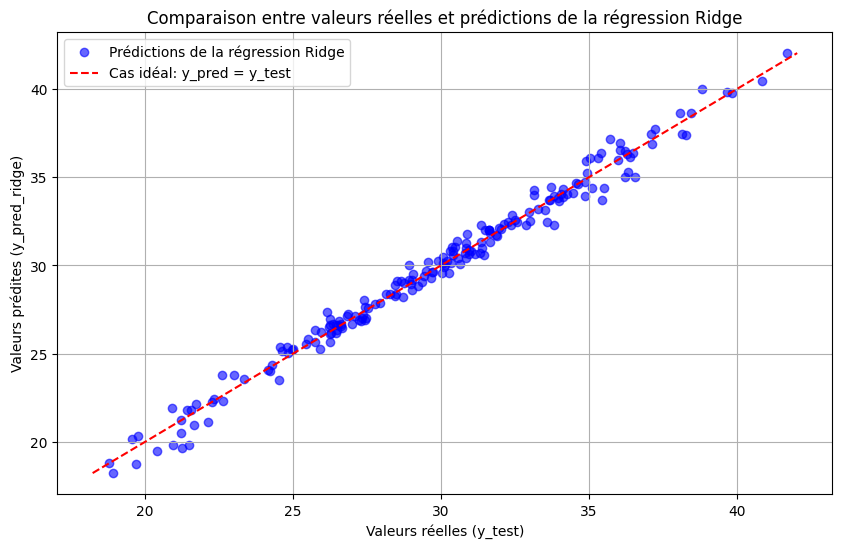

In [154]:
plt.figure(figsize = (10,6))
plt.scatter(y_pred_ridge, y_test, color = 'blue', alpha = 0.6, label = 'Prédictions de la régression Ridge')  # le alpha règle l'opacité
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label = 'Cas idéal: y_pred = y_test')  
plt.xlabel('Valeurs réelles (y_test)')
plt.ylabel('Valeurs prédites (y_pred_ridge)')
plt.title('Comparaison entre valeurs réelles et prédictions de la régression Ridge')
plt.legend()
plt.grid(True)
plt.show()

On observe le même phénomène que pour la régression linéaire simple. Les prédictions collent bien aux valeurs réelles lorsque ces dernières
se situent plutôt au milieu de la droite (valeurs réelles aux alentours de 800 - 1200), mais elles s'écartent une fois celles-ci en dehors de cette plage de valeurs, comme on l'a quantifié auparavant avec le calcul du $R^2$ pour ces données.

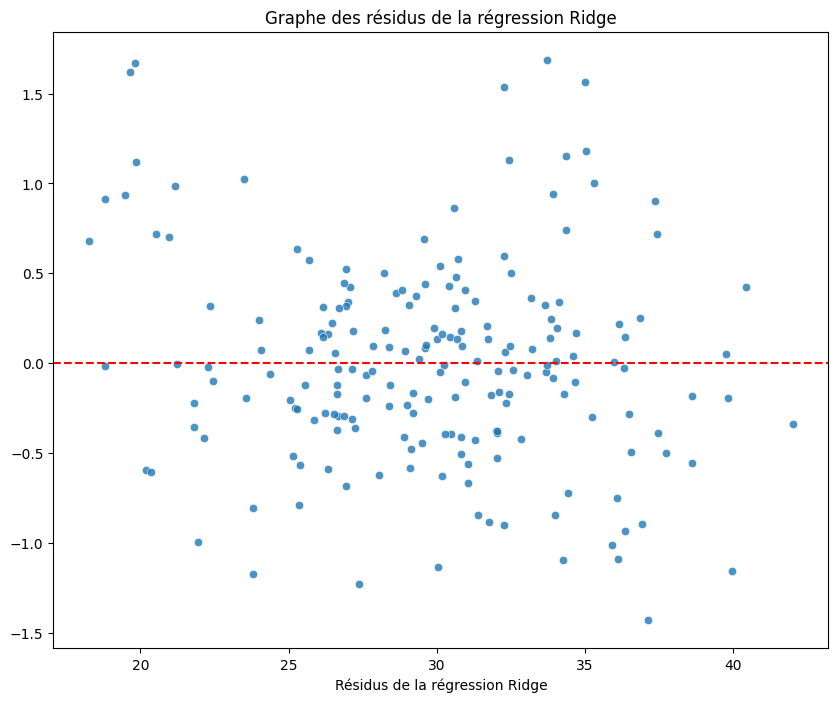

In [159]:
ridge_residues = y_pred_ridge - y_test
plt.figure(figsize = (10,8))
sns.scatterplot(x = y_test, y = ridge_residues, alpha = 0.8)
plt.axhline(0, color = 'red', linestyle = '--')
plt.xlabel('Résidus de la régression Ridge')
plt.title('Graphe des résidus de la régression Ridge')
plt.show()

Au vu des résultats, la comparaison semble indiquer que l'utilisation d'une régression Ridge n'apporte pas grand-chose du point de vue de l'amélioration de la prédiction. On pourrait même se dire que c'est inutilement plus compliqué et conserver seulement la régression linéaire simple.

### 3. Régression Lasso : 

On entraîne ensuite une régression Lasso, en calibrant encore une fois le paramètre 'alpha' par validation croisée. Le paramètre 'alpha' est ici associé à un terme de pénalité du type norme L1 des coefficients. L'avantage est qu'elle permet ainsi de faire de la sélection de variables.

In [205]:
params_lasso = {'alpha': np.linspace(0.001,100,5)}
Lasso_init = Lasso(max_iter = 5000)  # On augmente le nombre d'itérations pour assurer de la convergence
Lasso_cv = GridSearchCV(Lasso_init, params_lasso, cv = kf, scoring = 'r2')
Lasso_cv.fit(X_train_scaled, y_train)
print("Best parameters for the Lasso regression:", Lasso_cv.best_params_)
print("Best score achieved during cross_validation:", Lasso_cv.best_score_)

Best parameters for the Lasso regression: {'alpha': np.float64(0.001)}
Best score achieved during cross_validation: 0.983794807278348


In [215]:
alpha = Lasso_cv.best_params_["alpha"]
Lasso_final = Lasso(alpha = alpha)
Lasso_final.fit(X_train_scaled, y_train)

y_pred_lasso = Lasso_final.predict(X_test_scaled)
r2_lasso = r2_score(y_pred_lasso, y_test)
rmse_lasso = np.sqrt(MSE(y_pred_ridge, y_test))
mae_lasso = MAE(y_pred_ridge, y_test)

print(f"Scores de la régression Lasso: R2 : {r2_lasso:.4f} | RMSE : {rmse_lasso:.4f} | MAE : {mae_lasso:.4f}")

Scores de la régression Lasso: R2 : 0.9864 | RMSE : 0.5711 | MAE : 0.4323


On pourrait formuler exactement la même remarque que pour la régression Ridge concernant les scores obtenus. Cela n'améliore pas la prédiction.

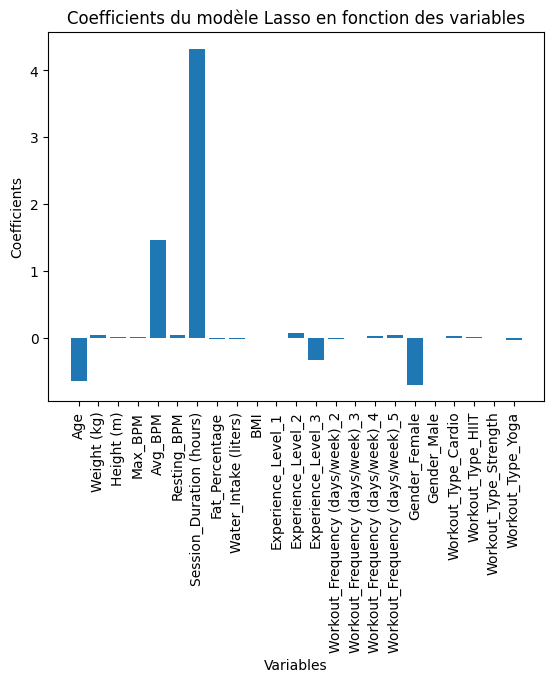

In [177]:
coefficients_lasso = Lasso_final.coef_

plt.bar(columns, coefficients_lasso)
plt.xlabel('Variables')
plt.ylabel('Coefficients')
plt.title('Coefficients du modèle Lasso en fonction des variables')
plt.xticks(rotation=90)
plt.show()

In [2]:
plt.figure(figsize = (10,6))
plt.scatter(y_pred_lasso, y_test, color = 'blue', alpha = 0.6, label = 'Prédictions de la régression Lasso')  # le alpha règle l'opacité
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label = 'Cas idéal: y_pred = y_test')  
plt.xlabel('Valeurs réelles (y_test)')
plt.ylabel('Valeurs prédites (y_pred_lasso)')
plt.title('Comparaison entre valeurs réelles et prédictions de la régression Lasso')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'plt' is not defined

Idem que pour les deux premières régressions. C'est lorsque les valeurs réelles sont trop basses ou trop hautes que les erreurs principales 
semblent le plus souvent commises par le modèle.

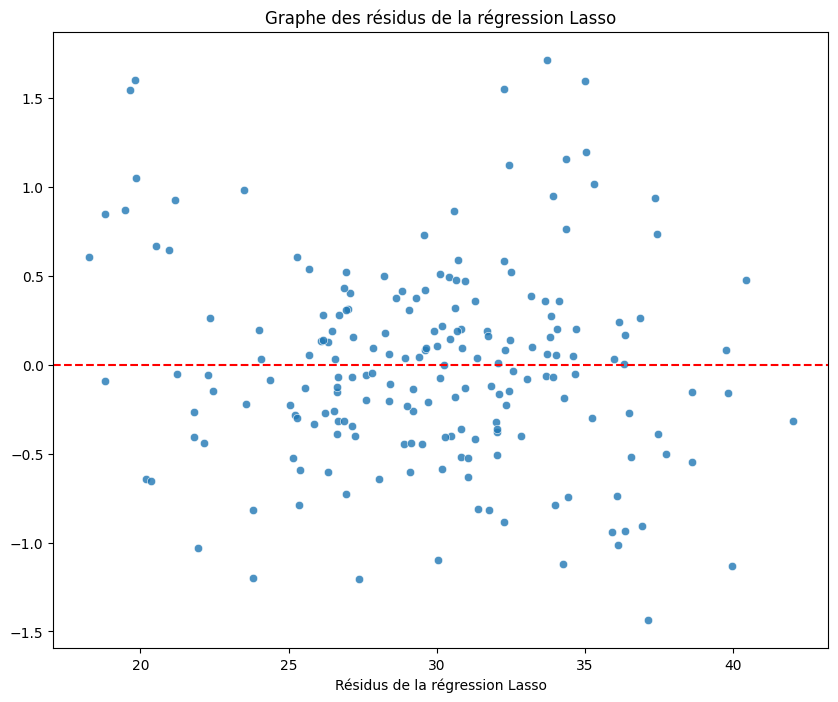

In [184]:
lasso_residues = y_pred_lasso - y_test
plt.figure(figsize = (10,8))
sns.scatterplot(x = y_test, y = lasso_residues, alpha = 0.8)
plt.axhline(0, color = 'red', linestyle = '--')
plt.xlabel('Résidus de la régression Lasso')
plt.title('Graphe des résidus de la régression Lasso')
plt.show()

In [190]:
mask_1 = y_test > sqrt(1200)
mask_2 = y_test < sqrt(600)
y_test_1 = y_test[mask_1]
y_pred_lasso_1 = y_pred_lasso[mask_1] # On récupère les prédictions correspondantes 
y_test_2 = y_test[mask_2]
y_pred_lasso_2 = y_pred_lasso[mask_2]
r2_lasso_1 = r2_score(y_pred_lasso_1, y_test_1)
r2_lasso_2 = r2_score(y_pred_lasso_2, y_test_2)

print(f"R2 pour les variables à valeurs > 1200 : {r2_ridge_1:.4f}")
print(f"R2 pour les variables à valeurs < 600 : {r2_ridge_2:.4f}")

R2 pour les variables à valeurs > 1200 : 0.8387
R2 pour les variables à valeurs < 600 : 0.7556


Finalement, après entraînement de ces trois modèles linéaires classiques, on se rend compte que l'application d'une pénalisation (type norme L1
ou norme L2) n'améliore pas de manière visible le modèle de la régression linéaire simple, qui est déjà très performant sur ce jeu de données.
A la limite, on pourrait peut-être considérer que l'utilisation de la régression Lasso permet plus facilement de mettre à 0 les coefficients
sans importance pour la prédiction, et donc conserver seulement les variables explicatives.

## C. Entraînement d'un modèle SVR (Support Vector Regression) :

On passe ensuite à l'entraînement d'un modèle de SVR (Support Vector Regression). Cette fois-ci, on doit plusieurs hyper-paramètres par
validation croisée, dont le noyau ('kernel'), la valeur du paramètre 'gamma' en cas de noyau gaussien, mais aussi le paramètre 'C', qui représente un coefficient de pénalisation (avec une erreur L2 par défaut dans scikit-learn).

In [23]:
from sklearn.svm import SVR

# Le kernel par défaut pour les SVMs est 'RBF' par défaut en Python
parameters = {'gamma':[0.001,0.01,0.1], 'kernel': ['linear','rbf','poly'], 'C':[1,50,200,500]} # Dictionnaire de paramètres
# Dans un premier temps, on cherche simplement le bon ordre de grandeur pour les différents paramètres
svr = SVR()
svr_tuning = GridSearchCV(svr, parameters)
svr_tuning.fit(X_train_scaled, y_train)
y_pred_svr = svr_tuning.predict(X_test_scaled)
print('Best parameters for the svr:',svr_tuning.best_params_)
print('Best score achieved by the svr:', svr_tuning.score(X_test_scaled, y_test))  # par défaut le score est 'r2'

# On obtient un très bon score (R^2) de 0.98 en utilisant un SVR avec 'RBF' pour kernel, un paramètre 'gamma' de 0.01 et un 
# coefficient de régularisation qui vaut 'C' = 200

Best parameters for the svr: {'C': 500, 'gamma': 0.001, 'kernel': 'rbf'}
Best score achieved by the svr: 0.9923282054795944


In [25]:
# On peut maintenant tenter d'améliorer le modèle en calibrant encore mieux les hyper-paramètres
# tout en conservant un kernel qui vaut 'RBF'
parameters_svr = {'gamma': np.linspace(0.0005,0.1,5), 'C':np.linspace(400,1000,5)} # On teste pour un C plus grand
svr_1 = SVR(kernel = 'rbf')
svr_1_tuned = GridSearchCV(svr_1, parameters_svr)
svr_1_tuned.fit(X_train_scaled, y_train)
y_pred = svr_1_tuned.predict(X_test_scaled)
print("Best parameters for SVR_1: ", svr_1_tuned.best_params_)
print("Best score achieved for SVR_1: ",svr_1_tuned.score(X_test_scaled, y_test))


svr_2 = SVR(kernel = 'rbf', gamma = 0.01, C = 500)  # SVR optimal de la première partie
svr_2.fit(X_train_scaled, y_train)  
y_pred_2 = svr_2.predict(X_test_scaled)
print("Score achieved using the first SVR: ", svr_2.score(X_test_scaled, y_test))

Best parameters for SVR_1:  {'C': np.float64(1000.0), 'gamma': np.float64(0.0005)}
Best score achieved for SVR_1:  0.9918537745725895
Score achieved using the first SVR:  0.9892362863040771


On ne change pas foncièrement la performance en augmentant C drastiquement. On peut tout à fait conserver le premier modèle.

(195, 23)
(195,)


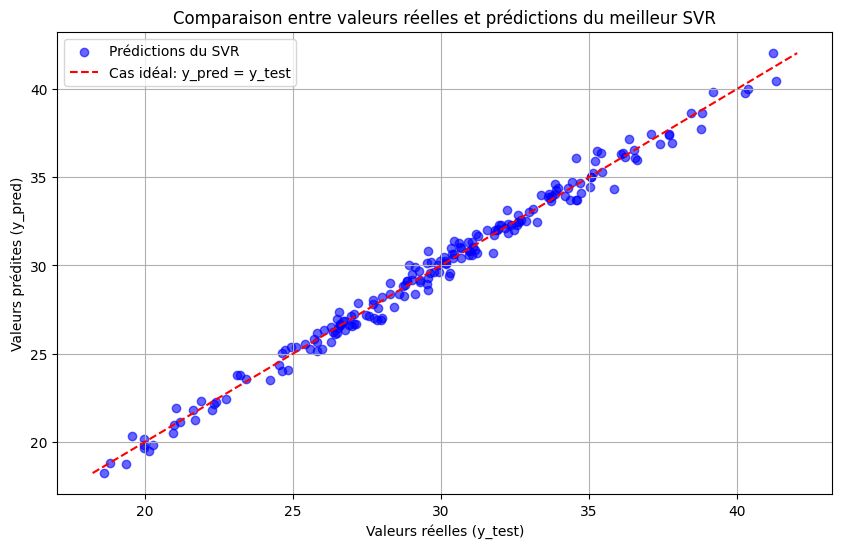

In [27]:
print(X_test.shape)
print(y_test.shape)
plt.figure(figsize = (10,6))
plt.scatter(y_pred_2, y_test, color = 'blue', alpha = 0.6, label = 'Prédictions du SVR')  # le alpha règle l'opacité
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label = 'Cas idéal: y_pred = y_test')  
plt.xlabel('Valeurs réelles (y_test)')
plt.ylabel('Valeurs prédites (y_pred)')
plt.title('Comparaison entre valeurs réelles et prédictions du meilleur SVR')
plt.legend()
plt.grid(True)
plt.show()

On observe cependant que le SVR semble commettre beaucoup moins d'erreurs au niveau des valeurs extrêmes que ses analogues linéaires.
Cela reste à confirmer en calculant l'erreur sur cette partie du jeu de test.

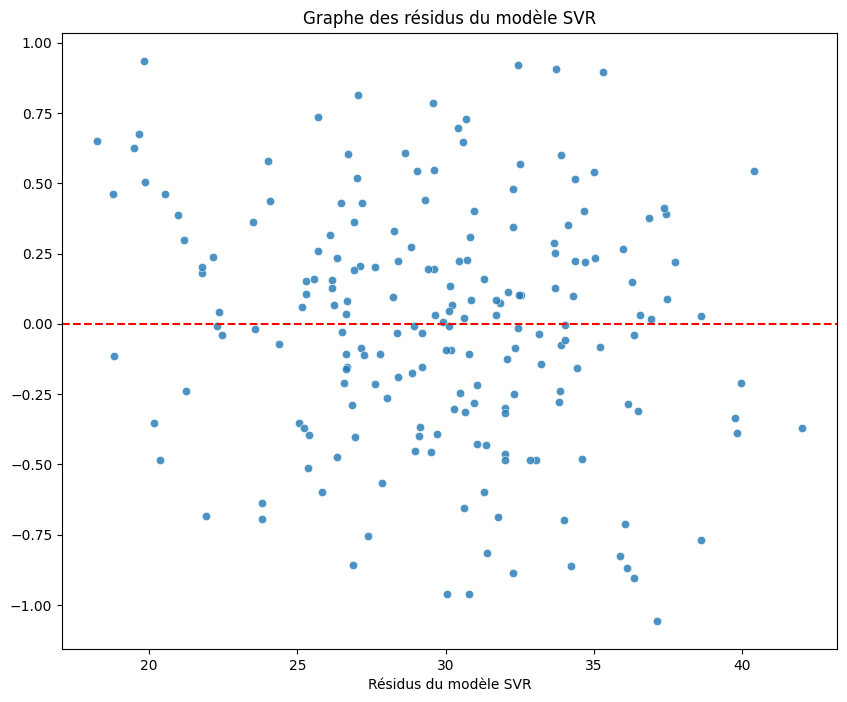

In [29]:
svr_residues = y_pred_svr - y_test
plt.figure(figsize = (10,8))
sns.scatterplot(x = y_test, y = svr_residues, alpha = 0.8)
plt.axhline(0, color = 'red', linestyle = '--')
plt.xlabel('Résidus du modèle SVR')
plt.title('Graphe des résidus du modèle SVR')
plt.show()

On observe aussi que les résidus, même s'ils sont plus fréquemment éloignés de 0 au niveau des valeurs extrêmes, sont globalement très proches 
de 0 (d'une distance de 1 en valeur absolue).

In [31]:
r2_svr = r2_score(y_pred_svr, y_test)
rmse_svr = np.sqrt(MSE(y_pred_svr, y_test))
mae_svr = MAE(y_pred_svr, y_test)

print(f"Scores du meilleur SVR : R2 : {r2_svr:.4f} | RMSE : {rmse_svr:.4f} | MAE : {mae_svr:.4f}")

Scores du meilleur SVR : R2 : 0.9922 | RMSE : 0.4274 | MAE : 0.3415


On voit que le $R^2$ du SVR est globalement meilleur que celui de la régression linéaire, de même pour le RMSE et la MAE. On peut aussi essayer de cibler plus spécifiquement les observations problématiques, identifiées dans le cas des modèles linéaires :

In [38]:
mask_1 = y_test > sqrt(1200)
mask_2 = y_test < sqrt(600)
y_test_1 = y_test[mask_1]
y_pred_svr_1 = y_pred_svr[mask_1] # On récupère les prédictions correspondantes 
y_test_2 = y_test[mask_2]
y_pred_svr_2 = y_pred_svr[mask_2]
r2_svr_1 = r2_score(y_pred_svr_1, y_test_1)
r2_svr_2 = r2_score(y_pred_svr_2, y_test_2)

print(f"R2 pour les variables à valeurs > 1200 : {r2_svr_1:.4f}")
print(f"R2 pour les variables à valeurs < 600 : {r2_svr_2:.4f}")

R2 pour les variables à valeurs > 1200 : 0.9238
R2 pour les variables à valeurs < 600 : 0.9250


Finalement, on observe que les paramètres retenus pour le SVR (kernel = RBF, gamma = 0.01, C = 500) permettent effectivement d'obtenir une prédiction
qui s'approche assez fidèlement de la réalité, avec un $R^2$ de l'ordre de 0.985. Le SVR semble donc être un très bon modèle pour le cas présent. Il permet notamment d'améliorer l'efficacité vis-à-vis du $R^2$ (par rapport à la régression linéaire), surtout au niveau des observations à valeurs extrêmes, ce qui confirme l'analyse de la courbe des valeurs prédites par rapport aux valeurs réelles.
Cependant, on ne peut pas (par construction du SVR) accéder à l'importance des différentes variables dans la prédiction. Le SVR semble donc indiqué comme un très bon modèle.

## D. Entraînement d'un arbre de régression :

On passe maintenant à l'entraînement d'un arbre de régression, en calibrant deux hyperparamètres: le 'max_depth' qui quantifie la profondeur 
maximale de l'arbre et le 'min_samples_leaf' qui quantifie la proportion minimale d'observations qui doit être contenue dans chaque feuille de l'arbre. 

In [43]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [45]:
# On commence par instancier un arbre de régression
# On calibre certains hyper-paramètres, dont 'max_depth' et 'min_samples_leaf'
dt = DecisionTreeRegressor()
parameters_dt = {'max_depth': np.arange(1,11,1), 'min_samples_leaf': np.arange(0.01, 0.9, 0.05)}
dt_tuned = GridSearchCV(dt, parameters_dt, cv = 5)
dt_tuned.fit(X_train_scaled, y_train)
y_pred = dt_tuned.predict(X_test_scaled)
print('Best R2 achieved by the tree:', dt_tuned.best_score_)
print('Best parameters associated:', dt_tuned.best_params_)
best_params = dt_tuned.best_params_

Best R2 achieved by the tree: 0.9235003965201996
Best parameters associated: {'max_depth': np.int64(9), 'min_samples_leaf': np.float64(0.01)}


In [47]:
print(best_params)
print(best_params['max_depth'])

{'max_depth': np.int64(9), 'min_samples_leaf': np.float64(0.01)}
9


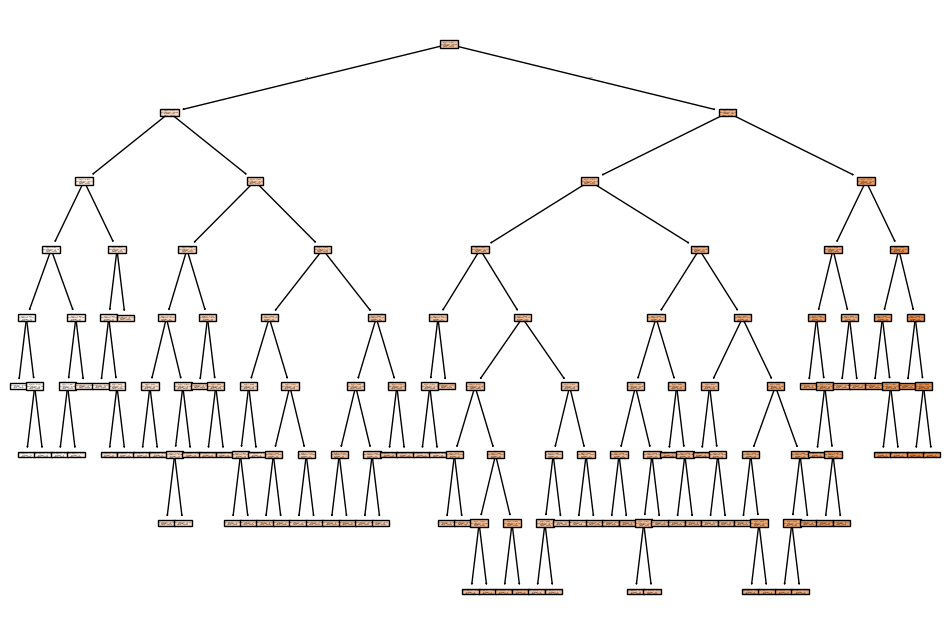

In [49]:
# On peut essayer de visualiser l'arbre résultant à l'aide de la fonction plot_tree
# Pour cela, on doit ré-entraîner un arbre avec exactement les mêmes paramètres que ceux 
# retenus par validation croisée, donnés par dt_tuned.best_params_
dt_viz = DecisionTreeRegressor(max_depth = best_params['max_depth'], min_samples_leaf = best_params['min_samples_leaf'])
dt_viz.fit(X_train_scaled, y_train)
plt.figure(figsize = (12,8))
plot_tree(dt_viz, filled=True)
plt.show()

Malgré le fait que le $R^2$ soit assez bon (plus de 0.92), on constate que l'arbre a beaucoup de feuilles. En effet, en jetant un coup d'oeil aux paramètres retenus par validation croisée pour le meilleur arbre, on voit qu'il a conservé une très grande profondeur (max_depth = 9) ainsi que la plus faible proportion d'échantillon obligatoire dans chaque feuille (min_samples_leaf d'à peine 0.01). Autrement dit, même si le biais est très faible, on s'attend à une grande variance et donc à observer du sur-apprentissage.
On peut essayer d'élaguer l'arbre (étape de pruning).

Dans Python, la technique est un peu particulière et fait appel à un coefficient nommé 'ccp_alpha'. Le pruning consiste alors à générer une liste croissante de coefficients et d'entraîner des arbres pour chacun des coefficients retenus : 

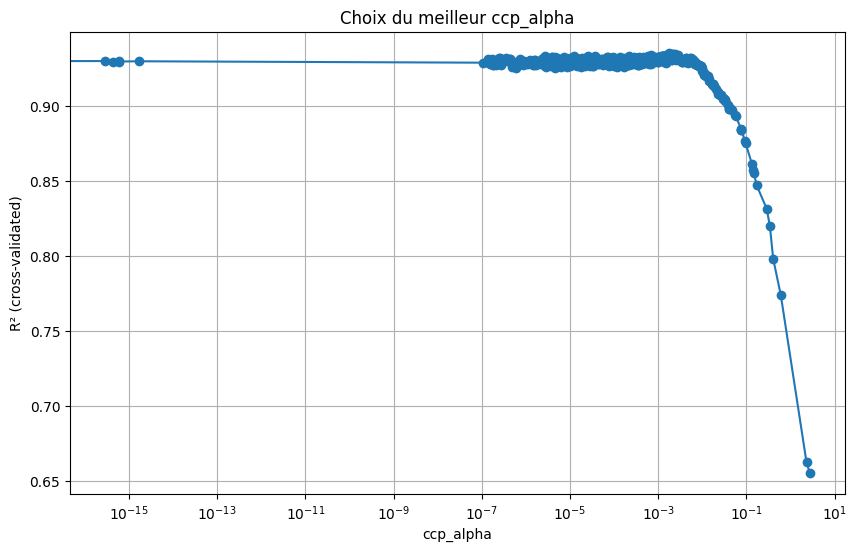

Meilleur alpha sélectionné : 0.0017616145150993949


In [53]:
# Dans scikit-learn, le pruning peut se faire à l'aide d'un paramètre appelé ccp_alpha
path = DecisionTreeRegressor().cost_complexity_pruning_path(X_train_scaled, y_train)
ccp_alphas = path.ccp_alphas[:-1] # On enlève le dernier alpha (ne conserve que le premier noeud)
cv_scores = []
kf_1 = KFold(n_splits=5, shuffle=True, random_state=42)  # On réduit la validation croisée à 5 modalités à cause du temps de calcul
for alpha in ccp_alphas:
    model = DecisionTreeRegressor(ccp_alpha = alpha)
    scores = cross_val_score(model, X_train_scaled, y_train, cv=kf_1, scoring = 'r2')
    cv_scores.append(np.mean(scores))


# On essaie de visualiser le meilleur score en fonction de ccp_alpha:
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, cv_scores, marker='o', linestyle='-')
plt.xlabel("ccp_alpha")
plt.ylabel("R² (cross-validated)")
plt.title("Choix du meilleur ccp_alpha")
plt.xscale('log')
plt.grid(True)
plt.show()

best_idx = np.argmax(cv_scores)
best_alpha = ccp_alphas[best_idx]
print("Meilleur alpha sélectionné :", best_alpha) # Sélection du meilleur alpha après validation croisée
    

dt_pruned = DecisionTreeRegressor(ccp_alpha = best_alpha)
dt_pruned.fit(X_train, y_train)
dt_pruned_score = dt_pruned.score(X_test, y_test)
print('Performance achieved by the pruned tree (R2):', dt_pruned_score)
print('Parameters of the pruned tree:', dt_pruned.get_params())

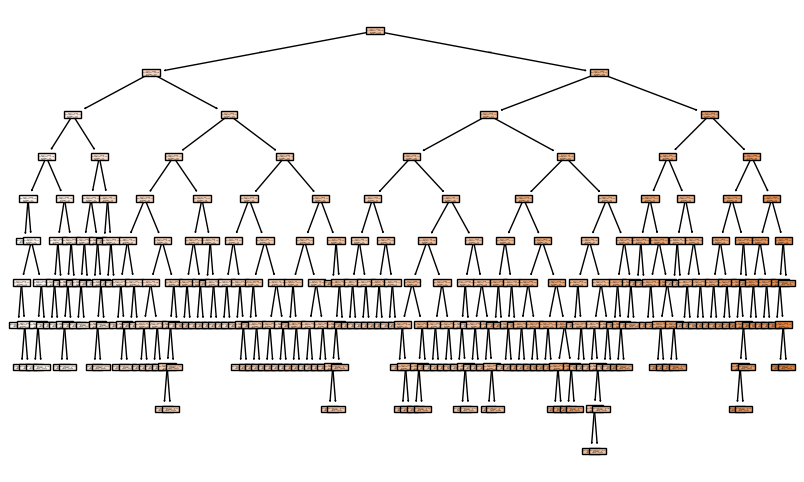

In [57]:
# On visualise enfin l'arbre après élagage:

plt.figure(figsize = (10,6))
plot_tree(dt_pruned, filled = True)
plt.show()

On observe que la valeur du ccp_alpha retenue est trop faible pour élaguer suffisamment l'arbre. On choisit alors la plus grande valeur du ccp_alpha qui permet de conserver une (assez) bonne valeur de R2. On applique en fait la même technique que la sélection de modèle sur courbe ROC qui consiste à se fixer un taux de vrais positifs et à conserver le modèle qui, à ce taux, donne le taux de faux positifs le plus faible. Visuellement, la valeur recherchée est proche de 50. Plus précisément, on peut le trouver en reprenant le graphe précédent avec le code suivant :

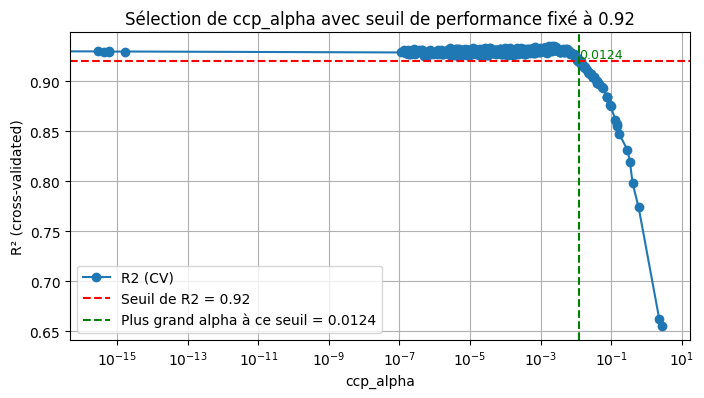

In [62]:
r2_threshold = 0.92  # On fixe une valeur de r2 minimale que l'on souhaite conserver

valid_indices = [i for i,score in enumerate(cv_scores) if score >= r2_threshold]
if valid_indices:
    idx = valid_indices[-1] # On sélectionne le plus grand alpha qui respecte la contrainte sur le r2 pour élaguer l'arbre autant que possible
    alpha_threshold = ccp_alphas[idx]
else:
    alpha_threshold = None

plt.figure(figsize = (8,4))
plt.plot(ccp_alphas, cv_scores, marker='o', label = 'R2 (CV)')
plt.axhline(y=r2_threshold, color = 'r', linestyle = '--', label = f'Seuil de R2 = {r2_threshold}')

if alpha_threshold is not None:
    plt.axvline(x = alpha_threshold, color = 'g', linestyle='--', label= f'Plus grand alpha à ce seuil = {alpha_threshold:.4f}')
    plt.text(alpha_threshold, r2_threshold, f'{alpha_threshold:.4f}', color = 'green', fontsize = 9, verticalalignment = 'bottom')

plt.xscale('log')
plt.xlabel("ccp_alpha")
plt.ylabel("R² (cross-validated)")
plt.title("Sélection de ccp_alpha avec seuil de performance fixé à 0.92")
plt.grid(True)
plt.legend()
plt.show()

    

In [64]:
dt_final = DecisionTreeRegressor(ccp_alpha = alpha_threshold)
dt_final.fit(X_train_scaled, y_train)
dt_final_score = dt_final.score(X_test_scaled, y_test)
print('Performance achieved by the pruned tree (R2):', dt_final_score)
print('Parameters of the pruned tree:', dt_final.get_params())

Performance achieved by the pruned tree (R2): 0.9411219068801377
Parameters of the pruned tree: {'ccp_alpha': np.float64(0.012380136830594142), 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}


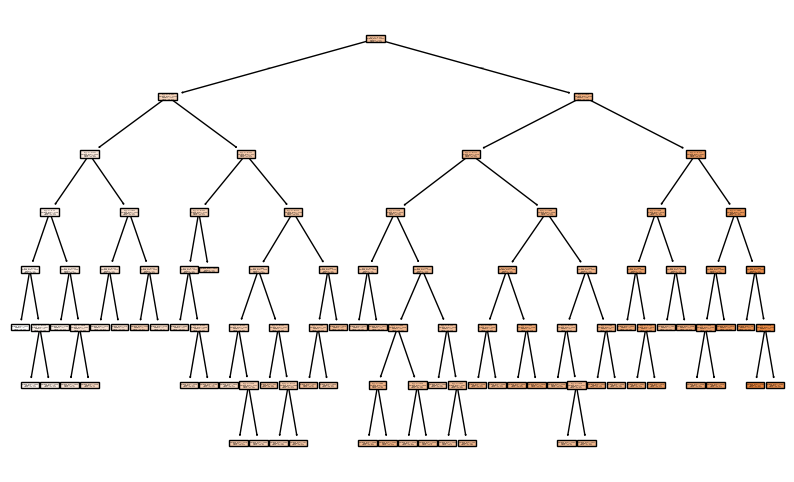

In [66]:
# On visualise l'arbre sélectionné en pratique, après pruning efficace:

plt.figure(figsize = (10,6))
plot_tree(dt_final, filled = True)
plt.show()

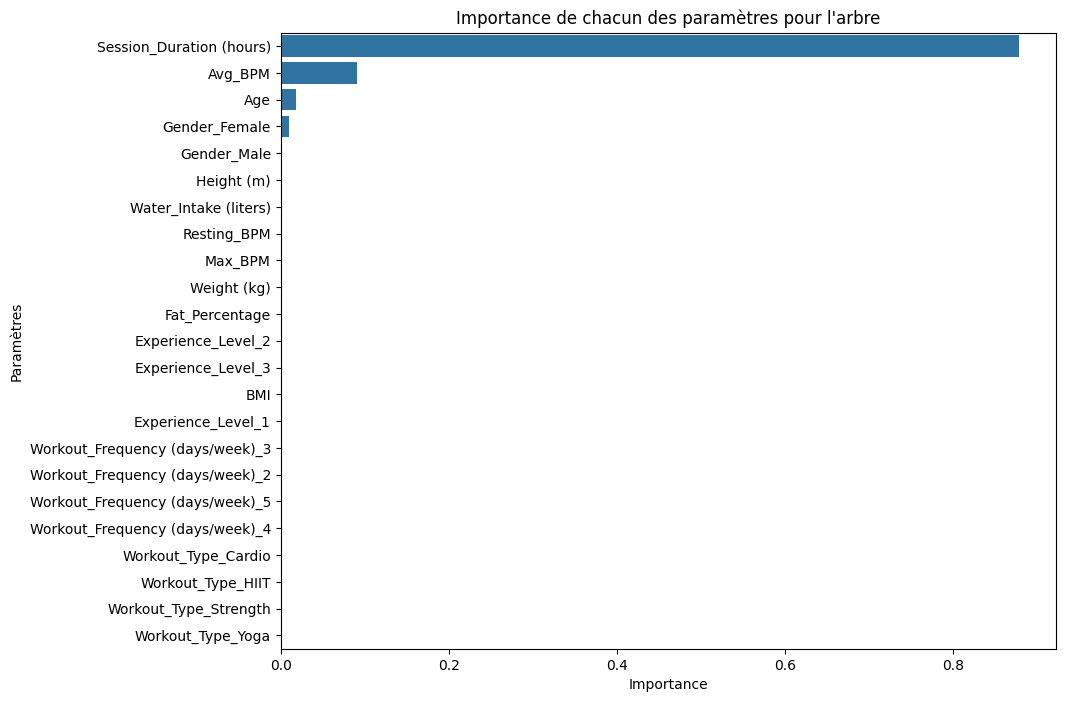

In [68]:
importances = dt_final.feature_importances_
feature_names = data.drop("Calories_Burned", axis=1).columns
features = pd.Series(importances, index = feature_names).sort_values(ascending = False)

plt.figure(figsize = (10,8))
sns.barplot(x = features.values, y = features.index)
plt.title("Importance de chacun des paramètres pour l'arbre")
plt.xlabel("Importance")
plt.ylabel("Paramètres")
plt.show()

Encore une fois, pour l'arbre élagué, les deux variables explicatives les plus importantes sont 'Session_Duration (hours)', bien devant 'Avg_BPM' 
et lui-même devant 'Age'. Il n'y a donc pas de surprises de ce côté-là.

In [71]:
y_pred_tree = dt_final.predict(X_test_scaled)
r2_tree = r2_score(y_pred_tree, y_test)
rmse_tree = np.sqrt(MSE(y_pred_tree, y_test))
mae_tree = MAE(y_pred_tree, y_test)

print(f"Scores du meilleur arbre : R2 : {r2_tree:.4f} | RMSE : {rmse_tree:.4f} | MAE : {mae_tree:.4f}")

Scores du meilleur arbre : R2 : 0.9362 | RMSE : 1.1842 | MAE : 0.9486


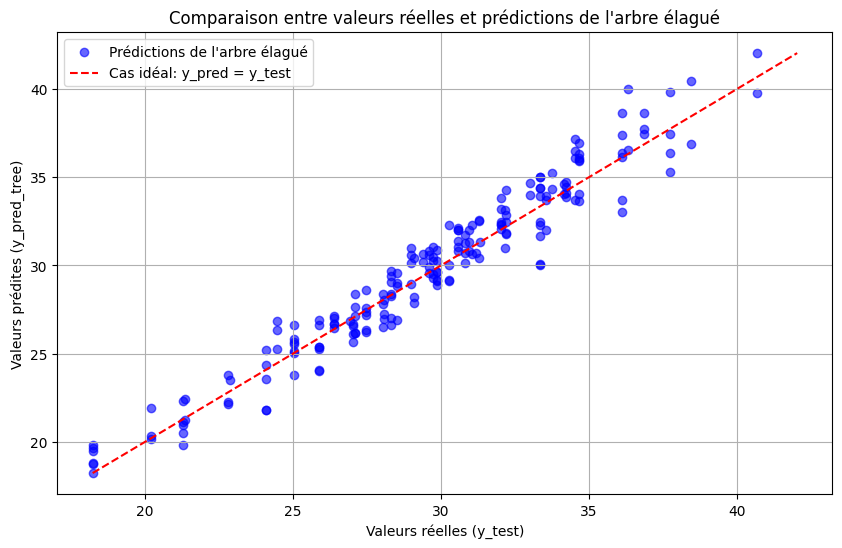

In [73]:
plt.figure(figsize = (10,6))
plt.scatter(y_pred_tree, y_test, color = 'blue', alpha = 0.6, label = "Prédictions de l\'arbre élagué")  # le alpha règle l'opacité
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label = 'Cas idéal: y_pred = y_test')  
plt.xlabel('Valeurs réelles (y_test)')
plt.ylabel('Valeurs prédites (y_pred_tree)')
plt.title('Comparaison entre valeurs réelles et prédictions de l\'arbre élagué')
plt.legend()
plt.grid(True)
plt.show()

On observe cependant que les valeurs prédites sont beaucoup moins précises que dans le cas des autres modèles. 

On peut aussi tester plus spécifiquement sur les valeurs extrêmes: 

In [79]:
mask_1 = y_test > sqrt(1200)
mask_2 = y_test < sqrt(600)
y_test_1 = y_test[mask_1]
y_pred_tree_1 = y_pred_tree[mask_1] # On récupère les prédictions correspondantes 
y_test_2 = y_test[mask_2]
y_pred_tree_2 = y_pred_tree[mask_2]
r2_tree_1 = r2_score(y_pred_tree_1, y_test_1)
r2_tree_2 = r2_score(y_pred_tree_2, y_test_2)

print(f"R2 pour les variables à valeurs > 1200 : {r2_tree_1:.4f}")
print(f"R2 pour les variables à valeurs < 600 : {r2_tree_2:.4f}")

R2 pour les variables à valeurs > 1200 : 0.2832
R2 pour les variables à valeurs < 600 : 0.7651


En conclusion, on obtient bien un arbre (un peu) élagué, qui à l'air performant, c'est-à-dire qui présente un $R^2$ qui vaut au moins 0.92 (seuil fixé), mais qui ne l'est pas vraiment. On s'attend par nature à une mauvaise généralisation à cause de la tendance des arbres au sur-apprentissage et surtout on observe qu'il est moins performant qu'un modèle linéaire plus classique comme le SVR précédent, comme le montre la courbe des valeurs prédites par l'arbre. En particulier, il est très faible sur les valeurs extrêmes. Ce n'est donc pas un modèle adapté dans ce contexte.
On passe donc à l'entraînement d'une forêt aléatoire pour tenter de réduire la variance.

## E. Forêt aléatoire : 

In [87]:
from sklearn.ensemble import RandomForestRegressor

L'entraînement d'une forêt aléatoire est assez long. Il faut à chaque fois entraîner plusieurs arbres, en plus par validation croisée. On pourrait donc aussi opter pour une recherche aléatoire avec RandomizedSearchCV plutôt qu'une recherche exhaustive avec GridSearchCV.
On calibre ici les paramètres:
- 'n_estimators': le nombre d'arbres qui composent la forêt
- 'max_depth': la profondeur maximale de chaque arbre.

In [91]:
forest_params = {'n_estimators':np.arange(100,1000,100), 'max_depth': np.arange(5,8,1)}
forest_init = RandomForestRegressor(random_state = 42)
grid_forest = GridSearchCV(forest_init, forest_params, cv = kf_1, verbose = 1, n_jobs = -1) #On essaie d'accélérer l'entraînement
grid_forest.fit(X_train_scaled, y_train)

print("Best parameters for the random forest:", grid_forest.best_params_)
print("Best score achieved by the random forest (R2):", grid_forest.best_estimator_.score(X_test_scaled, y_test))



Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for the random forest: {'max_depth': np.int64(7), 'n_estimators': np.int64(100)}
Best score achieved by the random forest (R2): 0.974754167446673


On peut essayer de visualiser l'importance (décroissante) de chaque paramètre pour la construction de la forêt aléatoire:

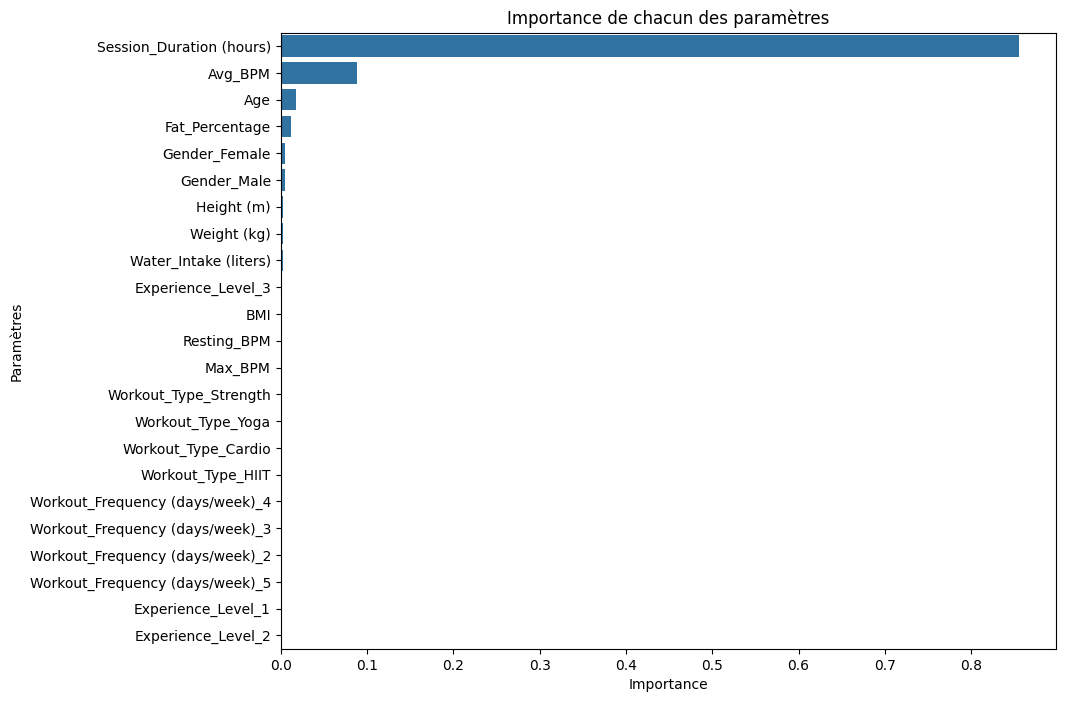

In [94]:
rd_forest = RandomForestRegressor(n_estimators = 900, max_depth = 7)
rd_forest.fit(X_train_scaled, y_train)
importances = rd_forest.feature_importances_
feature_names = data.drop("Calories_Burned", axis=1).columns
features = pd.Series(importances, index = feature_names).sort_values(ascending = False)

plt.figure(figsize = (10,8))
sns.barplot(x = features.values, y = features.index)
plt.title("Importance de chacun des paramètres")
plt.xlabel("Importance")
plt.ylabel("Paramètres")
plt.show()

Encore une fois, la forêt aléatoire confirme la tendance globale concernant l'importance des paramètres pour l'explication de la variable
'Calories_Burned', avec néanmoins ici une importance non négligeable de la variable 'Fat_Percentage'.

In [97]:
# Métriques de la forêt aléatoire:
y_pred_rd_forest = rd_forest.predict(X_test_scaled)
r2_rd_forest = r2_score(y_pred_rd_forest, y_test)
rmse_rd_forest = np.sqrt(MSE(y_pred_rd_forest, y_test))
MAE_rd_forest = MAE(y_pred_rd_forest, y_test)

print(f"Scores de la forêt aléatoire: R2 : {r2_rd_forest:.4f} | RMSE : {rmse_rd_forest:.4f} | MAE : {MAE_rd_forest:.4f}")

Scores de la forêt aléatoire: R2 : 0.9708 | RMSE : 0.7766 | MAE : 0.6175


Le $R^2$ semble bon, mais le RMSE et le MAE sont, en comparaison, plus élevés que pour les modèles linéaires.

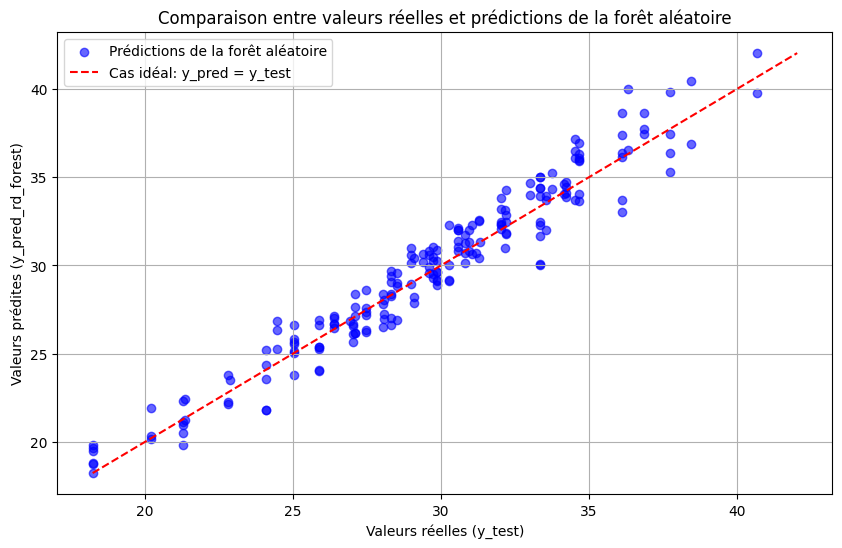

In [100]:
plt.figure(figsize = (10,6))
plt.scatter(y_pred_tree, y_test, color = 'blue', alpha = 0.6, label = "Prédictions de la forêt aléatoire")  # le alpha règle l'opacité
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label = 'Cas idéal: y_pred = y_test')  
plt.xlabel('Valeurs réelles (y_test)')
plt.ylabel('Valeurs prédites (y_pred_rd_forest)')
plt.title('Comparaison entre valeurs réelles et prédictions de la forêt aléatoire')
plt.legend()
plt.grid(True)
plt.show()

Malgré un très bon $R^2$, la courbe des valeurs prédites en fonction des valeurs réelles n'est pas terrible. Globalement, les valeurs prédites par la forêt aléatoire ou l'arbre de régression collent moins bien à la droite que les modèles linéaires précédents.
On peut également, comme pour les autres modèles, tester sa performance sur les valeurs extrêmes (même si on ne s'attend pas à des miracles au vu de la courbe précédente) : 

In [105]:
mask_1 = y_test > sqrt(1200)
mask_2 = y_test < sqrt(600)
y_test_1 = y_test[mask_1]
y_pred_rd_forest_1 = y_pred_rd_forest[mask_1] # On récupère les prédictions correspondantes 
y_test_2 = y_test[mask_2]
y_pred_rd_forest_2 = y_pred_rd_forest[mask_2]
r2_rd_forest_1 = r2_score(y_pred_rd_forest_1, y_test_1)
r2_rd_forest_2 = r2_score(y_pred_rd_forest_2, y_test_2)

print(f"R2 pour les variables à valeurs > 1200 : {r2_rd_forest_1:.4f}")
print(f"R2 pour les variables à valeurs < 600 : {r2_rd_forest_2:.4f}")

R2 pour les variables à valeurs > 1200 : 0.4386
R2 pour les variables à valeurs < 600 : 0.8484


Ces résultats confirment les difficultés de la forêt aléatoire (mais aussi des arbres) concernant la prédiction des valeurs extrêmes de la 
variable en question. Finalement, les résultats globaux de ces deux modèles sont moindres comparé à leurs homologues linéaires, certainement plus
adaptés à la situation.

## F. Entraînement d'un modèle de boosting :

On entraîne un modèle XGBoost. Il faut là encore calibrer un grand nombre d'hyperparamètres.
Dans ce cas précis, on calibre les paramètres suivants:
- n_estimators : nombre d'estimateurs (arbres) agrégés par le modèle xgboost
- max_depth : la longueur maximale des arbres
- learning_rate : taux d'apprentissage pour la mise à jour de l'estimateur
On commence donc à rentrer dans le dur vis-à-vis du temps de calcul, surtout à cause de la validation croisée qui multiplie le nombre de calculs.
On utilise ici plutôt une recherche aléatoire (avec RandomizedSearchCV) qu'une recherche exhaustive (avec GridSearchCV).

In [110]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV 

In [112]:
params_xgb = {'n_estimators': np.arange(300,1000,100), 'max_depth': np.arange(3,8,1), 'learning_rate': np.arange(0.01,0.1,0.02)}
xgb_init = XGBRegressor(objective = 'reg:squarederror', n_jobs = -1)
random_search = RandomizedSearchCV(xgb_init, params_xgb, scoring = 'r2', n_iter = 50, cv = kf_1, verbose = 1, random_state = 42)
random_search.fit(X_train_scaled, y_train)
xgb_best = random_search.best_estimator_
print("Best parameters for xgboost:", random_search.best_params_)
print("Best score for xgboost:", random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters for xgboost: {'n_estimators': np.int64(700), 'max_depth': np.int64(3), 'learning_rate': np.float64(0.06999999999999999)}
Best score for xgboost: 0.9952443529721171


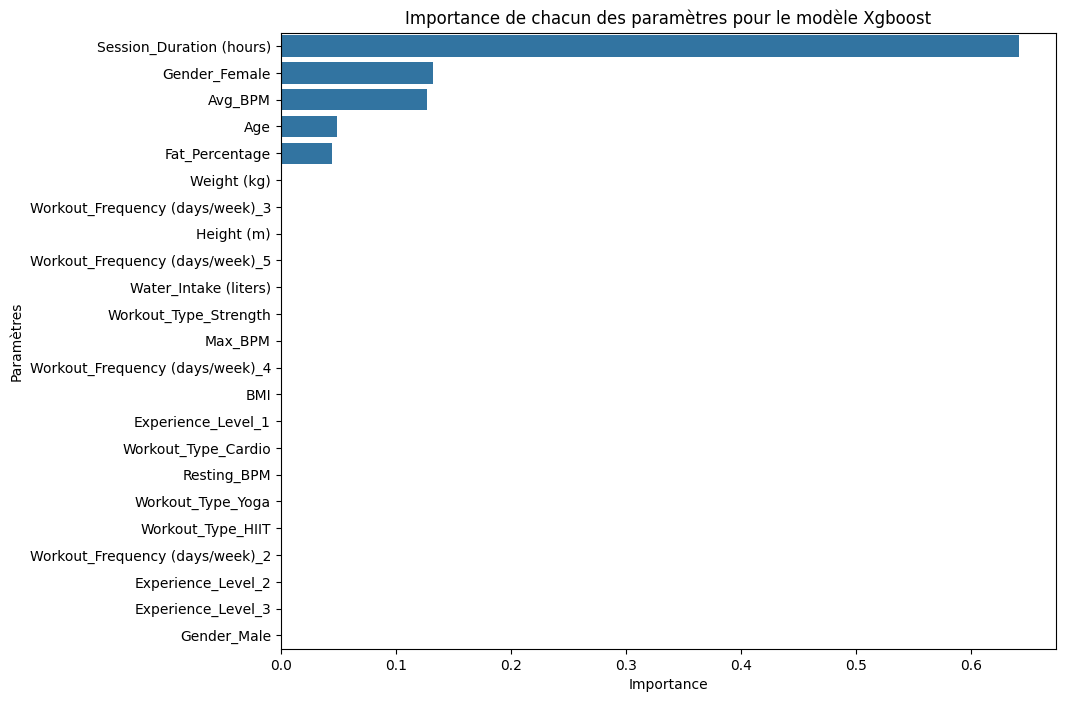

In [114]:
importances = xgb_best.feature_importances_
feature_names = data.drop("Calories_Burned", axis=1).columns
features = pd.Series(importances, index = feature_names).sort_values(ascending = False)

plt.figure(figsize = (10,8))
sns.barplot(x = features.values, y = features.index)
plt.title("Importance de chacun des paramètres pour le modèle Xgboost")
plt.xlabel("Importance")
plt.ylabel("Paramètres")
plt.show()


Ici encore, la prédiction de la variable Calories_Burned s'appuie principalement sur les variables Session_Duration (hours) et Avg_BPM. Cependant, on observe cette fois que le sexe de l'individu (à travers la variable 'Gender_Female') a une importance non négligeable pour la prédiction du modèle.

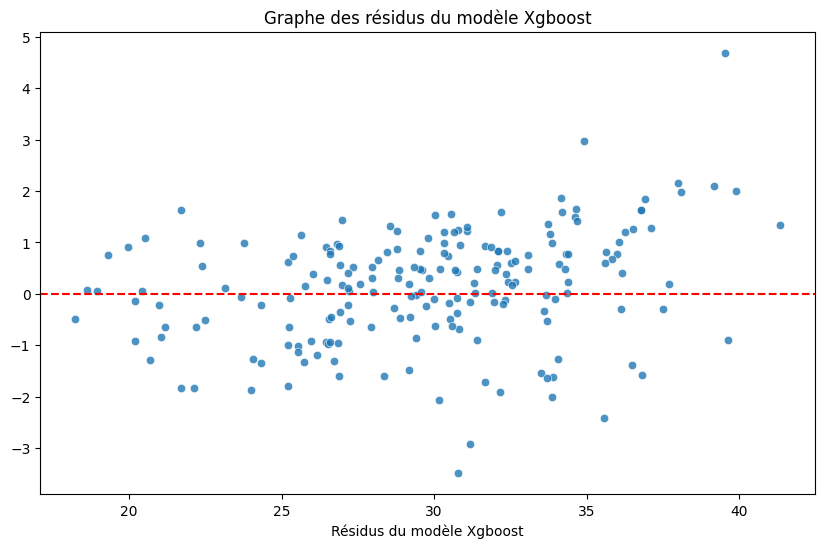

In [117]:
# Graphe des résidus de xgboost:
param_xgb = random_search.best_params_
xgb_best_final = XGBRegressor(objective = 'reg:squarederror', n_estimators = param_xgb['n_estimators'], max_depth = param_xgb['max_depth'], learning_rate = param_xgb['learning_rate'])
xgb_best_final.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_best_final.predict(X_test_scaled)
xgb_residues = y_test - y_pred

plt.figure(figsize = (10,6))
sns.scatterplot(x = y_pred_xgb, y = xgb_residues, alpha = 0.8)
plt.axhline(0, color = 'red', linestyle = '--')
plt.xlabel('Résidus du modèle Xgboost')
plt.title('Graphe des résidus du modèle Xgboost')
plt.show()


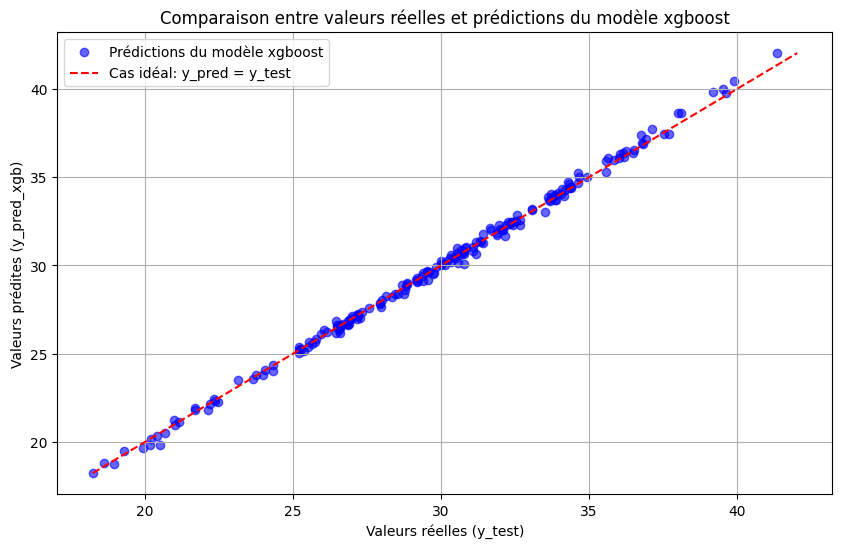

In [119]:
plt.figure(figsize = (10,6))
plt.scatter(y_pred_xgb, y_test, color = 'blue', alpha = 0.6, label = "Prédictions du modèle xgboost")  # le alpha règle l'opacité
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label = 'Cas idéal: y_pred = y_test')  
plt.xlabel('Valeurs réelles (y_test)')
plt.ylabel('Valeurs prédites (y_pred_xgb)')
plt.title('Comparaison entre valeurs réelles et prédictions du modèle xgboost')
plt.legend()
plt.grid(True)
plt.show()

On observe cette fois-ci un très bon ajustement entre les valeurs prédites par le modèle xgboost et les valeurs réelles, en ayant en plus semble-t-il l'avantage de gommer les mauvaises prédictions pour les valeurs extrêmes, ce qui peut aussi se voir sur le graphe des résidus.

In [122]:
r2_xgb = r2_score(y_pred_xgb, y_test)
rmse_xgb = np.sqrt(MSE(y_pred_xgb, y_test))
mae_xgb = MAE(y_pred_xgb, y_test)

print(f"R2 : {r2_xgb:.4f} | RMSE : {rmse_xgb:.4f} | MAE : {mae_xgb:.4f}")

R2 : 0.9976 | RMSE : 0.2370 | MAE : 0.1760


Enfin, concernant l'impression de bonne tenue du modèle sur les valeurs extrêmes : 

In [127]:
mask_1 = y_test > sqrt(1200)
mask_2 = y_test < sqrt(600)
y_test_1 = y_test[mask_1]
y_pred_xgb_1 = y_pred_xgb[mask_1] # On récupère les prédictions correspondantes 
y_test_2 = y_test[mask_2]
y_pred_xgb_2 = y_pred_xgb[mask_2]
r2_xgb_1 = r2_score(y_pred_xgb_1, y_test_1)
r2_xgb_2 = r2_score(y_pred_xgb_2, y_test_2)

print(f"R2 pour les variables à valeurs > 1200 : {r2_xgb_1:.4f}")
print(f"R2 pour les variables à valeurs < 600 : {r2_xgb_2:.4f}")

R2 pour les variables à valeurs > 1200 : 0.9515
R2 pour les variables à valeurs < 600 : 0.9834


Finalement, le modèle xgboost performe extrêmement bien dans cette situation. Il possède un très bon $R^2$, et surtout il corrige les problèmes
de prédiction des valeurs extrêmes identifiés sur les modèles linéaires et non résolus par l'entraînement des arbres ou de la forêt aléatoire.
Il apparaît donc comme le meilleur modèle jusqu'à présent en termes de performance.

## G. Entraînement d'un réseau de neurones (MLP) : 

On entraîne un réseau de neurones à l'aide de la libraire PyTorch de python.

In [136]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader, random_split

In [138]:
print("CUDA dispo:", torch.cuda.is_available())

CUDA dispo: True


In [140]:
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.reshape(-1,1), dtype=torch.float32)
full_dataset = TensorDataset(X_train_tensor, y_train_tensor)

train_size = int(0.8*len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size = batch_size, shuffle=True)  # On divise le jeu principal en jeu d'entraînement et de validation
val_loader = DataLoader(val_dataset, batch_size = batch_size, shuffle=False)

print(X_train_tensor.shape)  # Vérification des tailles pour coder correctement la couche d'entrée du réseau
print(y_train_tensor.shape)

torch.Size([778, 23])
torch.Size([778, 1])


In [157]:
model = nn.Sequential(  # On entraîne un réseau de neurones dense (ici avec 3 couches)
    nn.Linear(23, 16),  
    nn.ReLU(),
    nn.Linear(16,8),
    nn.ReLU(),
    nn.Linear(8,1)
)

criterion = nn.MSELoss()   # On cherche à minimiser la MSE (fonction coût)
optimizer = optim.Adam(model.parameters(), lr=0.001)  # On choisit un optimiseur Adam (robuste)

Epoch 10/100 | Train_loss: 446.8879 | Val_loss : 379.5583
Epoch 20/100 | Train_loss: 20.1598 | Val_loss : 20.2681
Epoch 30/100 | Train_loss: 8.4217 | Val_loss : 8.6522
Epoch 40/100 | Train_loss: 4.6004 | Val_loss : 4.7304
Epoch 50/100 | Train_loss: 3.0162 | Val_loss : 3.1110
Epoch 60/100 | Train_loss: 2.2108 | Val_loss : 2.3873
Epoch 70/100 | Train_loss: 1.7558 | Val_loss : 1.8975
Epoch 80/100 | Train_loss: 1.4391 | Val_loss : 1.5552
Epoch 90/100 | Train_loss: 1.2103 | Val_loss : 1.2847
Epoch 100/100 | Train_loss: 1.0079 | Val_loss : 1.1046


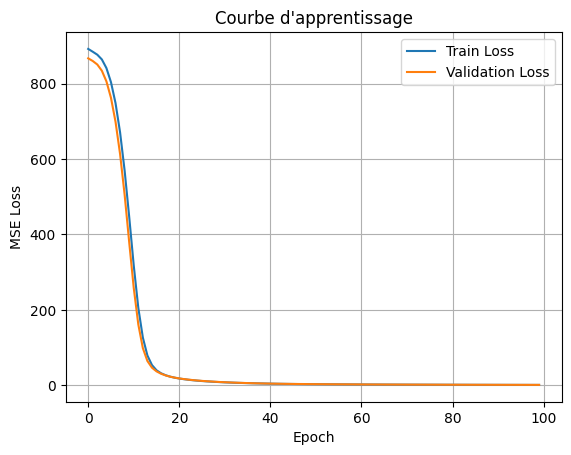

In [159]:
epochs = 100
train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    
    for batch_X, batch_Y in train_loader:  # Erreur d'apprentissage
        preds = model(batch_X)
        loss = criterion(preds, batch_Y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*batch_X.size(0)
    train_loss /= train_size
    train_losses.append(train_loss)

    model.eval()  
    val_loss = 0
    for batch_X, batch_Y in val_loader:  # Erreur de validation
        preds = model(batch_X)
        loss = criterion(preds, batch_Y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        val_loss += loss.item()*batch_X.size(0)
    val_loss /= val_size
    val_losses.append(val_loss)
    
    if (epoch + 1)%10 == 0:
        print(f"Epoch {epoch+1}/{epochs} | Train_loss: {train_loss:.4f} | Val_loss : {val_loss:.4f}")


plt.plot(train_losses, label='Train Loss')   # Affichage des deux erreurs pour vérifier le bon déroulé de l'entraînement
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Courbe d\'apprentissage')
plt.legend()
plt.grid(True)
plt.show()

Un bon indicateur du déroulé correct de l'entraînement du réseau est que les courbes d'erreur d'apprentissage et de validation 
tendent toutes les deux rapidement vers 0 (quand on essaie d'optimiser le MSE comme critère d'erreur).

In [161]:
X_test_tensor = torch.tensor(X_test_scaled, dtype = torch.float32)
y_test_tensor = torch.tensor(y_test, dtype = torch.float32)

model.eval()
with torch.no_grad(): 
    y_pred_tensor = model(X_test_tensor)
y_pred_nn = y_pred_tensor.numpy().flatten()
y_true_nn = y_test_tensor.numpy().flatten()

r2_nn = r2_score(y_pred_nn, y_true_nn)   # Evaluation des performances du réseau sur le jeu de données test
mse_nn = np.sqrt(MSE(y_pred_nn, y_true_nn))
mae_nn = MAE(y_pred_nn, y_true_nn)

print(f"Scores du réseau de neurones : R2 : {r2_nn:.4f} | RMSE : {mse_nn:.4f} | MAE : {mae_nn:.4f}")




Scores du réseau de neurones : R2 : 0.9454 | RMSE : 1.1547 | MAE : 0.9075


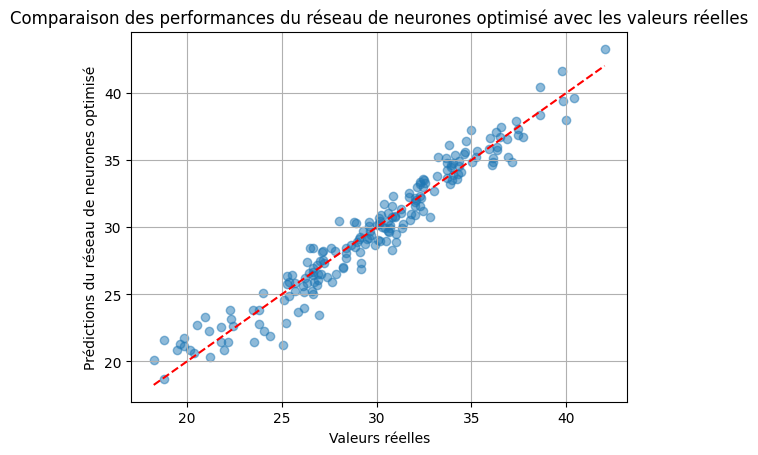

In [174]:
plt.scatter(y_true_nn, y_pred_nn, alpha=0.5)
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions du réseau de neurones optimisé")
plt.title("Comparaison des performances du réseau de neurones optimisé avec les valeurs réelles")
plt.plot([min(y_true_nn), max(y_true_nn)], [min(y_true_nn), max(y_true_nn)], 'r--')
plt.grid(True)
plt.show()

Malgré le caractère arbitraire du choix des hyper-paramètres du réseau de neurones (nombre de couches cachées et nombre de neurones par couche),
on arrive à obtenir des résultats plutôt satisfaisants. Cependant, le réseau de neurones semble, un peu comme les modèles linéaires, avoir du mal 
à prédir les valeurs extrêmes de la variable 'Calories_Burned'. Au vu de la courbe, il semble donc plus s'approcher des arbres que des modèles
linéaires ou des modèles très performants comme le SVR ou Xgboost.

In [170]:
mask_1 = y_true_nn > sqrt(1200)
mask_2 = y_true_nn < sqrt(600)
y_true_nn_1 = y_true_nn[mask_1]
y_pred_nn_1 = y_pred_nn[mask_1] # On récupère les prédictions correspondantes 
y_true_nn_2 = y_true_nn[mask_2]
y_pred_nn_2 = y_pred_nn[mask_2]
r2_nn_1 = r2_score(y_pred_nn_1, y_true_nn_1)
r2_nn_2 = r2_score(y_pred_nn_2, y_true_nn_2)

print(f"R2 pour les variables à valeurs > 1200 : {r2_nn_1:.4f}")
print(f"R2 pour les variables à valeurs < 600 : {r2_nn_2:.4f}")

R2 pour les variables à valeurs > 1200 : 0.6908
R2 pour les variables à valeurs < 600 : -0.1280


Le réseau de neurones est donc mauvais pour la prédiction de ces valeurs là. Il y a donc peu de chances qu'on souhaite le conserver comme
modèle de référence par la suite.

## H. Comparaison et sélection du meilleur modèle : 

On cherche maintenant à comparer les modèles. On va utiliser 3 métriques différentes: le $R^2$, le RMSE (root mean squared error) et le MAE 
(mean absolute error). Evidemment, le meilleur modèle est celui dont le $R^2$ est le plus proche de 1, et dont les deux erreurs (MAE et RMSE) sont 
le plus proche de 0 possible.
Aussi, une tendance s'est déjà dégagée des analyses précédentes:
- les modèles linéaires ont une bonne performance globale, mais présentent des difficultés pour prédire les valeurs extrêmes de la variable 'Calories_Burned'.
- le modèle SVR possède les mêmes caractéristiques que le modèle linéaire, mais avec un surcroît de performance sur tous les points (globales et sur les valeurs extrêmes).
- les modèles à base d'arbres (arbre de régression et forêt aléatoire) semblent les moins bons. Ils sont particulièrement mauvais concernant la prédiction des valeurs extrêmes.
- le modèle xgboost semble être le meilleur, avec un $R^2$ quasiment un 1 et de très bonnes performances sur les valeurs extrêmes.
- le réseau de neurones semble également avoir beaucoup de mal avec les valeurs extrêmes, comme la forêt ou l'arbre de régression.

In [217]:
model_preds = {
    "Régression Linéaire": y_pred_lin,
    "Lasso": y_pred_lasso,
    "Ridge": y_pred_ridge,
    "SVR": y_pred_svr,
    "Arbre": y_pred_tree,
    "Forêt Aléatoire": y_pred_rd_forest,
    "XGBoost": y_pred_xgb
}

results = []

for name, y_pred in model_preds.items():
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(MSE(y_test, y_pred))
    mae = MAE(y_test, y_pred)
    results.append({
        "Modèle": name,
        "R²": r2,
        "RMSE": rmse,
        "MAE": mae
    })

results.append({"Modèle": "Réseau de neurones dense", "R²": r2_nn, "RMSE":mse_nn, "MAE": mae_nn})

# Conversion en DataFrame
results_df = pd.DataFrame(results)

# Tri par R² décroissant
results_df = results_df.sort_values(by="R²", ascending=False).reset_index(drop=True)

# Affichage
print(results_df.round(3))

                     Modèle     R²   RMSE    MAE
0                   XGBoost  0.998  0.237  0.176
1                       SVR  0.992  0.427  0.342
2                     Lasso  0.987  0.566  0.431
3       Régression Linéaire  0.986  0.567  0.432
4                     Ridge  0.986  0.571  0.432
5           Forêt Aléatoire  0.975  0.777  0.618
6  Réseau de neurones dense  0.945  1.155  0.908
7                     Arbre  0.941  1.184  0.949


On voit donc que les modèles les plus performants globalement sont xgboost et SVR, suivis de près par les modèles linéaires (Lasso, Ridge,
régression linéaire simple).

In [221]:
conditions = {
    "y_test > 1200": y_test > sqrt(1200),
    "y_test < 600": y_test < sqrt(600)
}

results_xtrm = []

for cond_name, cond_mask in conditions.items():
    for model_name, y_pred in model_preds.items():
        r2 = r2_score(y_test[cond_mask], y_pred[cond_mask])
        results_xtrm.append({
            "Sous-catégorie": cond_name,
            "Modèle": model_name,
            "R²": r2
        })

results_xtrm.append({
    "Sous-catégorie": "y_test < 600",
    "Modèle": "Réseau de Neurones",
    "R²": r2_score(y_true_nn_1, y_pred_nn_1)
})

results_xtrm.append({
    "Sous-catégorie": "y_test > 1200",
    "Modèle": "Réseau de Neurones",
    "R²": r2_score(y_true_nn_2, y_pred_nn_2)
})

results_xtrm_df = pd.DataFrame(results_xtrm)

results_pivot = results_xtrm_df.pivot_table(index="Modèle", columns="Sous-catégorie", values="R²")
for col in results_pivot.columns:
  print(results_pivot[[col]].sort_values(by=col, ascending=False).round(3))

Sous-catégorie       y_test < 600
Modèle                           
XGBoost                     0.984
SVR                         0.934
Forêt Aléatoire             0.830
Lasso                       0.822
Régression Linéaire         0.821
Ridge                       0.811
Réseau de Neurones          0.606
Arbre                       0.582
Sous-catégorie       y_test > 1200
Modèle                            
XGBoost                      0.957
SVR                          0.926
Lasso                        0.842
Ridge                        0.841
Régression Linéaire          0.841
Forêt Aléatoire              0.558
Réseau de Neurones           0.346
Arbre                        0.152


Les valeurs de $R^2$ concernant les valeurs extrêmes confirment la tendance. On a d'un côté les modèles les plus performants (xgboost, SVR) 
qui performent très bien à tout point de vue, suivis d'assez près par les différentes régressions linéaires, et enfin les autres modèles (arbre,
forêt aléatoire et enfin réseau de neurones) qui sont particulièrement en difficulté, notamment pour la prédiction de ces valeurs extrêmes.

Finalement, on observe que le modèle xgboost est plus performant que tous les autres sur l'ensemble des critères, y compris sur la prédiction des valeurs extrêmes. Objectivement, on conseillerait donc 
d'utiliser ce modèle pour la prédiction des valeurs de la variable 'Calories_Burned'.
Cependant, en termes d'interprétabilité des résultats, les meilleurs modèles (xgboost, SVR) sont également les moins interprétables (à part si on se restreint à un noyau linéaire pour le SVR). 
On peut alors considérer que le meilleur modèle, qui reste interprétable, est alors le modèle linéaire Lasso. Petit bonus, il permet aussi de faire de la sélection de variables. En revanche, c'est si le modèle qui est conservé, il faut garder à l'esprit que ses prédictions des valeurs extrêmes de la variable seront en moyenne plus mauvaises qu'avec l'utilisation de xgboost ou SVR.

---------------------------------------------------------------------------------

# IV. Classification

In [47]:
data = data_init

In [49]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV

Nous divisons le jeu de données en un échantillon d’apprentissage (80%) et un échantillon test (20%) afin de pouvoir évaluer objectivement la performance des algorithmes sur des données jamais vues pendant l'entraînement. Cette séparation est indispensable pour éviter l’overfitting, c’est-à-dire le cas où un modèle mémorise les données d'entraînement sans généraliser. L’échantillon test permet donc d’obtenir une estimation réaliste de la capacité de généralisation du modèle sur de nouvelles données.

In [54]:
# Cible à expliquer : Experience_Level (multiclasse 0/1/2)
le = LabelEncoder()
dfC = data.copy()
y = le.fit_transform(dfC['Experience_Level'])

# Préparation des variables explicatives
X = dfC.drop('Experience_Level', axis=1)

# Encodage manuel des variables qualitatives
X = pd.get_dummies(X, columns=['Gender', 'Workout_Type', 'Workout_Frequency (days/week)'], drop_first=True)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardisation des variables (important pour certains modèles)
scaler = StandardScaler()
scaler.fit(X_train)  
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)



## A. Regression logistique

Sans pénalisation:

In [57]:
logit = LogisticRegression(penalty=None, solver="lbfgs", multi_class='ovr', max_iter=1000)

# Entraînement sur l'échantillon d'entraînement
logitOpt = logit.fit(X_train_scaled, y_train)

# Évaluation sur le test
print("Précision test :", logitOpt.score(X_test_scaled, y_test))
print("Erreur test :", 1 - logitOpt.score(X_test_scaled, y_test))

Précision test : 0.8666666666666667
Erreur test : 0.1333333333333333


C:\Users\anter\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [59]:
# Prédictions sur le test
y_pred = logitOpt.predict(X_test_scaled)

# Matrice de confusion
table = pd.crosstab(y_pred, y_test, rownames=['Prédit'], colnames=['Réel'])
print("Matrice de confusion :")
print(table)

Matrice de confusion :
Réel     0   1   2
Prédit            
0       63  14   0
1       12  68   0
2        0   0  38


Le modèle distingue parfaitement la classe 2 (experts), avec aucune erreur. Il fait quelques confusions entre les classes 0 (débutants) et 1 (intermédiaires), mais conserve une bonne séparation globale. Les erreurs concernent uniquement les débutants et intermédiaires, ce qui suggère que ces deux classes sont plus proches dans l’espace des variables que la classe des experts.

In [62]:
# Coefficients pour chaque classe
logitCoef = logitOpt.coef_

for i, coef in enumerate(logitCoef):
    print(f"Coefficients pour la classe {i} :")
    print(coef)

# Associer les coefficients aux noms de variables
feature_names = X.columns  # après get_dummies()
for i, coef in enumerate(logitCoef):
    print(f"\nClasse {i} :")
    for name, val in zip(feature_names, coef):
        if val != 0:
            print(f"  {name:30s} -> {val:+.3f}")


Coefficients pour la classe 0 :
[-1.73523849e-01 -1.08166567e-01  4.72591445e-01 -1.19273483e-02
  4.77524416e-01  2.89003860e-02  1.55910282e-01 -1.76617794e+00
  1.40612804e-01  5.70530485e-02  2.11625185e-01 -1.66687797e-01
  9.26629085e-03 -1.06351288e-01 -1.78462158e-01 -1.00007313e+01
 -1.91919027e+01 -1.15154637e+01]
Coefficients pour la classe 1 :
[ 8.81496257e-01 -1.79908969e-01 -2.77462757e-01 -5.24458341e-02
 -1.75543327e+00 -1.60442176e-01 -5.26454414e+00  6.02110772e+00
  1.37999152e+00 -6.91436087e-01  7.62647260e-04  4.65759538e-01
  1.29820694e-01  7.07058184e-02  1.87285821e-01  9.61348446e+00
  1.04281706e+01 -1.75182056e+00]
Coefficients pour la classe 2 :
[ 0.30895951  0.19940617  0.34265972  0.59929298 -0.73013477  0.06941533
  4.63759991  1.35383092 -8.31226879  1.55877728  0.02877848 -4.07003792
  0.10936746  0.38758181  0.20478194 -0.23533603  0.88439329  3.52375249]

Classe 0 :
  Age                            -> -0.174
  Weight (kg)                    -> -0.10

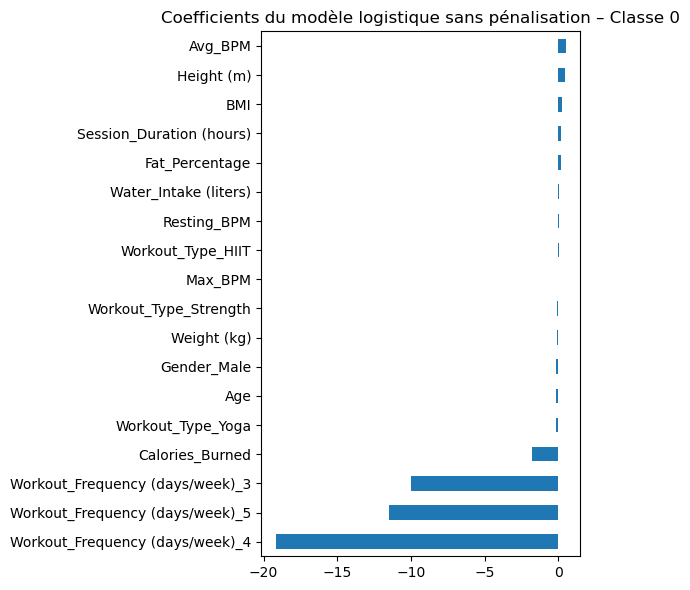

In [64]:
classe = 0  
coef = pd.Series(logitCoef[classe], index=X.columns)
imp_coef = coef.sort_values()

plt.figure(figsize=(6, 6))
imp_coef.plot(kind="barh")
plt.title(f"Coefficients du modèle logistique sans pénalisation – Classe {classe}")
plt.tight_layout()
plt.show()


Les individus ayant une faible fréquence d’entraînement (Workout_Frequency) sont fortement associés à la classe des débutants, avec des effets négatifs très marqués.

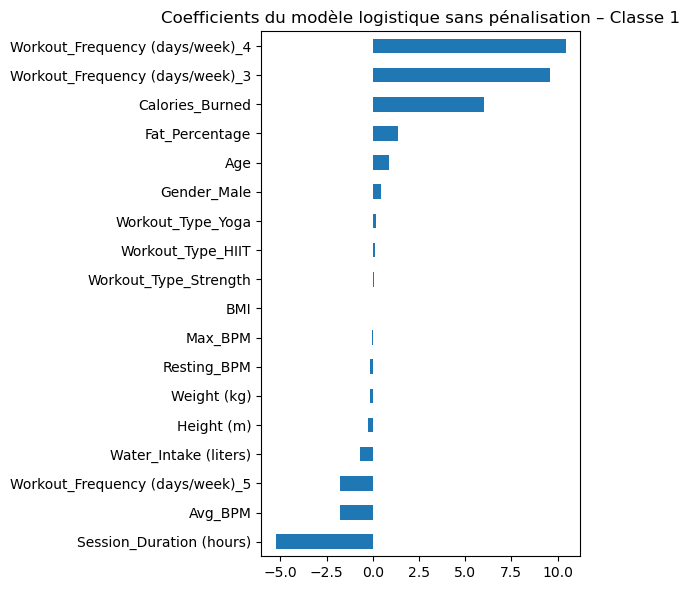

In [67]:
classe = 1
coef = pd.Series(logitCoef[classe], index=X.columns)
imp_coef = coef.sort_values()

plt.figure(figsize=(6, 6))
imp_coef.plot(kind="barh")
plt.title(f"Coefficients du modèle logistique sans pénalisation – Classe {classe}")
plt.tight_layout()
plt.show()


Les individus classés comme intermédiaires sont fortement caractérisés par une dépense énergétique élevée (Calories_Burned) et une fréquence d’entraînement modérée à élevée (Workout_Frequency_3 et _4). On note également une influence positive du taux de masse grasse (Fat_Percentage) et de l’âge, ce qui peut refléter un public un peu plus expérimenté mais pas encore expert. En revanche, une durée de séance faible ainsi qu’une fréquence de 5 fois/semaine semblent peu compatibles avec ce profil, suggérant qu’ils sont plutôt associés aux experts.

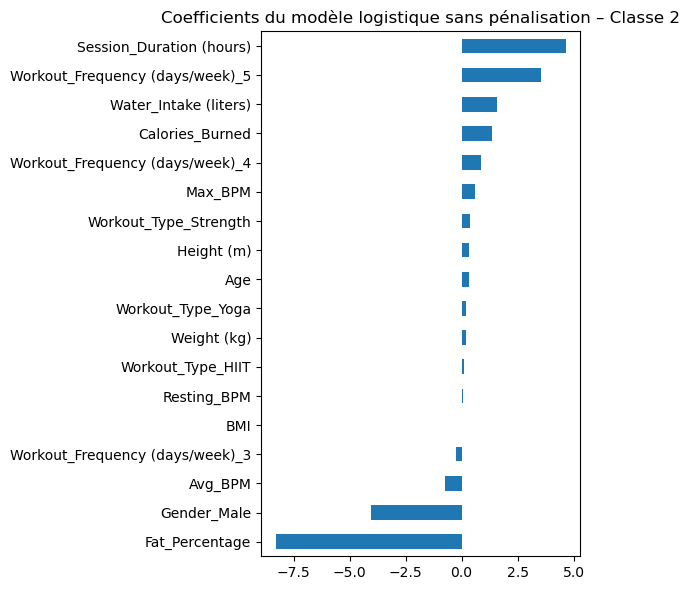

In [70]:
classe = 2
coef = pd.Series(logitCoef[classe], index=X.columns)
imp_coef = coef.sort_values()

plt.figure(figsize=(6, 6))
imp_coef.plot(kind="barh")
plt.title(f"Coefficients du modèle logistique sans pénalisation – Classe {classe}")
plt.tight_layout()
plt.show()


Les experts se distinguent par des séances longues (Session_Duration), une forte dépense énergétique (Calories_Burned), et une hydratation élevée (Water_Intake). On note aussi une association nette avec une faible masse grasse (Fat_Percentage fortement négatif), ce qui est physiologiquement cohérent. La fréquence d'entraînement élevée (Workout_Frequency_5) et l'inclination vers des séances de type force ou yoga renforcent ce profil. En revanche, le fait d’être un homme est ici étonnamment corrélé négativement, ce qui pourrait refléter un biais structurel dans l'échantillon.

On remarque que nos résultats sont cohérent avec les analyses réalisées sur l'ACP dans le notebook R.

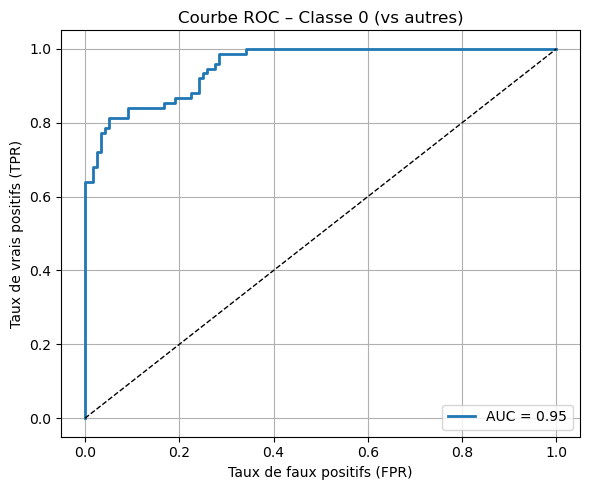

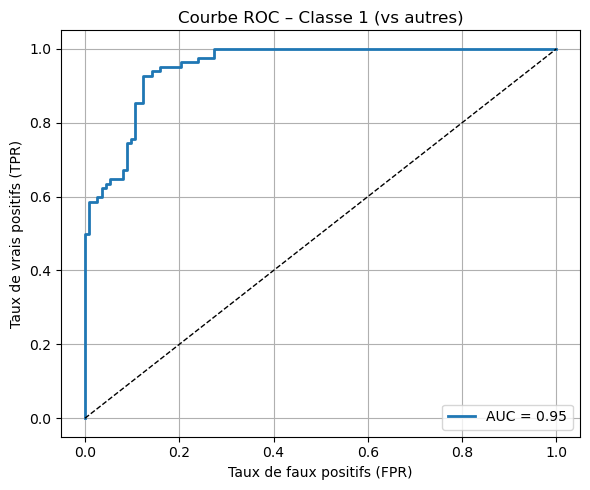

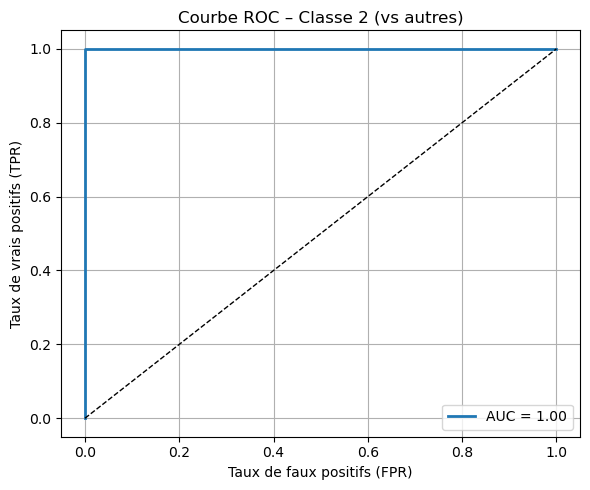

In [74]:
# Binarisation des classes (0, 1, 2) → vecteurs one-hot

y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Prédiction des probabilités sur l'échantillon test
y_score = logitOpt.predict_proba(X_test_scaled)

# Courbe ROC par classe (one-vs-rest)
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)

    # Affichage
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, lw=2, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlabel("Taux de faux positifs (FPR)")
    plt.ylabel("Taux de vrais positifs (TPR)")
    plt.title(f"Courbe ROC – Classe {i} (vs autres)")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Lasso:

In [77]:
# Optimisation du paramètre de pénalisation
# grille de valeurs
param=[{"C":[1,1.2,1.5,1.7,2,3,4]}]
logit_L1 = GridSearchCV(LogisticRegression(penalty="l1",solver="liblinear"), param,cv=5,n_jobs=-1)
logitOpt_L1=logit_L1.fit(X_train_scaled, y_train)  # GridSearchCV est lui-même un estimateur
# paramètre optimal
logitOpt_L1.best_params_["C"]
print("Meilleur score = %f, Meilleur paramètre = %s" % (1.-logitOpt_L1.best_score_,logitOpt_L1.best_params_))

Meilleur score = 0.137527, Meilleur paramètre = {'C': 1.2}


In [79]:
print("Précision test :", logitOpt_L1.score(X_test_scaled, y_test))
print("Erreur test :", 1 - logitOpt_L1.score(X_test_scaled, y_test))

Précision test : 0.8666666666666667
Erreur test : 0.1333333333333333


In [81]:
y_pred = logitOpt_L1.predict(X_test_scaled)
table = pd.crosstab(y_pred, y_test, rownames=['Prédit'], colnames=['Réel'])
print("Matrice de confusion :")
print(table)

Matrice de confusion :
Réel     0   1   2
Prédit            
0       63  14   0
1       12  68   0
2        0   0  38


Le modèle prédit très bien la classe 2 (expert), mais confond parfois les classes 0 (débutant) et 1 (intermédiaire), notamment 14 débutants pris pour intermédiaires et 12 intermédiaires pris pour débutants.

In [84]:
# Réentraîner le modèle avec le meilleur C
logitLasso = LogisticRegression(
    penalty="l1",
    C=logitOpt_L1.best_params_['C'],
    solver="liblinear",
    multi_class='ovr',
    max_iter=1000
)

logitLasso.fit(X_train_scaled, y_train)

# Coefficients : un vecteur par classe (car classification multiclasse)
logitCoef = logitLasso.coef_

# Affichage des coefficients pour chaque classe
for i, coef in enumerate(logitCoef):
    print(f"Coefficients pour la classe {i} :")
    print(coef)

Coefficients pour la classe 0 :
[-0.07588716  0.06996589  0.30944835  0.          0.26186135  0.00806145
 -0.44632246 -1.0863783   0.1461878   0.01023764  0.         -0.16220724
  0.01454356 -0.08114792 -0.14779311 -2.58969281 -5.04555777 -2.43184138]
Coefficients pour la classe 1 :
[ 0.60615919 -0.13232081 -0.23615251 -0.02885892 -1.14789567 -0.13061922
 -3.50847085  4.11679389  1.35013794 -0.67559085  0.          0.67338256
  0.0805115   0.02904822  0.13130993  2.57054492  3.54800003  0.        ]
Coefficients pour la classe 2 :
[ 0.          0.          0.          0.          0.          0.
  2.6507745   0.         -4.66021011  0.13825004  0.         -1.40000041
  0.          0.          0.         -0.21927809  0.17936371  0.59817067]


C:\Users\anter\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [86]:
feature_names = X.columns  # après get_dummies()
for i, coef in enumerate(logitCoef):
    print(f"\nClasse {i} :")
    for name, val in zip(feature_names, coef):
        if val != 0:
            print(f"  {name:30s} -> {val:+.3f}")


Classe 0 :
  Age                            -> -0.076
  Weight (kg)                    -> +0.070
  Height (m)                     -> +0.309
  Avg_BPM                        -> +0.262
  Resting_BPM                    -> +0.008
  Session_Duration (hours)       -> -0.446
  Calories_Burned                -> -1.086
  Fat_Percentage                 -> +0.146
  Water_Intake (liters)          -> +0.010
  Gender_Male                    -> -0.162
  Workout_Type_HIIT              -> +0.015
  Workout_Type_Strength          -> -0.081
  Workout_Type_Yoga              -> -0.148
  Workout_Frequency (days/week)_3 -> -2.590
  Workout_Frequency (days/week)_4 -> -5.046
  Workout_Frequency (days/week)_5 -> -2.432

Classe 1 :
  Age                            -> +0.606
  Weight (kg)                    -> -0.132
  Height (m)                     -> -0.236
  Max_BPM                        -> -0.029
  Avg_BPM                        -> -1.148
  Resting_BPM                    -> -0.131
  Session_Duration (hours) 

In [88]:
for i, coef_vect in enumerate(logitLasso.coef_):
    coef = pd.Series(coef_vect, index=X.columns)
    n_non_zero = (coef != 0).sum()
    n_zero = (coef == 0).sum()
    print(f"Classe {i} : Lasso conserve {n_non_zero} variables et en supprime {n_zero}")

Classe 0 : Lasso conserve 16 variables et en supprime 2
Classe 1 : Lasso conserve 16 variables et en supprime 2
Classe 2 : Lasso conserve 7 variables et en supprime 11


In [90]:
for i, coef_vect in enumerate(logitLasso.coef_):
    coef = pd.Series(coef_vect, index=X.columns)
    kept = coef[coef != 0].index.tolist()
    removed = coef[coef == 0].index.tolist()
    
    print(f"\nClasse {i} :")
    print(f"Variables conservées ({len(kept)}): {kept}")
    print(f"Variables supprimées ({len(removed)}): {removed}")


Classe 0 :
Variables conservées (16): ['Age', 'Weight (kg)', 'Height (m)', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage', 'Water_Intake (liters)', 'Gender_Male', 'Workout_Type_HIIT', 'Workout_Type_Strength', 'Workout_Type_Yoga', 'Workout_Frequency (days/week)_3', 'Workout_Frequency (days/week)_4', 'Workout_Frequency (days/week)_5']
Variables supprimées (2): ['Max_BPM', 'BMI']

Classe 1 :
Variables conservées (16): ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage', 'Water_Intake (liters)', 'Gender_Male', 'Workout_Type_HIIT', 'Workout_Type_Strength', 'Workout_Type_Yoga', 'Workout_Frequency (days/week)_3', 'Workout_Frequency (days/week)_4']
Variables supprimées (2): ['BMI', 'Workout_Frequency (days/week)_5']

Classe 2 :
Variables conservées (7): ['Session_Duration (hours)', 'Fat_Percentage', 'Water_Intake (liters)', 'Gender_Male', 'Workout_Frequency (days/we

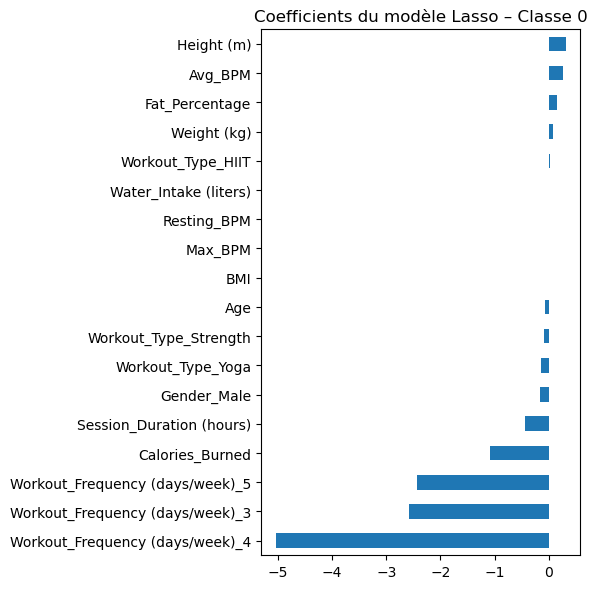

In [92]:
classe = 0  
coef = pd.Series(logitLasso.coef_[classe], index=X.columns)
imp_coef = coef.sort_values()

plt.figure(figsize=(6, 6))
imp_coef.plot(kind="barh")
plt.title(f"Coefficients du modèle Lasso – Classe {classe}")
plt.tight_layout()
plt.show()

Pour la classe des débutants, on voit surtout que ce sont les variables Workout_Frequency qui influencent le plus, elles influencent négativement donc on peut supposer que le modele se base surtout sur les personnes qui ne font pas beaucoup de sport par semaine.

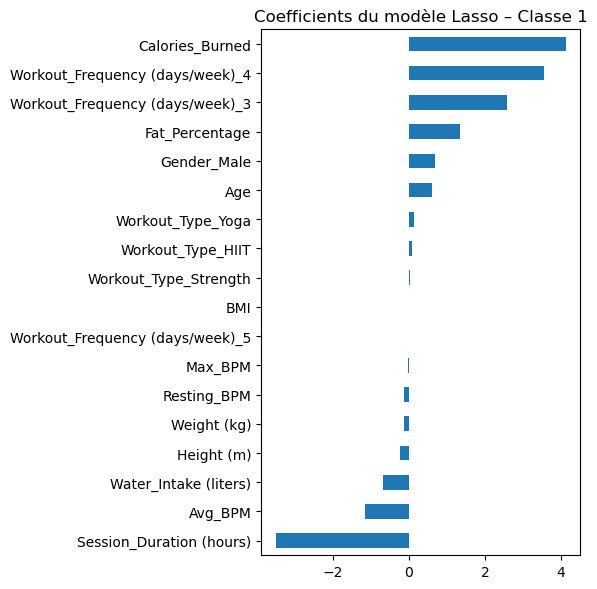

In [95]:
classe = 1  
coef = pd.Series(logitLasso.coef_[classe], index=X.columns)
imp_coef = coef.sort_values()

plt.figure(figsize=(6, 6))
imp_coef.plot(kind="barh")
plt.title(f"Coefficients du modèle Lasso – Classe {classe}")
plt.tight_layout()
plt.show()

Pour la classe des intermédiaires, on voit surtout que ce sont les variables Calories_Burned, Workout_frequency 4 et 3 (positivement) et Session_Duration (négativement) qui influencent le plus,  donc on peut supposer que le modele se base surtout sur les personnes qui s’entraînent souvent mais moins longtemps, et brûlent beaucoup de calories.

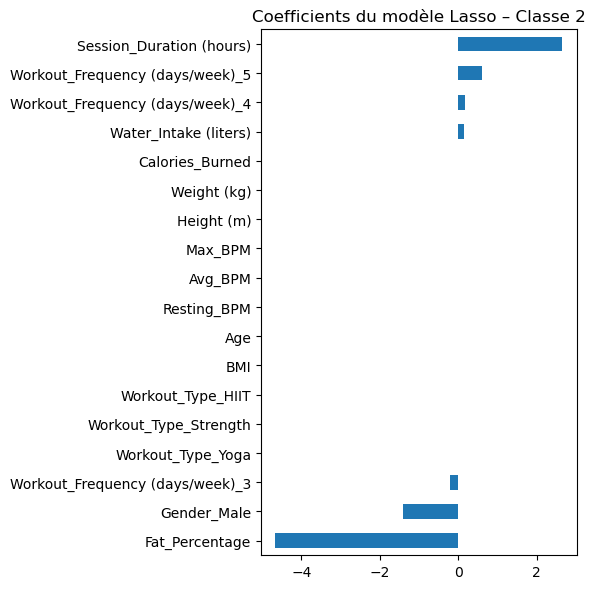

In [98]:
classe = 2  
coef = pd.Series(logitLasso.coef_[classe], index=X.columns)
imp_coef = coef.sort_values()

plt.figure(figsize=(6, 6))
imp_coef.plot(kind="barh")
plt.title(f"Coefficients du modèle Lasso – Classe {classe}")
plt.tight_layout()
plt.show()

Pour la classe des experts, on voit surtout que ce sont les variables Session_Duration (positivement) et Fat_Percentage (négativement) qui influencent le plus, donc on peut supposer que le modele se base surtout sur les personnes qui s’entraînent longtemps et ont un très faible taux de graisse corporel.

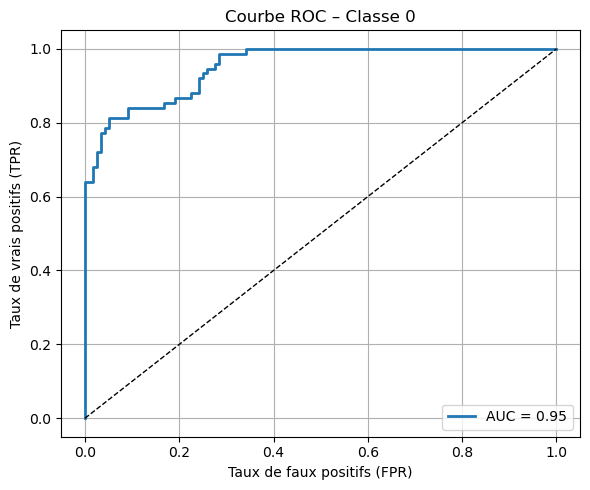

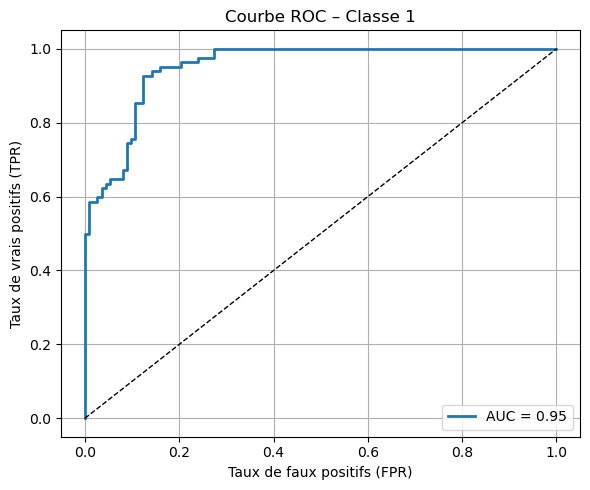

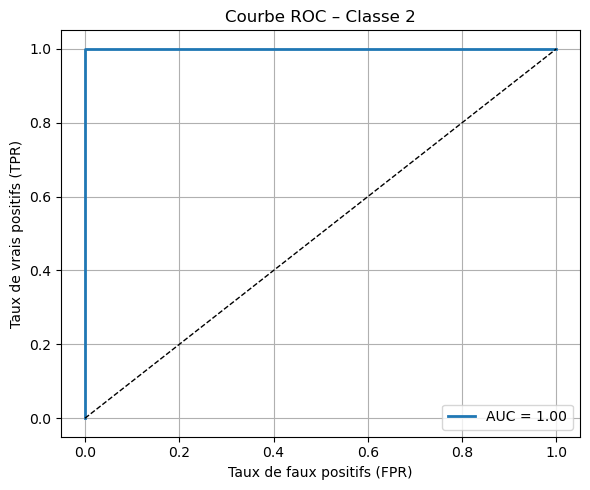

In [101]:
# Binariser la variable cible y_test 
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Prédiction des probabilités avec le modèle logitOpt
y_score = logitOpt.predict_proba(X_test_scaled)

# Affichage d'une courbe ROC pour chaque classe, séparément
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, lw=2, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlabel("Taux de faux positifs (FPR)")
    plt.ylabel("Taux de vrais positifs (TPR)")
    plt.title(f"Courbe ROC – Classe {i}")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Ridge:

In [104]:
# Grille de valeurs pour C (inverse de la régularisation L2)
param = [{"C": [0.1, 0.5, 1, 2, 3, 4, 5]}]

# GridSearchCV avec pénalisation Ridge
logit_L2 = GridSearchCV(
    LogisticRegression(penalty="l2", solver="lbfgs", multi_class='ovr', max_iter=1000),
    param_grid=param,
    cv=5,
    n_jobs=-1
)
logitOpt_L2 = logit_L2.fit(X_train_scaled, y_train)

# Résultats validation croisée + test
print("Meilleur paramètre C :", logitOpt_L2.best_params_['C'])
print("Meilleur score :",1- logitOpt_L2.best_score_)

Meilleur paramètre C : 2
Meilleur score : 0.13881720430107514


C:\Users\anter\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [106]:
print("Précision test :", logitOpt_L2.score(X_test_scaled, y_test))
print("Erreur test :", 1 - logitOpt_L2.score(X_test_scaled, y_test))


Précision test : 0.8769230769230769
Erreur test : 0.12307692307692308


In [108]:
y_pred = logitOpt_L2.predict(X_test_scaled)
table = pd.crosstab(y_pred, y_test, rownames=['Prédit'], colnames=['Réel'])
print("\nMatrice de confusion :")
print(table)


Matrice de confusion :
Réel     0   1   2
Prédit            
0       64  13   0
1       11  69   0
2        0   0  38


In [110]:
# Coefficients par classe
logitCoef = logitOpt_L2.best_estimator_.coef_

for i, coef in enumerate(logitCoef):
    print(f"\nCoefficients pour la classe {i} :")
    print(coef)

# Associer noms des variables
feature_names = X.columns
for i, coef in enumerate(logitCoef):
    print(f"\nClasse {i} :")
    for name, val in zip(feature_names, coef):
        if val != 0:
            print(f"  {name:30s} -> {val:+.3f}")



Coefficients pour la classe 0 :
[-0.08581841  0.05782785  0.35073032 -0.00891265  0.26549808  0.02218425
 -0.52983539 -1.02389968  0.18384832  0.05033983  0.02583296 -0.20753095
  0.01841012 -0.0945499  -0.16053688 -2.21114452 -4.45625299 -2.18038805]

Coefficients pour la classe 1 :
[ 0.48075462 -0.11994001 -0.25506669 -0.03103361 -0.86406685 -0.13256822
 -2.64300175  3.20484554  1.38013915 -0.70475895 -0.01134554  0.85723347
  0.09995036  0.04467513  0.14417781  2.41734159  3.3887237  -0.11618751]

Coefficients pour la classe 2 :
[ 0.1118075  -0.04180993 -0.04376189  0.12324801 -0.52125004  0.04099186
  2.31488767  1.17601919 -3.33874332  0.87799267 -0.02023178 -1.50306026
  0.15251303  0.00487488  0.08465376 -0.46886292  0.73586297  1.05699487]

Classe 0 :
  Age                            -> -0.086
  Weight (kg)                    -> +0.058
  Height (m)                     -> +0.351
  Max_BPM                        -> -0.009
  Avg_BPM                        -> +0.265
  Resting_BPM 

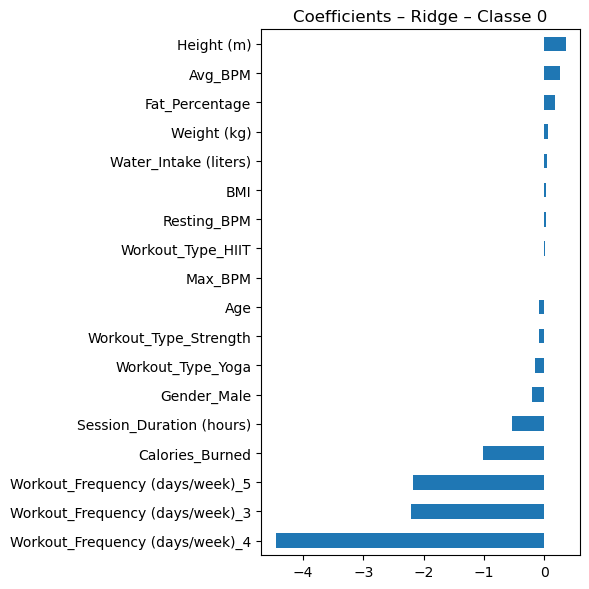

In [112]:
# Visualisation des coefficients pour une classe
classe = 0  # à changer pour 1 ou 2
coef = pd.Series(logitCoef[classe], index=X.columns)
imp_coef = coef.sort_values()

plt.figure(figsize=(6, 6))
imp_coef.plot(kind="barh")
plt.title(f"Coefficients – Ridge – Classe {classe}")
plt.tight_layout()
plt.show()

Le profil des débutants est associé à une faible fréquence d'entraînement (Workout_Frequency_3, _4, _5) et à une durée de séance réduite (Session_Duration). Une faible dépense calorique (Calories_Burned) accentue également leur probabilité d’être classés comme débutants. À l’inverse, certaines variables corporelles comme la taille, le taux de masse grasse, et l’IMC contribuent légèrement à cette classification, mais de manière secondaire. Ce profil reflète une activité physique occasionnelle, peu intense, typique des individus en début de parcours sportif.

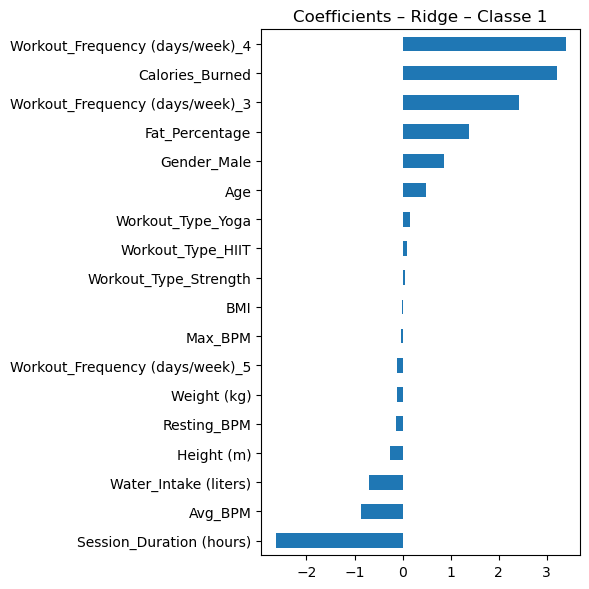

In [115]:
classe = 1
coef = pd.Series(logitCoef[classe], index=X.columns)
imp_coef = coef.sort_values()

plt.figure(figsize=(6, 6))
imp_coef.plot(kind="barh")
plt.title(f"Coefficients – Ridge – Classe {classe}")
plt.tight_layout()
plt.show()

Les intermédiaires se caractérisent par une dépense calorique élevée (Calories_Burned), une fréquence d’entraînement modérée à élevée (Workout_Frequency_3 et _4), et un taux de masse grasse plus important. Le sexe masculin, ainsi que l’âge, favorisent également cette classification. À l’inverse, une longue durée de séance (Session_Duration) et une bonne hydratation (Water_Intake) sont associées négativement à cette classe, ce qui les distingue des profils experts. Ce groupe semble donc correspondre à des individus actifs, mais pas encore au niveau maximal d'engagement ou de condition physique.

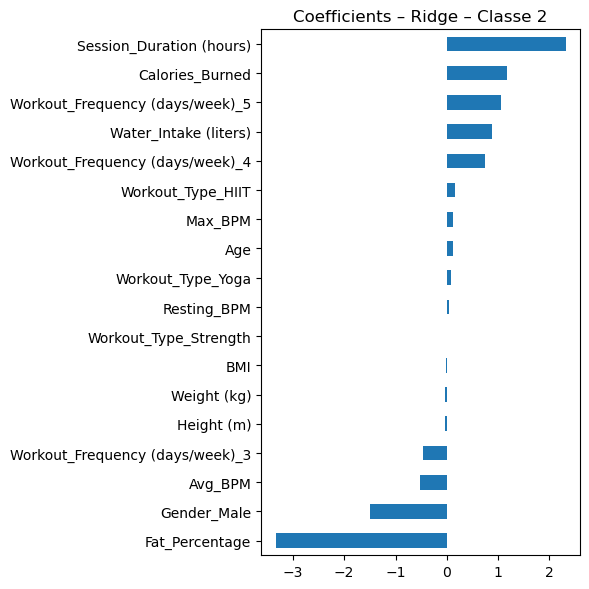

In [118]:
classe = 2
coef = pd.Series(logitCoef[classe], index=X.columns)
imp_coef = coef.sort_values()

plt.figure(figsize=(6, 6))
imp_coef.plot(kind="barh")
plt.title(f"Coefficients – Ridge – Classe {classe}")
plt.tight_layout()
plt.show()

Les experts sont fortement associés à une durée de séance longue (Session_Duration), une grande dépense énergétique (Calories_Burned), une bonne hydratation (Water_Intake) et une fréquence d'entraînement élevée, notamment Workout_Frequency_5. En parallèle, ils présentent un faible taux de masse grasse, et sont moins souvent identifiés comme des hommes (Gender_Male est négatif ici, possiblement un effet de structure de l’échantillon). Ce profil correspond à des individus investis, réguliers et en bonne condition physique, caractéristiques attendues des sportifs expérimentés.

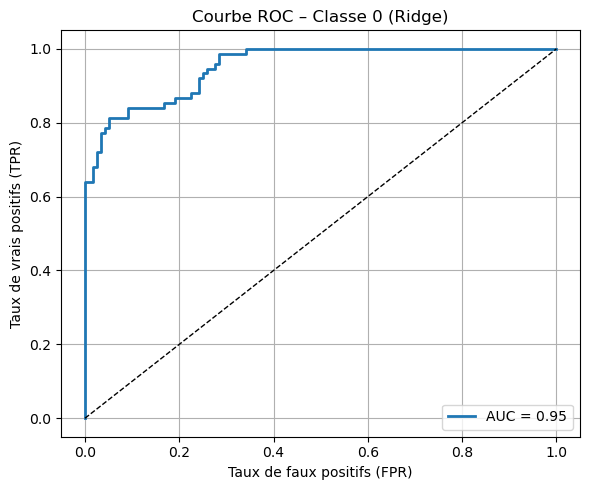

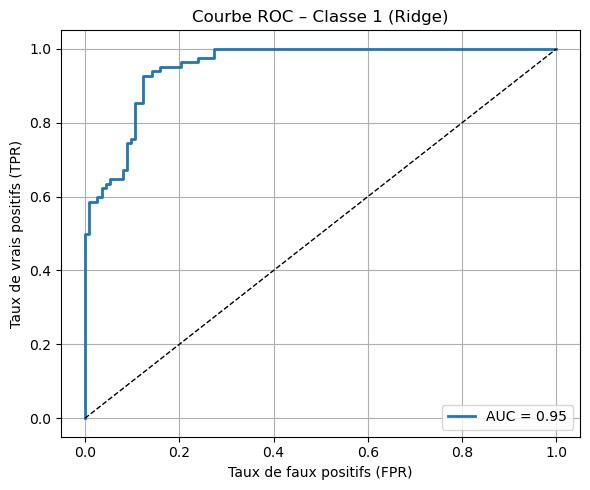

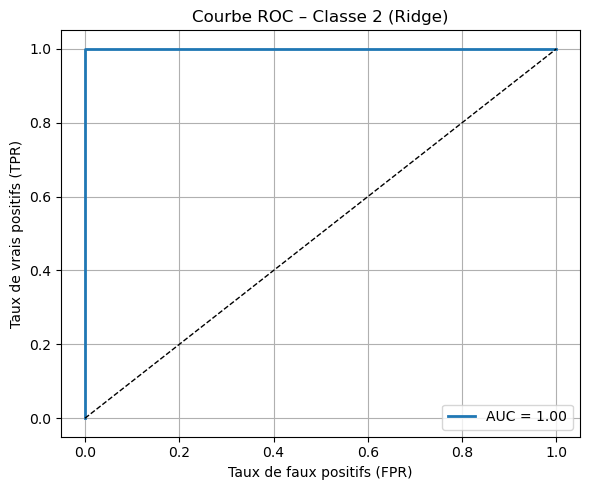

In [121]:
# Courbes ROC par classe
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_score = logitOpt.predict_proba(X_test_scaled)

for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, lw=2, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlabel("Taux de faux positifs (FPR)")
    plt.ylabel("Taux de vrais positifs (TPR)")
    plt.title(f"Courbe ROC – Classe {i} (Ridge)")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Elastic net:

In [124]:
# Grille de recherche pour Elastic Net
param_grid = {
    "C": [0.1, 0.3, 0.5, 0.8, 1, 1.5, 1.8, 2, 2.5],
    "l1_ratio": [0.1, 0.3, 0.5, 0.7 ,0.9]
}

logit_EN = GridSearchCV(
    LogisticRegression(penalty="elasticnet", solver="saga", max_iter=1000, multi_class='ovr'),
    param_grid,
    cv=5,
    n_jobs=-1
)

# Entraînement
logitOpt_EN = logit_EN.fit(X_train_scaled, y_train)

# Résultats
print("Meilleur paramètre :", logitOpt_EN.best_params_)
print("Erreur validation CV :", 1 - logitOpt_EN.best_score_)

C:\Users\anter\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Meilleur paramètre : {'C': 1.5, 'l1_ratio': 0.5}
Erreur validation CV : 0.13624483043837876


In [126]:
print("Précision test :", logitOpt_EN.score(X_test_scaled, y_test))
print("Erreur test :", 1 - logitOpt_EN.score(X_test_scaled, y_test))

Précision test : 0.8769230769230769
Erreur test : 0.12307692307692308


In [128]:
# Matrice de confusion
y_pred = logitOpt_EN.predict(X_test_scaled)
table = pd.crosstab(y_pred, y_test, rownames=['Prédit'], colnames=['Réel'])
print("Matrice de confusion :")
print(table)

Matrice de confusion :
Réel     0   1   2
Prédit            
0       64  13   0
1       11  69   0
2        0   0  38


In [130]:
# Réentraîner avec les meilleurs hyperparamètres
logitElastic = LogisticRegression(
    penalty="elasticnet",
    solver="saga",
    C=logitOpt_EN.best_params_["C"],
    l1_ratio=logitOpt_EN.best_params_["l1_ratio"],
    max_iter=1000,
    multi_class='ovr'
)
logitElastic.fit(X_train_scaled, y_train)

# Coefficients
logitCoef = logitElastic.coef_

# Affichage des coefficients par classe
feature_names = X.columns
for i, coef in enumerate(logitCoef):
    print(f"\nClasse {i} :")
    for name, val in zip(feature_names, coef):
        if val != 0:
            print(f"  {name:30s} -> {val:+.3f}")


Classe 0 :
  Age                            -> -0.075
  Weight (kg)                    -> +0.076
  Height (m)                     -> +0.326
  Max_BPM                        -> -0.004
  Avg_BPM                        -> +0.248
  Resting_BPM                    -> +0.016
  Session_Duration (hours)       -> -0.551
  Calories_Burned                -> -0.991
  Fat_Percentage                 -> +0.174
  Water_Intake (liters)          -> +0.034
  Gender_Male                    -> -0.193
  Workout_Type_HIIT              -> +0.018
  Workout_Type_Strength          -> -0.088
  Workout_Type_Yoga              -> -0.154
  Workout_Frequency (days/week)_3 -> -2.260
  Workout_Frequency (days/week)_4 -> -4.594
  Workout_Frequency (days/week)_5 -> -2.219

Classe 1 :
  Age                            -> +0.498
  Weight (kg)                    -> -0.129
  Height (m)                     -> -0.243
  Max_BPM                        -> -0.029
  Avg_BPM                        -> -0.904
  Resting_BPM              

C:\Users\anter\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


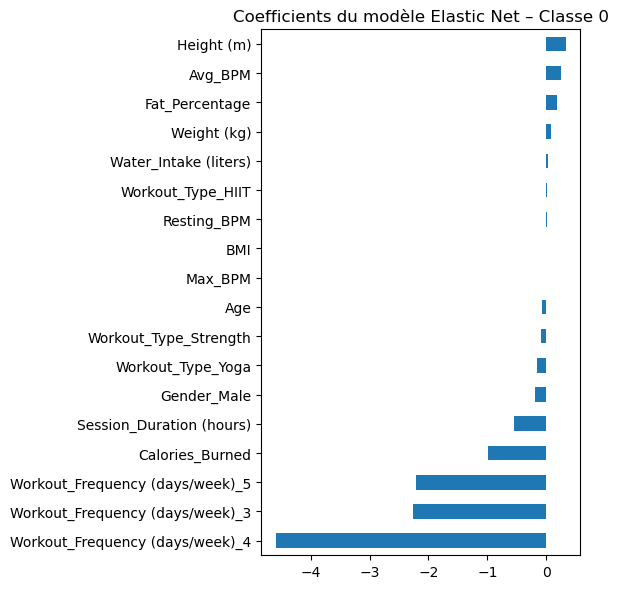

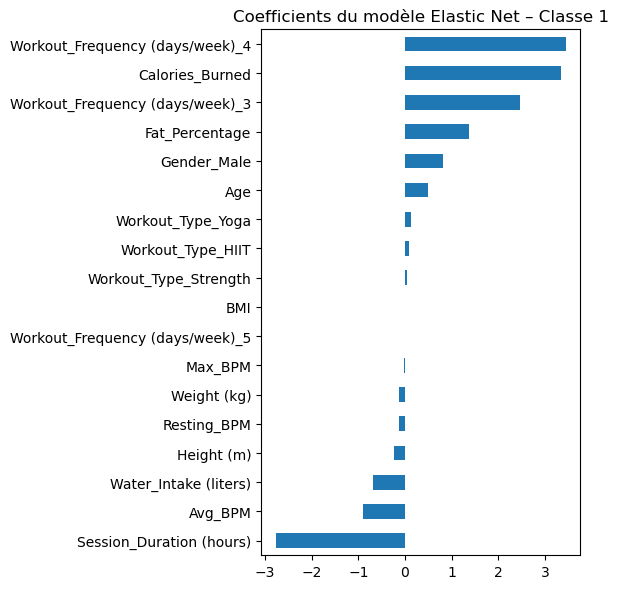

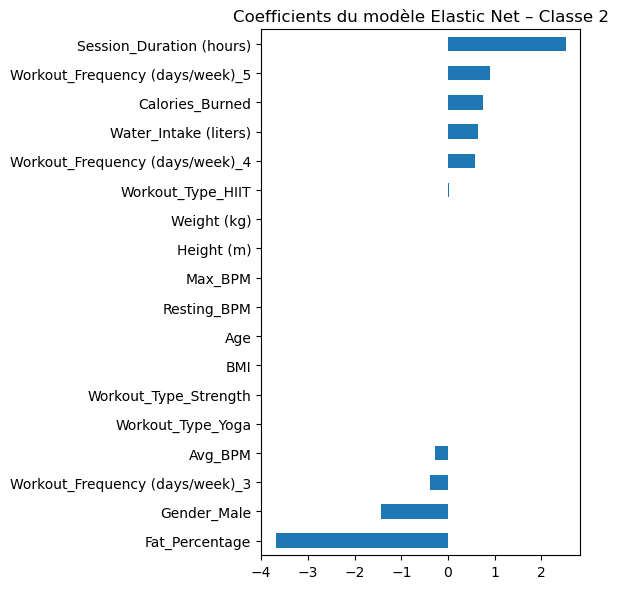

In [132]:
# Affichage des coefficients Elastic Net pour chaque classe
for classe in range(3):
    coef = pd.Series(logitElastic.coef_[classe], index=X.columns)
    imp_coef = coef.sort_values()

    plt.figure(figsize=(6, 6))
    imp_coef.plot(kind="barh")
    plt.title(f"Coefficients du modèle Elastic Net – Classe {classe}")
    plt.tight_layout()
    plt.show()

Les débutants sont associés à une faible fréquence d’entraînement (Workout_Frequency_3, _4, _5) et une durée de séance plus courte. Une faible dépense énergétique (Calories_Burned) renforce cette appartenance, tandis que des variables comme la taille ou le taux de masse grasse ont un effet modérément positif.

Le profil intermédiaire est marqué par une fréquence d’entraînement modérée (Workout_Frequency_3, _4) et une grande dépense calorique. Le sexe masculin, l’âge et le taux de masse grasse favorisent aussi cette classe. En revanche, une longue durée de séance ou une bonne hydratation semblent l’exclure.

Les experts sont définis par une longue durée d’entraînement, une hydratation élevée, une faible masse grasse et une fréquence d’entraînement élevée (Workout_Frequency_4, _5). Le modèle retient peu de variables pour cette classe, indiquant une sélection stricte liée à la régularité et à la condition physique.

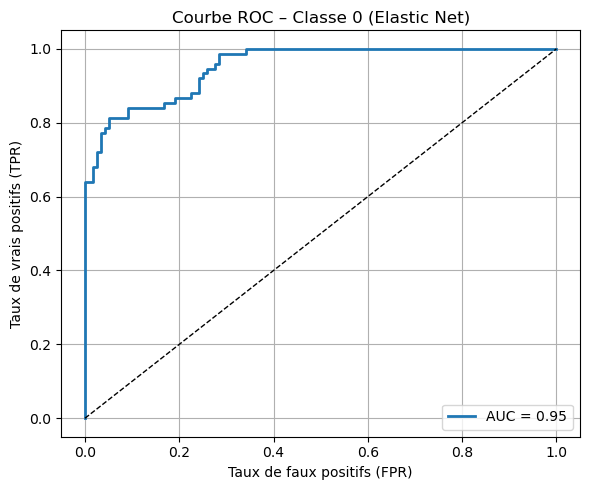

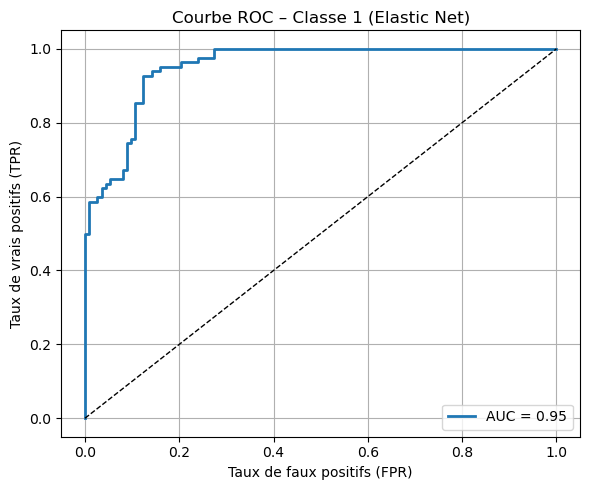

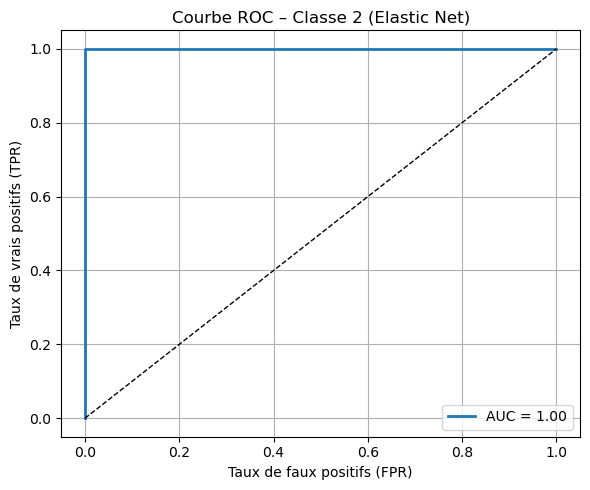

In [137]:
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, lw=2, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlabel("Taux de faux positifs (FPR)")
    plt.ylabel("Taux de vrais positifs (TPR)")
    plt.title(f"Courbe ROC – Classe {i} (Elastic Net)")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Comparaison:

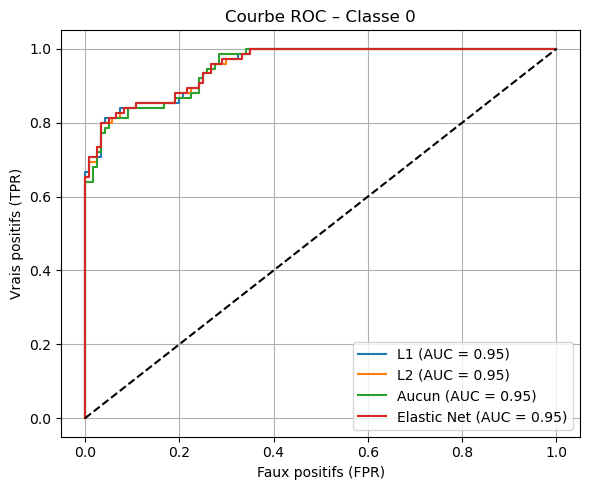

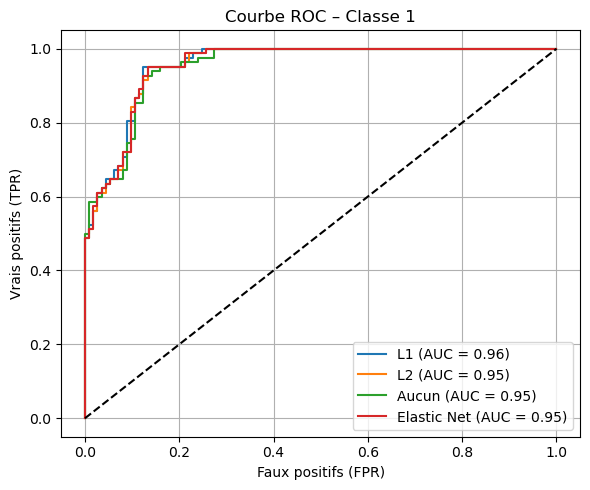

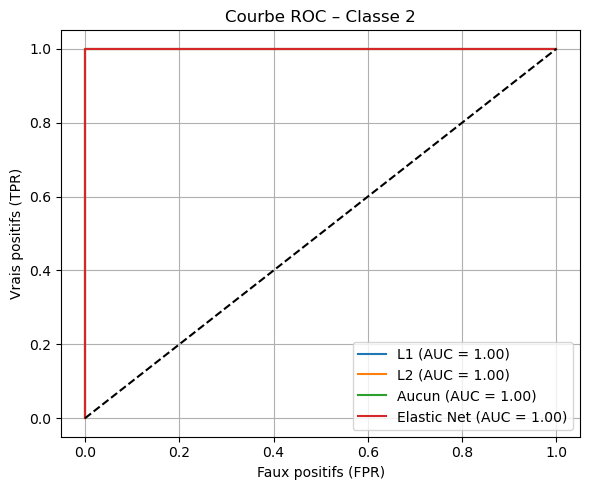

In [140]:
# Binarisation de la variable cible
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Prédictions des probabilités pour chaque modèle
y_score_L1   = logitOpt_L1.predict_proba(X_test_scaled)
y_score_L2   = logitOpt_L2.predict_proba(X_test_scaled)
y_score_none = logitOpt.predict_proba(X_test_scaled)
y_score_EN   = logitOpt_EN.predict_proba(X_test_scaled)

# Tracer les courbes ROC pour chaque classe
for i in range(3):
    fpr_l1, tpr_l1, _ = roc_curve(y_test_bin[:, i], y_score_L1[:, i])
    fpr_l2, tpr_l2, _ = roc_curve(y_test_bin[:, i], y_score_L2[:, i])
    fpr_np, tpr_np, _ = roc_curve(y_test_bin[:, i], y_score_none[:, i])
    fpr_en, tpr_en, _ = roc_curve(y_test_bin[:, i], y_score_EN[:, i])

    auc_l1 = auc(fpr_l1, tpr_l1)
    auc_l2 = auc(fpr_l2, tpr_l2)
    auc_np = auc(fpr_np, tpr_np)
    auc_en = auc(fpr_en, tpr_en)

    # Affichage de la figure
    plt.figure(figsize=(6, 5))
    plt.plot(fpr_l1, tpr_l1, label=f"L1 (AUC = {auc_l1:.2f})")
    plt.plot(fpr_l2, tpr_l2, label=f"L2 (AUC = {auc_l2:.2f})")
    plt.plot(fpr_np, tpr_np, label=f"Aucun (AUC = {auc_np:.2f})")
    plt.plot(fpr_en, tpr_en, label=f"Elastic Net (AUC = {auc_en:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')

    plt.xlabel("Faux positifs (FPR)")
    plt.ylabel("Vrais positifs (TPR)")
    plt.title(f"Courbe ROC – Classe {i}")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

La régression logistique avec une régression Lasso est un tout petit peu meilleure. On peut voir que la classe 2 (Expert) est parfaitement retrouvée et les autres classes sont très bien retrouvés. Nous verrons plus tard que ceci est valable pour toutes les autres méthodes. 

## B. SVC

Nous avons retenu uniquement les noyaux linéaire et gaussien (RBF), car ils couvrent les cas les plus fréquents : respectivement pour des séparations simples et des frontières complexes. Les noyaux polynomiaux ou sigmoïdes sont plus difficiles à régler et n’apportent généralement pas d’amélioration significative face au noyau RBF.

Avec noyau gaussien:

In [145]:
from sklearn.svm import SVC

In [147]:
# Définir la grille d’hyperparamètre (ici C uniquement)
param_grid = {
    'C': [0.1, 0.5, 0.8 ,1, 2, 5, 8],
    'gamma': [0.005,0.01, 0.1, 0.5, 1],
    'kernel': ['rbf']
}

# Initialiser le modèle SVC
svm = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid=param_grid, cv=5, n_jobs=-1)
# Entraînement sur l’échantillon d’apprentissage
svmOpt = svm.fit(X_train_scaled, y_train)

# Affichage du meilleur paramètre et score validation croisée
print("Meilleur score :",1 - svmOpt.best_score_)
print("Meilleurs hyperparamètres :", svmOpt.best_params_)

Meilleur score : 0.11567411083540124
Meilleurs hyperparamètres : {'C': 5, 'gamma': 0.01, 'kernel': 'rbf'}


In [149]:
# Évaluation sur l’échantillon test
print("Précision test :", svmOpt.score(X_test_scaled, y_test))
print("Erreur test :", 1 - svmOpt.score(X_test_scaled, y_test))

Précision test : 0.882051282051282
Erreur test : 0.11794871794871797


In [151]:
# Prédictions sur test
y_pred = svmOpt.predict(X_test_scaled)

# Matrice de confusion
table = pd.crosstab(y_pred, y_test, rownames=['Prédit'], colnames=['Réel'])
print("\nMatrice de confusion :")
print(table)


Matrice de confusion :
Réel     0   1   2
Prédit            
0       61   9   0
1       14  73   0
2        0   0  38


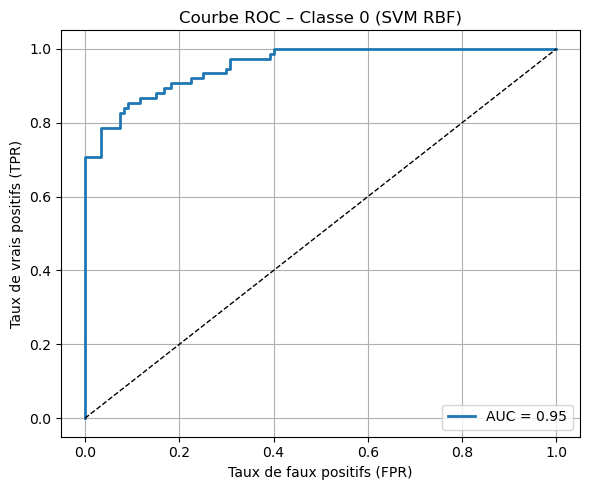

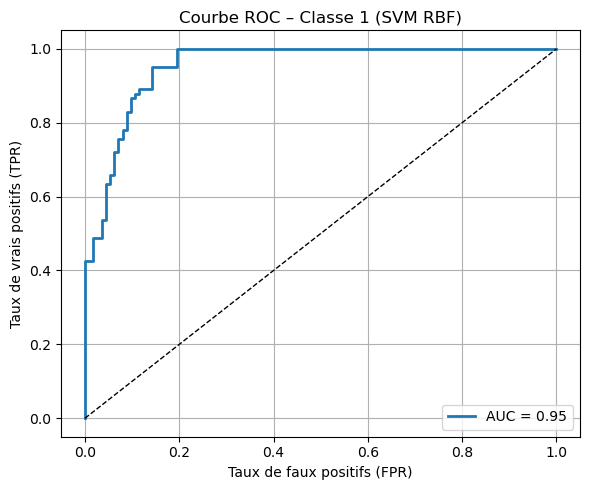

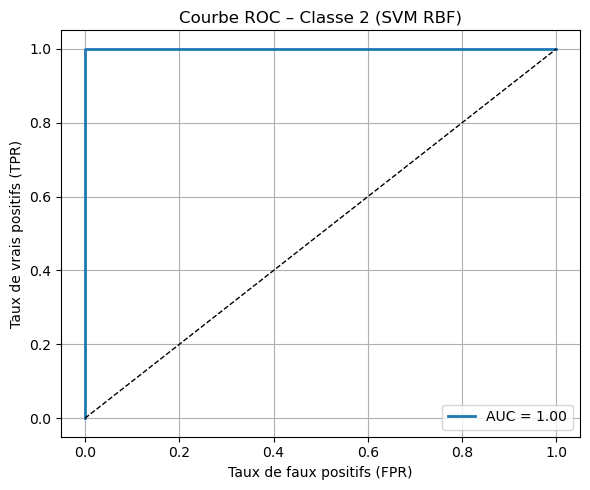

In [153]:
# Binariser y_test
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
# Obtenir les probabilités prédites par le SVM
y_score_svm = svmOpt.predict_proba(X_test_scaled)

# Courbe ROC par classe
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_svm[:, i])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, lw=2, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--', lw=1)

    plt.xlabel("Taux de faux positifs (FPR)")
    plt.ylabel("Taux de vrais positifs (TPR)")
    plt.title(f"Courbe ROC – Classe {i} (SVM RBF)")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Avec noyau linéaire:

In [156]:
# Grille d’hyperparamètres : uniquement C ici
param_grid_linear = {
    'C': [0.1,0.3 ,0.5,0.8, 1, 2, 5],
    'kernel': ['linear']
}

# GridSearchCV avec noyau linéaire
svm_linear = GridSearchCV(
    SVC(probability=True),
    param_grid=param_grid_linear,
    cv=5,
    n_jobs=-1
)

# Entraînement
svmOpt_linear = svm_linear.fit(X_train_scaled, y_train)

# Résultats validation croisée + test
print("Meilleur score CV (erreur) :", 1 - svmOpt_linear.best_score_)
print("Meilleur paramètre :", svmOpt_linear.best_params_)


Meilleur score CV (erreur) : 0.12210090984284538
Meilleur paramètre : {'C': 0.5, 'kernel': 'linear'}


In [158]:
# Évaluation sur test
print("Précision test :", svmOpt_linear.score(X_test_scaled, y_test))
print("Erreur test :", 1 - svmOpt_linear.score(X_test_scaled, y_test))

Précision test : 0.882051282051282
Erreur test : 0.11794871794871797


In [160]:
# Matrice de confusion
y_pred_linear = svmOpt_linear.predict(X_test_scaled)
table = pd.crosstab(y_pred_linear, y_test, rownames=['Prédit'], colnames=['Réel'])
print("\nMatrice de confusion (SVM linéaire) :")
print(table)


Matrice de confusion (SVM linéaire) :
Réel     0   1   2
Prédit            
0       61   9   0
1       14  73   0
2        0   0  38


In [162]:
# Extraire le modèle entraîné avec les meilleurs hyperparamètres
svm_final_linear = svmOpt_linear.best_estimator_

# Coefficients du modèle 
coefs = svm_final_linear.coef_

In [164]:
feature_names = X.columns  

# Affichage par classe
for i, coef_vect in enumerate(coefs):
    print(f"\nClasse {i} (vs autres) :")
    sorted_coef = pd.Series(coef_vect, index=feature_names).sort_values(ascending=False)
    print(sorted_coef.head(5))  
    print(sorted_coef.tail(5))  


Classe 0 (vs autres) :
Height (m)        0.295385
Avg_BPM           0.211156
Fat_Percentage    0.055009
Weight (kg)       0.054478
BMI               0.051254
dtype: float64
Gender_Male                       -0.328108
Session_Duration (hours)          -0.592429
Calories_Burned                   -0.687007
Workout_Frequency (days/week)_3   -1.337095
Workout_Frequency (days/week)_4   -2.062424
dtype: float64

Classe 1 (vs autres) :
Fat_Percentage                     0.398211
Gender_Male                        0.166908
Workout_Frequency (days/week)_3    0.039322
Avg_BPM                            0.026920
Workout_Type_Yoga                  0.020591
dtype: float64
Water_Intake (liters)             -0.048101
Calories_Burned                   -0.050552
Session_Duration (hours)          -0.178576
Workout_Frequency (days/week)_5   -0.440109
Workout_Frequency (days/week)_4   -0.710690
dtype: float64

Classe 2 (vs autres) :
Fat_Percentage                     1.425659
Gender_Male                  

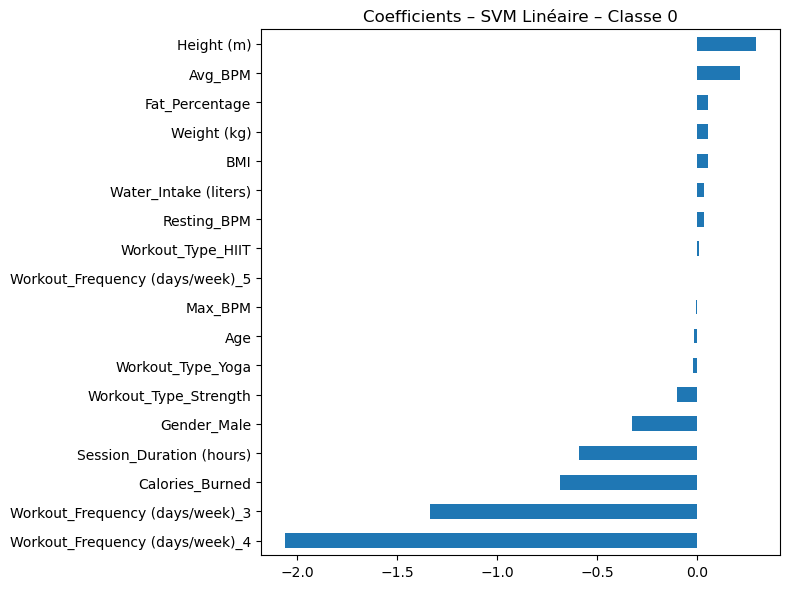

In [166]:
classe = 0 
coef = pd.Series(coefs[classe], index=feature_names)
imp_coef = coef.sort_values()

plt.figure(figsize=(8, 6))
imp_coef.plot(kind="barh")
plt.title(f"Coefficients – SVM Linéaire – Classe {classe}")
plt.tight_layout()
plt.show()

Le SVM linéaire identifie les débutants comme ayant une taille plus élevée, une fréquence cardiaque moyenne plus forte (Avg_BPM), et un taux de masse grasse légèrement supérieur. En revanche, une durée d’entraînement longue, une forte dépense énergétique et une fréquence d’entraînement élevée (Workout_Frequency_3 et _4) réduisent fortement la probabilité d'appartenir à cette classe. Ce profil est cohérent avec des individus physiquement présents mais peu investis ou peu réguliers dans leur pratique.

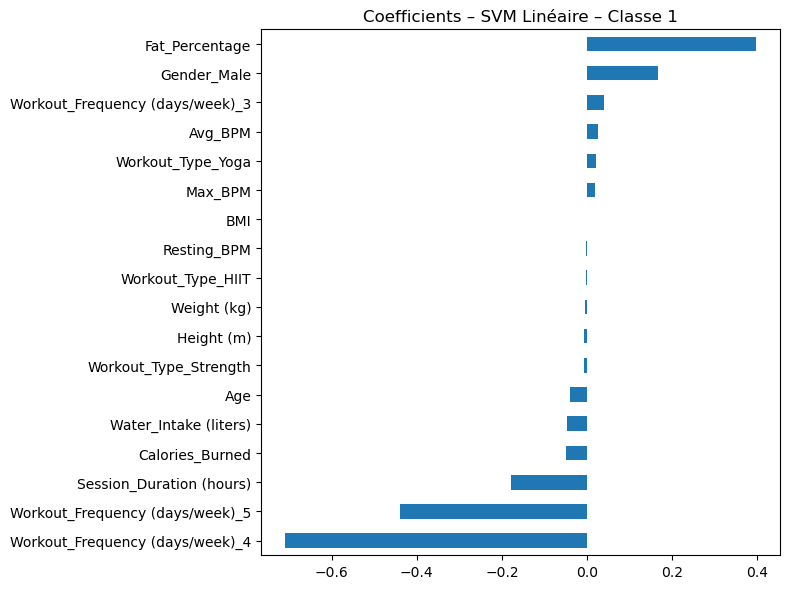

In [169]:
classe = 1 
coef = pd.Series(coefs[classe], index=feature_names)
imp_coef = coef.sort_values()

plt.figure(figsize=(8, 6))
imp_coef.plot(kind="barh")
plt.title(f"Coefficients – SVM Linéaire – Classe {classe}")
plt.tight_layout()
plt.show()

Les intermédiaires se caractérisent par un taux de masse grasse plus élevé et une probabilité accrue chez les hommes. Des entraînements modérés, comme une fréquence de 3 fois/semaine ou la pratique du yoga, sont également positivement associés. En revanche, une forte fréquence (4 ou 5 jours), une longue durée de séance, et une forte dépense calorique tendent à les exclure, ce qui les différencie clairement des experts.

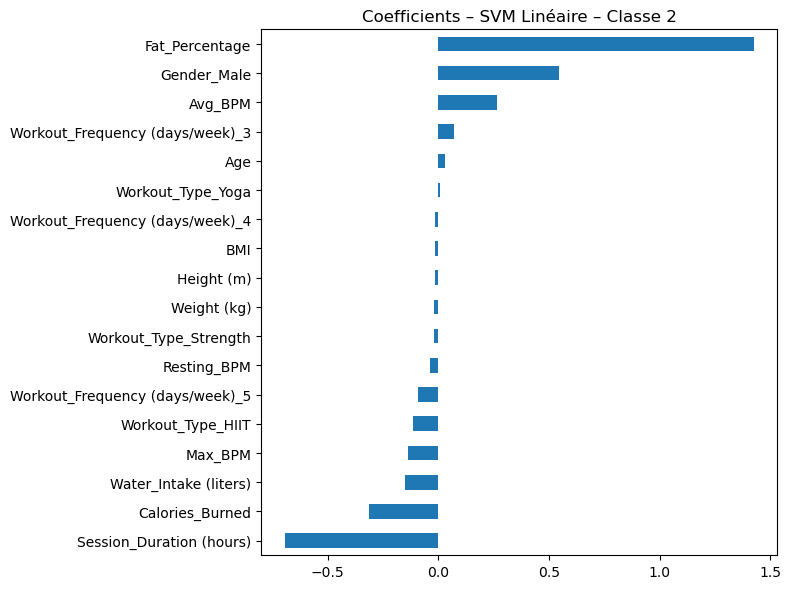

In [172]:
classe = 2
coef = pd.Series(coefs[classe], index=feature_names)
imp_coef = coef.sort_values()

plt.figure(figsize=(8, 6))
imp_coef.plot(kind="barh")
plt.title(f"Coefficients – SVM Linéaire – Classe {classe}")
plt.tight_layout()
plt.show()

Le SVM linéaire identifie les experts par un taux de masse grasse étonnamment élevé, un sexe masculin et une fréquence cardiaque moyenne plus élevée, ainsi qu’une légère influence de l’âge. En revanche, une longue durée de séance, une forte dépense énergétique et une meilleure hydratation réduisent leur probabilité d’être classés comme experts, ce qui contredit les profils obtenus avec d'autres modèles. Cela suggère que le SVM linéaire pourrait avoir du mal à capter correctement les non-linéarités propres à ce groupe.

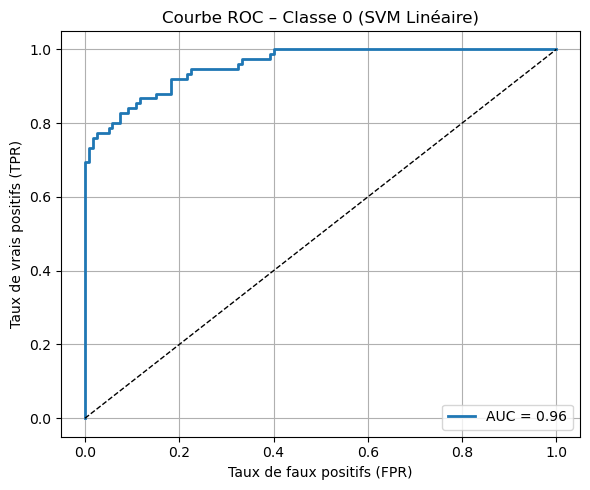

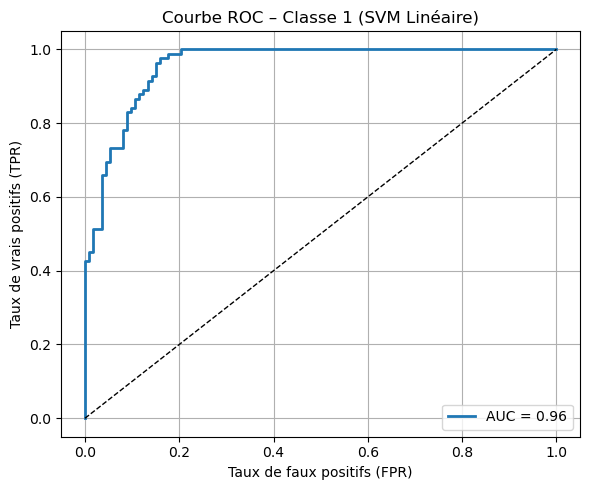

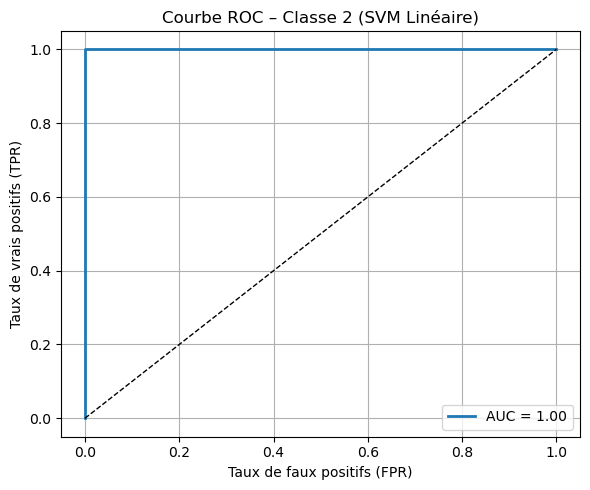

In [175]:
# Obtenir les probabilités prédites par le SVM linéaire
y_score_linear = svmOpt_linear.predict_proba(X_test_scaled)

# Tracer une courbe ROC pour chaque classe
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_linear[:, i])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, lw=2, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--', lw=1)

    plt.xlabel("Taux de faux positifs (FPR)")
    plt.ylabel("Taux de vrais positifs (TPR)")
    plt.title(f"Courbe ROC – Classe {i} (SVM Linéaire)")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

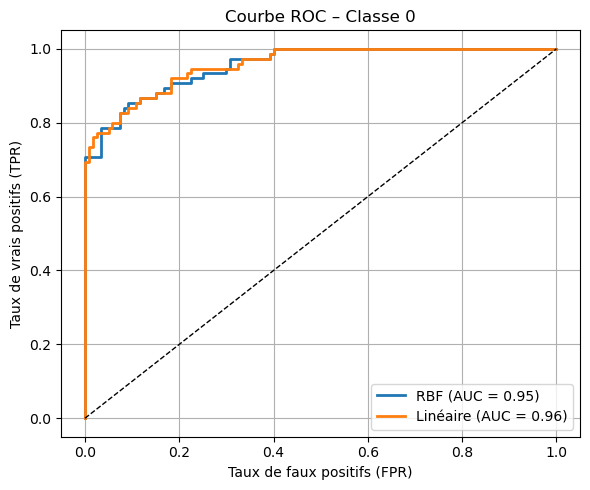

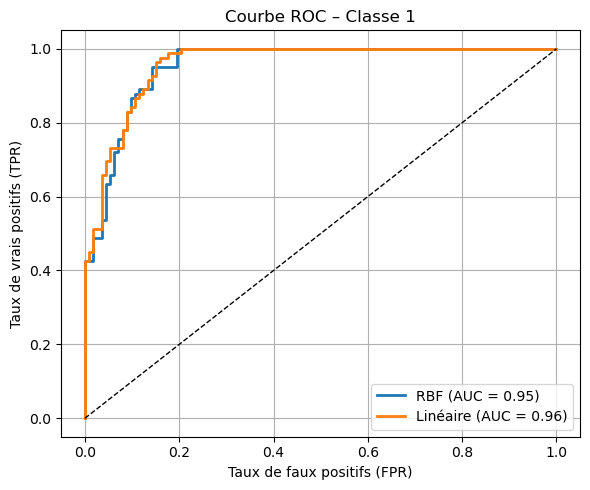

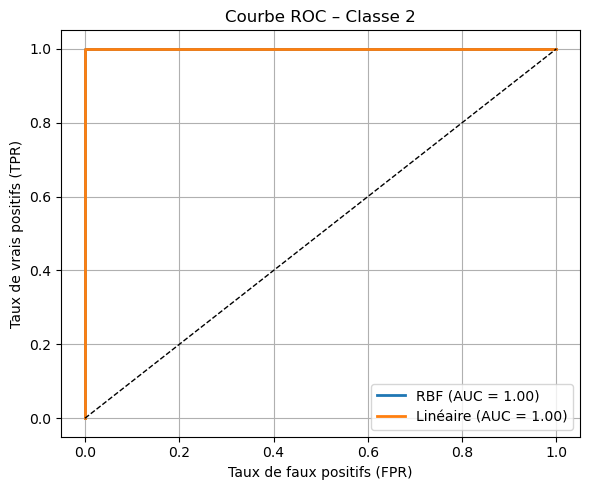

In [177]:
# Probabilités des deux modèles
y_score_rbf = svmOpt.predict_proba(X_test_scaled)           # SVM RBF
y_score_linear = svmOpt_linear.predict_proba(X_test_scaled) # SVM Linéaire

# Tracer une courbe ROC par classe, avec les 2 noyaux
for i in range(y_test_bin.shape[1]):
    # RBF
    fpr_rbf, tpr_rbf, _ = roc_curve(y_test_bin[:, i], y_score_rbf[:, i])
    auc_rbf = auc(fpr_rbf, tpr_rbf)

    # Linéaire
    fpr_lin, tpr_lin, _ = roc_curve(y_test_bin[:, i], y_score_linear[:, i])
    auc_lin = auc(fpr_lin, tpr_lin)

    # Tracé
    plt.figure(figsize=(6, 5))
    plt.plot(fpr_rbf, tpr_rbf, lw=2, label=f"RBF (AUC = {auc_rbf:.2f})")
    plt.plot(fpr_lin, tpr_lin, lw=2, label=f"Linéaire (AUC = {auc_lin:.2f})")
    plt.plot([0, 1], [0, 1], 'k--', lw=1)

    plt.xlabel("Taux de faux positifs (FPR)")
    plt.ylabel("Taux de vrais positifs (TPR)")
    plt.title(f"Courbe ROC – Classe {i}")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Le noyau linéaire est un peu plus performant que le noyau gaussien, cependant on a pu voir certaines variables importantes pour la classification avec ce modèle sont contradictoires avec la classe obtenue. Sachant que le noyau gaussien est quand même pérformant, nous pensons qu'il serait plus judicieux d'utiliser ce modèle, malgré son manque d'interpretabilité.

## C. Arbre optimal

In [180]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [182]:
# Définir la grille d'hyperparamètres pour la profondeur
param_grid = [{"max_depth": list(range(2, 10))}]

# GridSearchCV avec arbre de décision
tree = GridSearchCV(
    DecisionTreeClassifier(random_state=0),
    param_grid,
    cv=5,
    n_jobs=-1
)

# Entraînement sur l’échantillon d’apprentissage
treeOpt = tree.fit(X_train_scaled, y_train)

# Affichage du meilleur paramètre et score CV
print("Meilleur score CV (erreur) :", 1 - treeOpt.best_score_)
print("Meilleur paramètre :", treeOpt.best_params_)


Meilleur score CV (erreur) : 0.10411083540115806
Meilleur paramètre : {'max_depth': 4}


In [184]:
# Évaluation sur l’échantillon test
print("Précision test :", treeOpt.score(X_test_scaled, y_test))
print("Erreur test :", 1 - treeOpt.score(X_test_scaled, y_test))


Précision test : 0.9230769230769231
Erreur test : 0.07692307692307687


In [186]:
# Prédictions et matrice de confusion
y_chap = treeOpt.predict(X_test_scaled)
table = pd.crosstab(y_chap, y_test, rownames=['Prédit'], colnames=['Réel'])
print("\nMatrice de confusion :")
print(table)


Matrice de confusion :
Réel     0   1   2
Prédit            
0       60   0   0
1       15  82   0
2        0   0  38


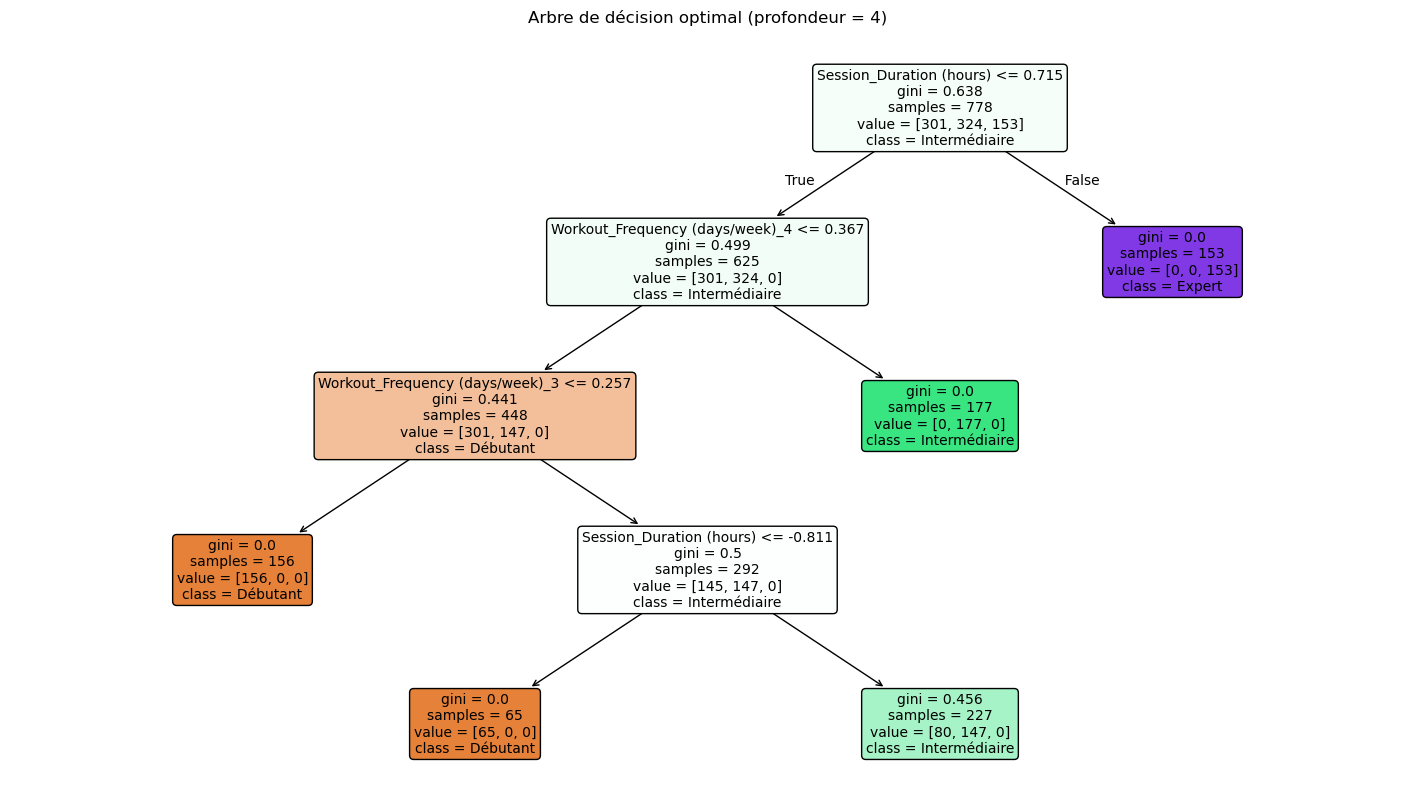

In [188]:
# Visualisation de l’arbre optimal
# On le réentraîne avec le meilleur paramètre trouvé
treeG = DecisionTreeClassifier(max_depth=treeOpt.best_params_['max_depth'], random_state=0)
treeG.fit(X_train_scaled, y_train)

# Noms des variables
feature_names = X.columns

# Tracé
plt.figure(figsize=(18, 10))
plot_tree(treeG, feature_names=feature_names, class_names=['Débutant', 'Intermédiaire', 'Expert'],
          filled=True, rounded=True, fontsize=10)
plt.title("Arbre de décision optimal (profondeur = {})".format(treeOpt.best_params_['max_depth']))
plt.show()

L’arbre de décision identifie deux variables déterminantes : la durée des séances et les fréquences d’entraînement. Il distingue parfaitement les experts (séances longues) et les débutants (fréquence et durée faibles), tandis que les intermédiaires apparaissent dans des cas intermédiaires. Le modèle fournit ainsi des règles simples et interprétables pour prédire le niveau d’expérience.

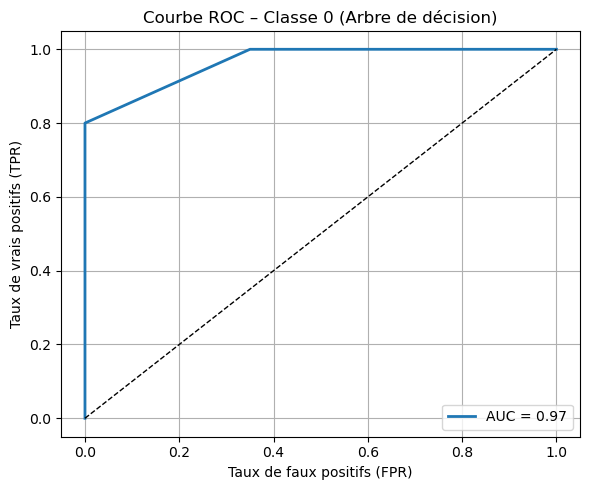

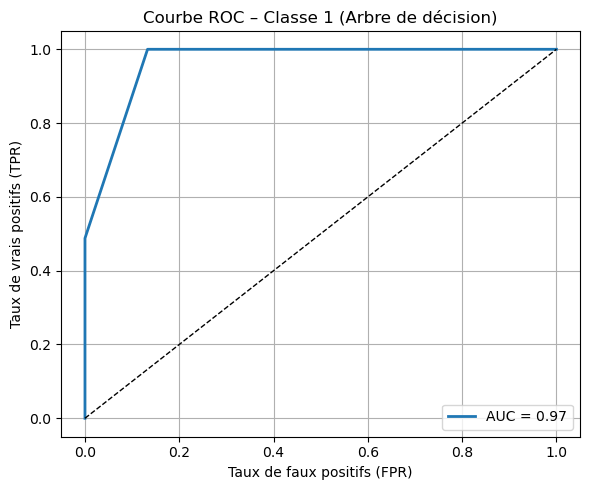

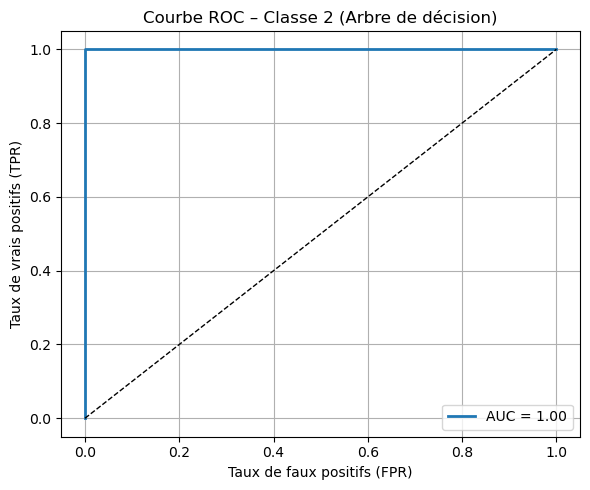

In [191]:
# Binariser y_test 
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Probabilités prédites par l’arbre optimal
y_score_tree = treeOpt.predict_proba(X_test_scaled)

# Tracer les courbes ROC pour chaque classe
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_tree[:, i])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, lw=2, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlabel("Taux de faux positifs (FPR)")
    plt.ylabel("Taux de vrais positifs (TPR)")
    plt.title(f"Courbe ROC – Classe {i} (Arbre de décision)")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## D. Random Forest 

In [193]:
from sklearn.ensemble import RandomForestClassifier

In [195]:
# Forêt aléatoire initiale avec OOB 
forest = RandomForestClassifier(
    n_estimators=500,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    max_leaf_nodes=None,
    bootstrap=True,
    oob_score=True,
    random_state=0
)

rfFit = forest.fit(X_train_scaled, y_train)

print("Erreur OOB (out-of-bag) :", 1 - rfFit.oob_score_)
print("Précision test :", rfFit.score(X_test_scaled, y_test))
print("Erreur test :", 1 - rfFit.score(X_test_scaled, y_test))

Erreur OOB (out-of-bag) : 0.12210796915167099
Précision test : 0.882051282051282
Erreur test : 0.11794871794871797


-> Erreur OOB correspond à l'erreur de prédiction sur les données non utilisées lors de la construction des arbres.

In [198]:
# Optimisation de max_features
param_grid = [{"max_features": list(range(2, 10))}]
rf = GridSearchCV(
    RandomForestClassifier(n_estimators=100, random_state=0),
    param_grid,
    cv=5,
    n_jobs=-1
)

rfOpt = rf.fit(X_train_scaled, y_train)

print("Meilleur paramètre :", rfOpt.best_params_)
print("Erreur CV :", 1 - rfOpt.best_score_)
print("Erreur test (modèle optimisé) :", 1 - rfOpt.score(X_test_scaled, y_test))


Meilleur paramètre : {'max_features': 7}
Erreur CV : 0.12209263854425134
Erreur test (modèle optimisé) : 0.10769230769230764


In [200]:
# Matrice de confusion
y_chap = rfFit.predict(X_test_scaled)
table = pd.crosstab(y_chap, y_test, rownames=["Prédit"], colnames=["Réel"])
print("\n Matrice de confusion :")
print(table)


 Matrice de confusion :
Réel     0   1   2
Prédit            
0       63  11   0
1       12  71   0
2        0   0  38


In [202]:
# Importance des variables avec la meilleure forêt
rf_final = RandomForestClassifier(
    n_estimators=100,
    max_features=rfOpt.best_params_['max_features'],
    random_state=0
)
rfFit_final = rf_final.fit(X_train_scaled, y_train)

importances = rfFit_final.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

print("\n Importances décroissantes des variables :")
for f in range(X_train_scaled.shape[1]):
    print(f"{feature_names[indices[f]]:<30s} {importances[indices[f]]:.4f}")



 Importances décroissantes des variables :
Session_Duration (hours)       0.2821
Workout_Frequency (days/week)_4 0.1808
Fat_Percentage                 0.1640
Calories_Burned                0.0887
Workout_Frequency (days/week)_3 0.0822
Weight (kg)                    0.0253
Water_Intake (liters)          0.0236
BMI                            0.0226
Max_BPM                        0.0221
Workout_Frequency (days/week)_5 0.0217
Height (m)                     0.0216
Avg_BPM                        0.0204
Age                            0.0189
Resting_BPM                    0.0169
Workout_Type_HIIT              0.0030
Workout_Type_Strength          0.0025
Workout_Type_Yoga              0.0023
Gender_Male                    0.0015


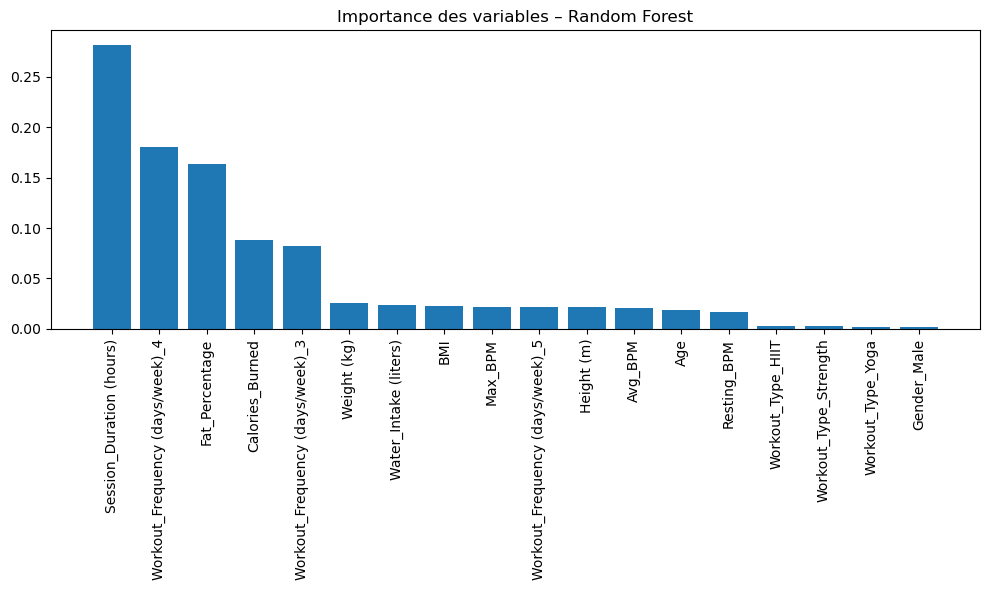

In [204]:
# Graphe des importances
plt.figure(figsize=(10, 6))
plt.title("Importance des variables – Random Forest")
plt.bar(range(X_train_scaled.shape[1]), importances[indices])
plt.xticks(range(X_train_scaled.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

Le modèle Random Forest met en avant la durée des séances, la fréquence d'entraînement (en particulier 4 fois/semaine), ainsi que le taux de masse grasse comme principaux déterminants du niveau d'expérience. À l’inverse, le type d'entraînement suivi et le sexe ont peu d’influence sur la classification selon la forêt aléatoire.

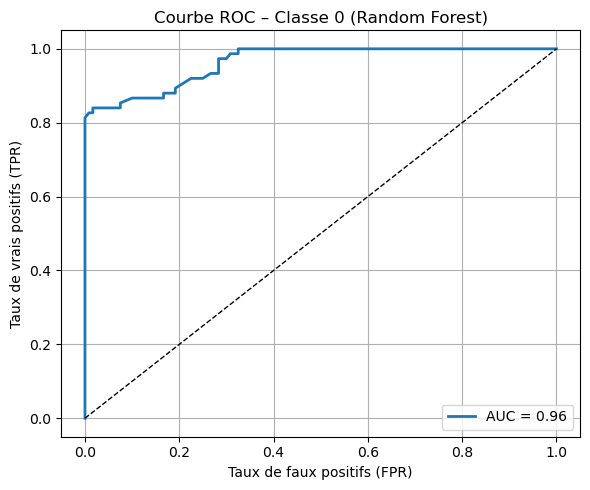

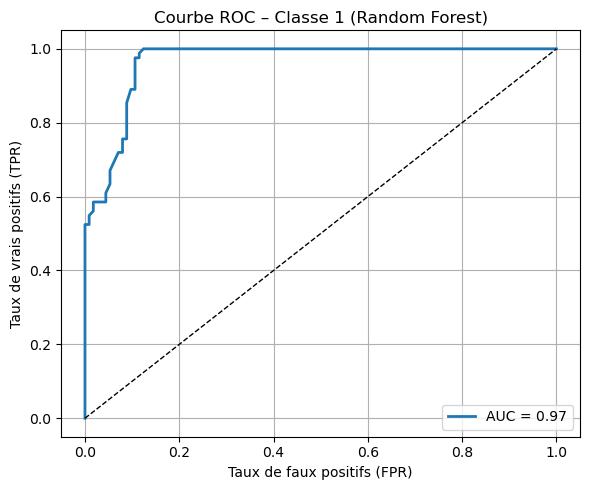

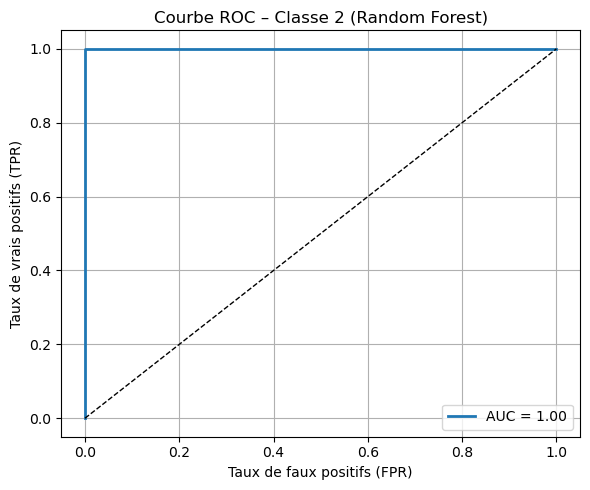

In [207]:
# Binariser la cible (si ce n’est pas déjà fait)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Prédire les probabilités sur le test
y_score_rf = rfFit_final.predict_proba(X_test_scaled)

# Tracer une courbe ROC par classe
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_rf[:, i])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, lw=2, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlabel("Taux de faux positifs (FPR)")
    plt.ylabel("Taux de vrais positifs (TPR)")
    plt.title(f"Courbe ROC – Classe {i} (Random Forest)")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## E. Boosting

In [209]:
from sklearn.ensemble import GradientBoostingClassifier
import time

In [211]:
# Début chronométrage
tps0 = time.perf_counter()

# Grille de paramètres (nombre d’estimateurs à tester)
param_grid = [{"n_estimators": [200, 250, 300, 350, 400]}]

# GridSearchCV avec validation croisée
gbm = GridSearchCV(
    GradientBoostingClassifier(random_state=0),
    param_grid,
    cv=5,  # 5-fold CV
    n_jobs=-1
)

# Entraînement sur données standardisées
gbmOpt = gbm.fit(X_train_scaled, y_train)

# Fin du chronométrage
tps1 = time.perf_counter() - tps0

# Résultats validation croisée
print("Temps boosting       :", round(tps1, 2), "secondes")
print("Meilleur paramètre   :", gbmOpt.best_params_)
print("Erreur validation CV :", round(1 - gbmOpt.best_score_, 4))


Temps boosting       : 34.01 secondes
Meilleur paramètre   : {'n_estimators': 300}
Erreur validation CV : 0.1183


In [213]:
# Évaluation sur échantillon test
print("Précision test       :", gbmOpt.score(X_test_scaled, y_test))
print("Erreur test          :", 1 - gbmOpt.score(X_test_scaled, y_test))

Précision test       : 0.8871794871794871
Erreur test          : 0.11282051282051286


In [215]:
# Matrice de confusion
y_chap = gbmOpt.predict(X_test_scaled)
table = pd.crosstab(y_chap, y_test, rownames=["Prédit"], colnames=["Réel"])
print("\nMatrice de confusion (Gradient Boosting) :")
print(table)


Matrice de confusion (Gradient Boosting) :
Réel     0   1   2
Prédit            
0       63  10   0
1       12  72   0
2        0   0  38


Importances décroissantes (globales) :
Session_Duration (hours)            0.5757
Workout_Frequency (days/week)_4     0.1684
Fat_Percentage                      0.0959
Workout_Frequency (days/week)_3     0.0698
BMI                                 0.0164
Calories_Burned                     0.0156
Weight (kg)                         0.0114
Water_Intake (liters)               0.0108
Height (m)                          0.0092
Age                                 0.0088
Avg_BPM                             0.0074
Max_BPM                             0.0053
Resting_BPM                         0.0040
Workout_Type_Yoga                   0.0004
Workout_Type_Strength               0.0004
Workout_Type_HIIT                   0.0003
Gender_Male                         0.0002
Workout_Frequency (days/week)_5     0.0001


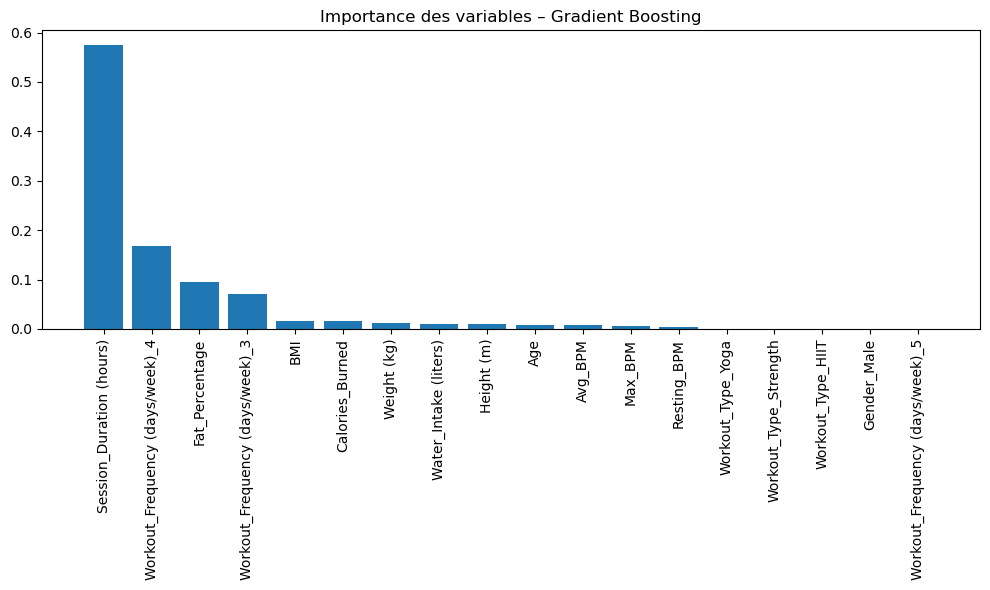

In [217]:
# Récupérer le meilleur modèle
gbm_final = gbmOpt.best_estimator_

# Importances globales
importances = gbm_final.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

# Affichage texte
print("Importances décroissantes (globales) :")
for i in range(len(feature_names)):
    print(f"{feature_names[indices[i]]:<35s} {importances[indices[i]]:.4f}")

# Affichage graphique
plt.figure(figsize=(10, 6))
plt.title("Importance des variables – Gradient Boosting")
plt.bar(range(len(feature_names)), importances[indices])
plt.xticks(range(len(feature_names)), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

Le modèle Gradient Boosting identifie très fortement la durée des séances (Session_Duration) comme la variable la plus déterminante, représentant à elle seule plus de 57% de l’importance totale. Elle est suivie par la fréquence d’entraînement à 4 jours/semaine et le taux de masse grasse. Les autres variables ont une influence marginale, notamment les types d'entraînement et le sexe, qui jouent un rôle quasi nul dans les décisions du modèle. Cela confirme la prédominance des habitudes sportives et des indicateurs corporels dans la prédiction du niveau d’expérience.

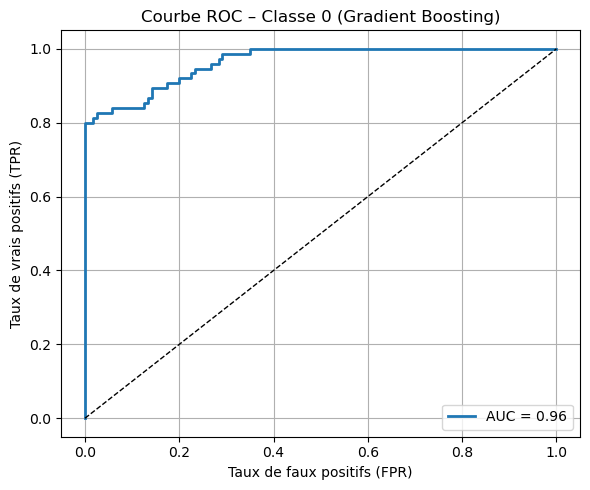

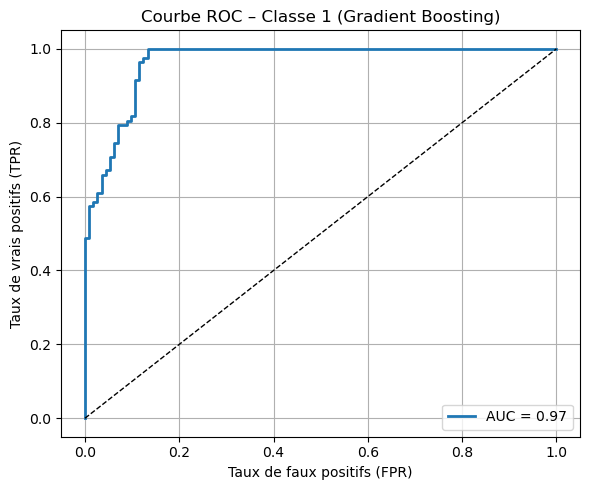

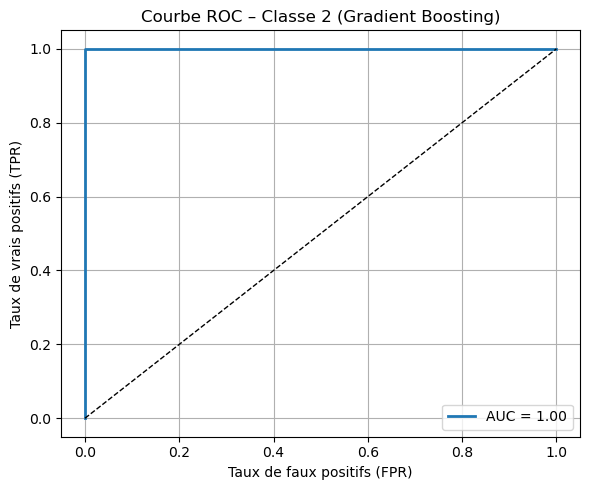

In [220]:
# Binarisation de la variable cible
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Obtenir les probabilités prédites par le modèle Boosting
y_score_gbm = gbmOpt.predict_proba(X_test_scaled)

# Tracer une courbe ROC par classe
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_gbm[:, i])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, lw=2, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--', lw=1)

    plt.xlabel("Taux de faux positifs (FPR)")
    plt.ylabel("Taux de vrais positifs (TPR)")
    plt.title(f"Courbe ROC – Classe {i} (Gradient Boosting)")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


## F. Réseau de neurones 

In [222]:
from sklearn.neural_network import MLPClassifier

In [224]:
# Définir la couche cachée
param_grid = [{
    "hidden_layer_sizes": [(2,), (3,), (4,), (5,), (6,), (7,), (8,), (9,), (10,)]
}]

# GridSearchCV avec validation croisée
nnet = GridSearchCV(
    MLPClassifier(max_iter=500, random_state=0),
    param_grid,
    cv=5,
    n_jobs=-1
)

# Entraînement sur les données standardisées
nnetOpt = nnet.fit(X_train_scaled, y_train)

# Affichage du meilleur score et paramètre
print("Meilleur paramètre :", nnetOpt.best_params_)
print("Erreur validation CV :", 1 - nnetOpt.best_score_)


Meilleur paramètre : {'hidden_layer_sizes': (4,)}
Erreur validation CV : 0.12594706368899922


C:\Users\anter\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [226]:
# Évaluation sur l’échantillon test
print("Précision test :", nnetOpt.score(X_test_scaled, y_test))
print("Erreur test :", 1 - nnetOpt.score(X_test_scaled, y_test))

Précision test : 0.8871794871794871
Erreur test : 0.11282051282051286


In [228]:
# Prédiction et matrice de confusion
y_chap = nnetOpt.predict(X_test_scaled)
table = pd.crosstab(y_chap, y_test, rownames=["Prédit"], colnames=["Réel"])
print("\n Matrice de confusion (Réseau de neurones) :")
print(table)


 Matrice de confusion (Réseau de neurones) :
Réel     0   1   2
Prédit            
0       65  12   0
1       10  70   0
2        0   0  38


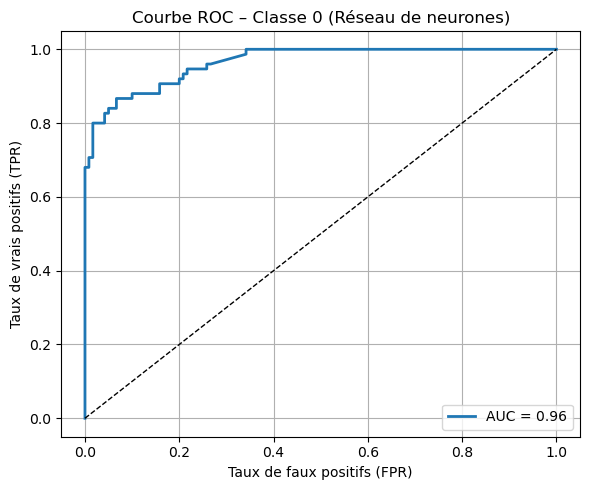

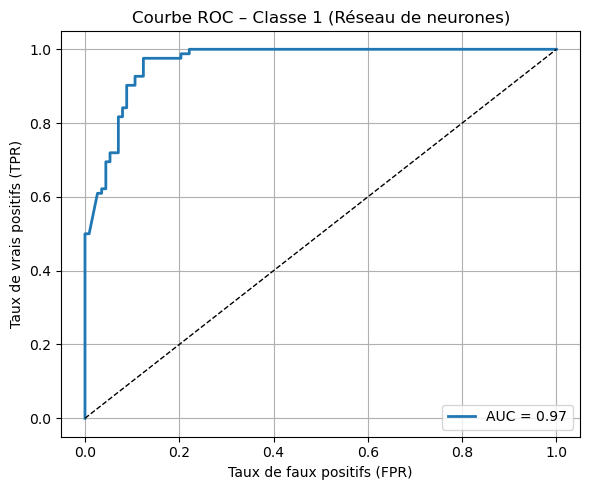

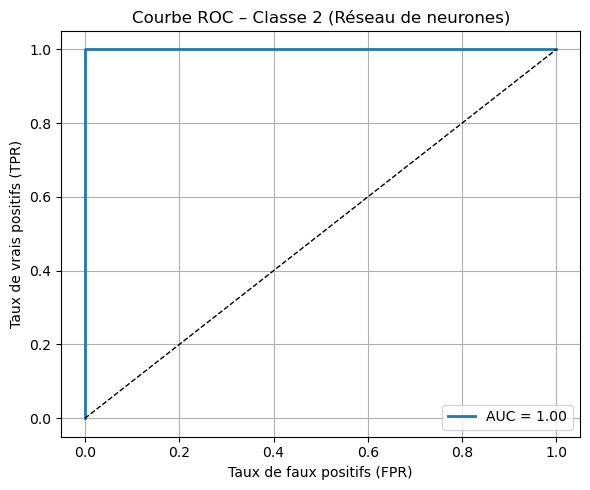

In [230]:
# Binarisation de la cible
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Probabilités prédites par le réseau de neurones
y_score_nnet = nnetOpt.predict_proba(X_test_scaled)

# Courbe ROC pour chaque classe
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_nnet[:, i])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, lw=2, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlabel("Taux de faux positifs (FPR)")
    plt.ylabel("Taux de vrais positifs (TPR)")
    plt.title(f"Courbe ROC – Classe {i} (Réseau de neurones)")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## G. Comparaison de toutes les méthodes

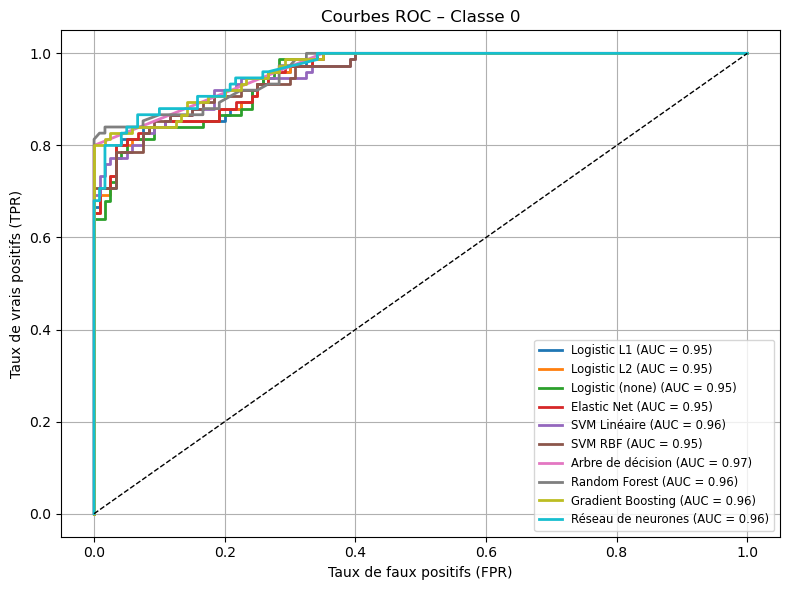

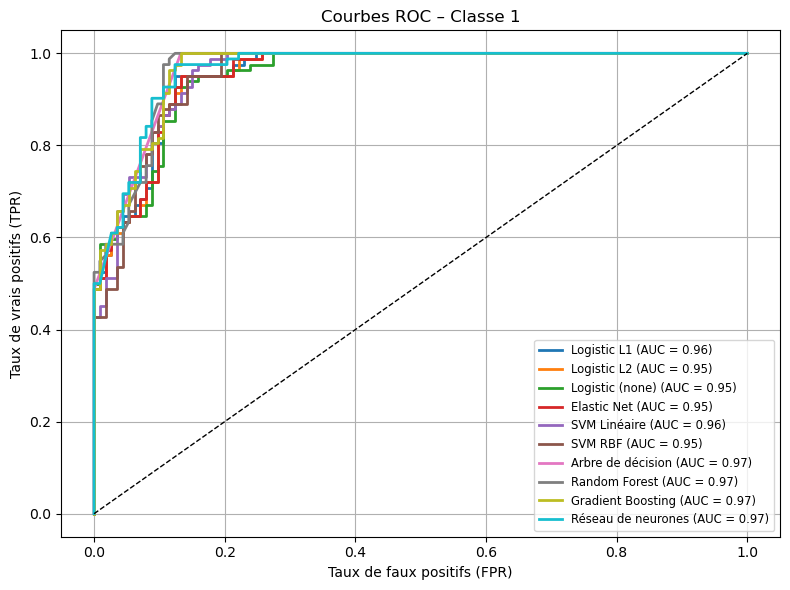

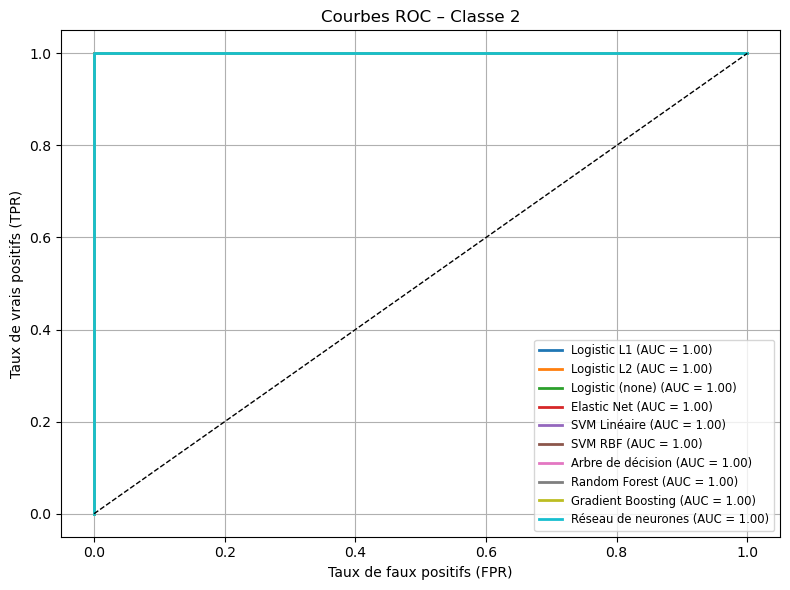

In [232]:
# Ajout des scores Elastic Net
y_score_EN = logitOpt_EN.predict_proba(X_test_scaled)

# Dictionnaire de scores à comparer (avec Elastic Net ajouté)
roc_scores = {
    "Logistic L1": y_score_L1,
    "Logistic L2": y_score_L2,
    "Logistic (none)": y_score_none,
    "Elastic Net": y_score_EN,
    "SVM Linéaire": y_score_linear,
    "SVM RBF": y_score_rbf,
    "Arbre de décision": y_score_tree,
    "Random Forest": y_score_rf,
    "Gradient Boosting": y_score_gbm,
    "Réseau de neurones": y_score_nnet
}

# Affichage des courbes ROC par classe
for i in range(y_test_bin.shape[1]):
    plt.figure(figsize=(8, 6))
    
    for name, scores in roc_scores.items():
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], scores[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.2f})")
    
    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlabel("Taux de faux positifs (FPR)")
    plt.ylabel("Taux de vrais positifs (TPR)")
    plt.title(f"Courbes ROC – Classe {i}")
    plt.legend(loc="lower right", fontsize='small')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Nous pouvons voir que pour la classe expert, toutes les méthodes ont un AUC à 1, ce qui veut dire que toutes les méthodes arrivent à détecter les experts, les sportifs de haut niveau. Pour la classe intermédiaire, on peut voir que les méthodes avec les AUC les plus élevés sont l'arbre de décision, le Random Forest, le Gradient Boosting et le réseau de neurones. Concernant la classe débutant, c'est l'arbre de décision qui a l'AUC le plus élevé.\
De plus, l'Arbre de décision peut être interprété assez facilement. Dans notre cas on peut voir que les variables avec le plus d'influences sont la fréquence et la durée de l'activité sportive.

On remarque que les modèles non linéaires tels que l'arbre de décision, le Random Forest, le Gradient Boosting et le réseau de neurones sont plus performant que les modèles linéaires.

On remarque également que les variables importantes pour la classification de nos modèles sont souvent les mêmes, en effet on retrouve surtout Session_Duration et Workout_Frequency. Ce résultat est cohérent avec ce qu'on a pu voir lors de l'analyse exploratoire des données, notamment lorsqu'on a comparé Session_Duration avec Experience_Level et lorsqu'on a comparé Workout_Frequency avec Experience_Level. On voit aussi que tous les individus appartenant à la classe 3 sont bien classés, ceci est cohérent avec notre analyse descriptive car on a pu voir que la classe 3 se démarque netemment des autres classes. 